# Data Analysis with Python

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib as mpl 

import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mplcyberpunk
%matplotlib inline 

pd.set_option("display.max_columns", 00) 
pd.set_option("display.max_rows",100) 
plt.style.use("cyberpunk")

import warnings 
warnings.filterwarnings("ignore")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 8
mpl.rcParams["axes.titlepad"] = 25
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [3]:
train = pd.read_csv("/storage/emulated/0/Bigmart project/train_bigmart.csv")
test = pd.read_csv("/storage/emulated/0/Bigmart project/test_bigmart.csv") 

In [4]:
train.head() 

Item_Identifier  ...  Item_Outlet_Sales
0           FDA15  ...          3735.1380
1           DRC01  ...           443.4228
2           FDN15  ...          2097.2700
3           FDX07  ...           732.3800
4           NCD19  ...           994.7052

[5 rows x 12 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [7]:
pd.DataFrame({"Train/null":(train.isnull().sum()/train.shape[0])*100,
              "Test/null": (test.isnull().sum()/test.shape[0])*100}) 

Train/null  Test/null
Item_Fat_Content             0.000000   0.000000
Item_Identifier              0.000000   0.000000
Item_MRP                     0.000000   0.000000
Item_Outlet_Sales            0.000000        NaN
Item_Type                    0.000000   0.000000
Item_Visibility              0.000000   0.000000
Item_Weight                 17.165317  17.180074
Outlet_Establishment_Year    0.000000   0.000000
Outlet_Identifier            0.000000   0.000000
Outlet_Location_Type         0.000000   0.000000
Outlet_Size                 28.276428  28.269671
Outlet_Type                  0.000000   0.000000

In [8]:
train.duplicated().sum()

0

In [ ]:
# Target

Skew: 1.1775306028542798
Kurt: 1.6158766814287264


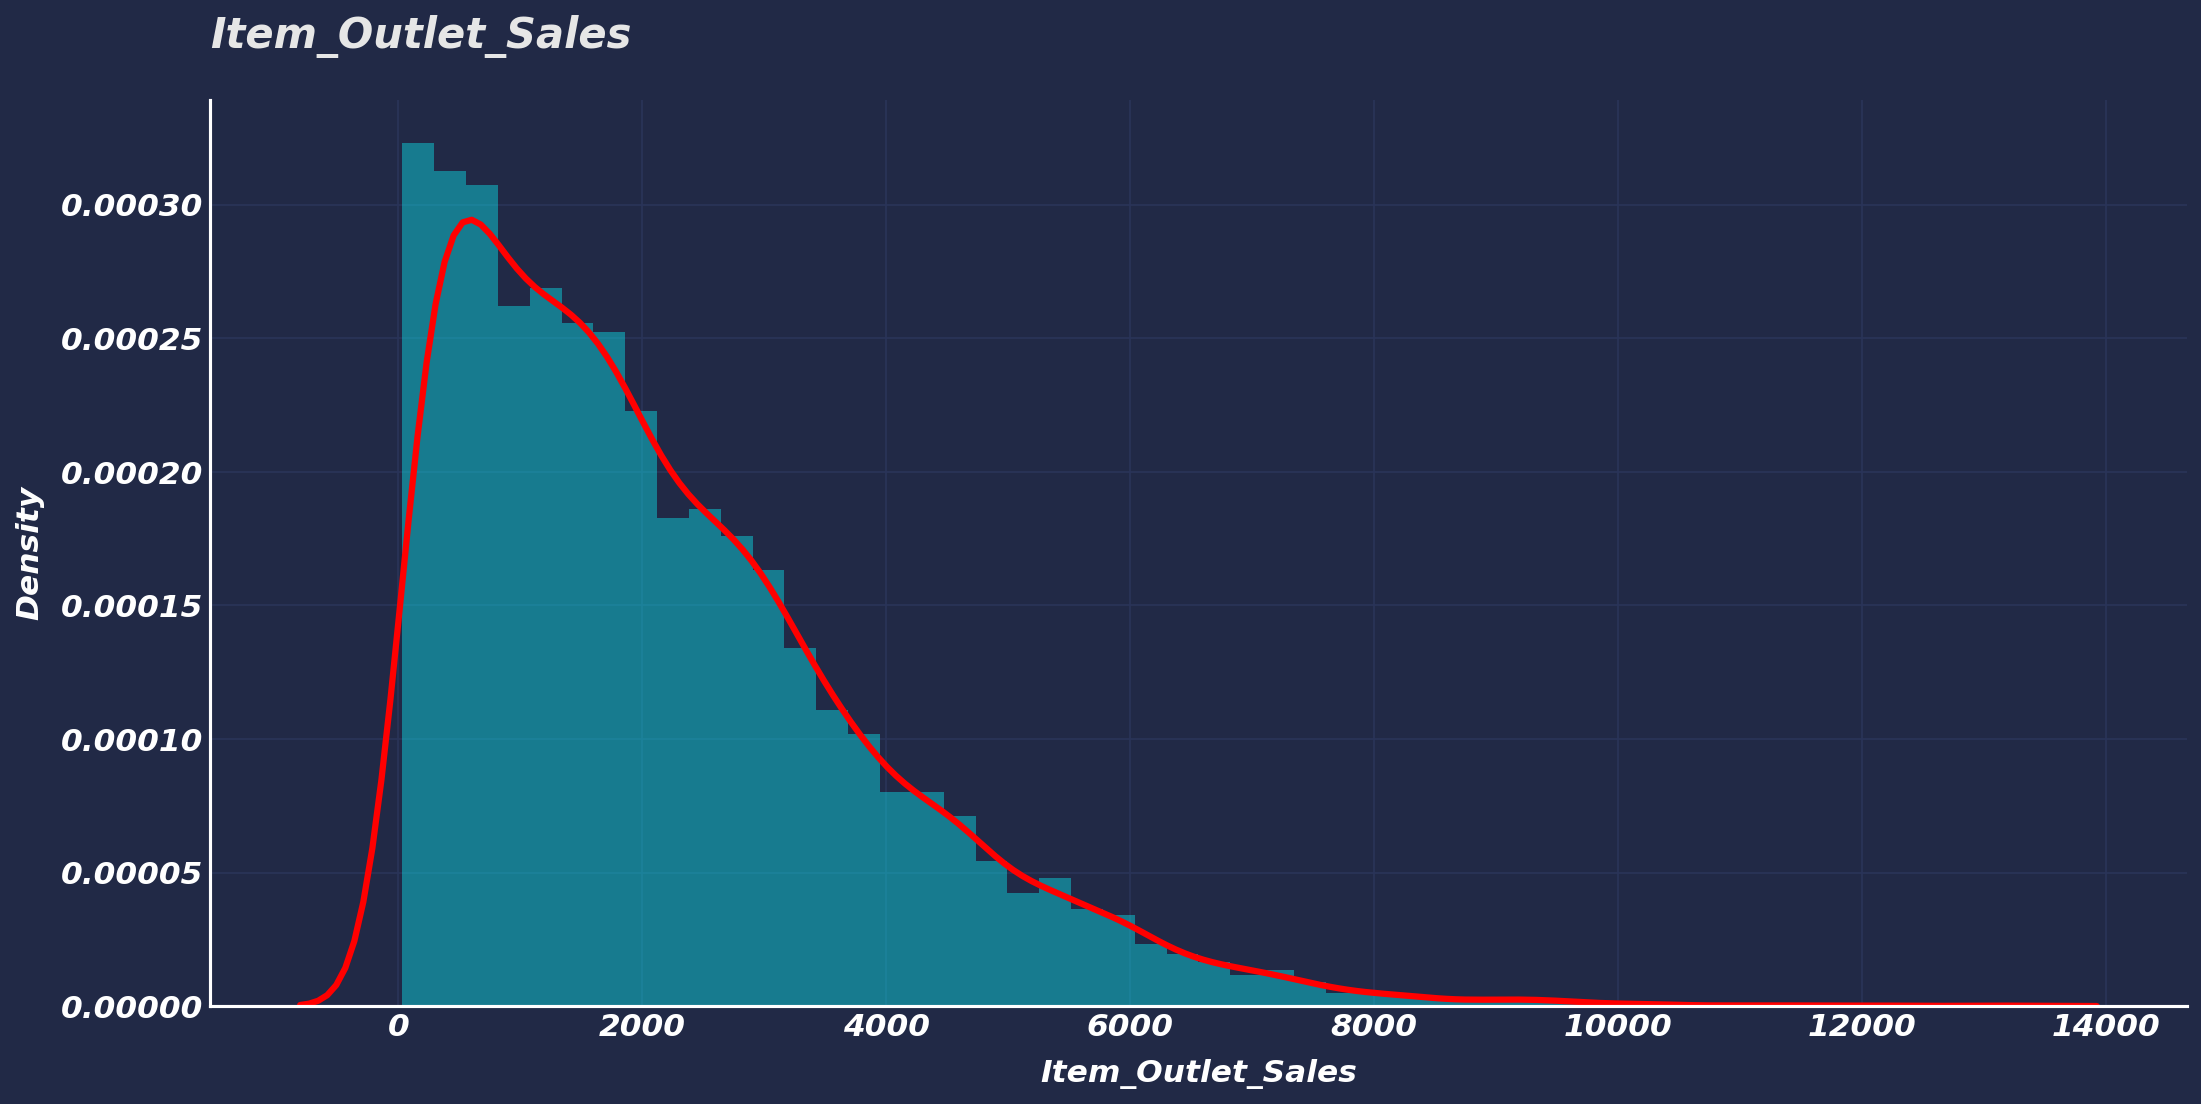

In [5]:
plt.figure(figsize=(17,8))

sns.distplot(train.Item_Outlet_Sales,kde_kws={"color":"red","linewidth":3}) 
plt.title("Item_Outlet_Sales") 

print(f"Skew: {train.Item_Outlet_Sales.skew()}")
print(f"Kurt: {train.Item_Outlet_Sales.kurt()}") 

In [36]:
# top 5 paling mahal
train.Item_Outlet_Sales.nlargest(5) 

7188    13086.9648
5223    12117.5600
1450    11445.1020
4349    10993.6896
6541    10306.5840
Name: Item_Outlet_Sales, dtype: float64

In [35]:
# top 5 paling murah 
train.Item_Outlet_Sales.nsmallest(5) 

906     33.2900
6950    33.2900
2571    33.9558
3053    34.6216
7388    35.2874
Name: Item_Outlet_Sales, dtype: float64

In [8]:
sale = train.query("Item_Outlet_Sales < 8000")
train.query("Item_Outlet_Sales > 10000")

Item_Identifier  ...  Item_Outlet_Sales
1009           FDU14  ...         10236.6750
1450           FDZ20  ...         11445.1020
4349           FDP33  ...         10993.6896
4888           FDF39  ...         10256.6490
5223           FDQ19  ...         12117.5600
6541           FDI50  ...         10306.5840
7188           NCE42  ...         13086.9648
7191           NCH18  ...         10072.8882

[8 rows x 12 columns]

Skew: 0.9521038938064115
Kurt: 0.44084089072297683


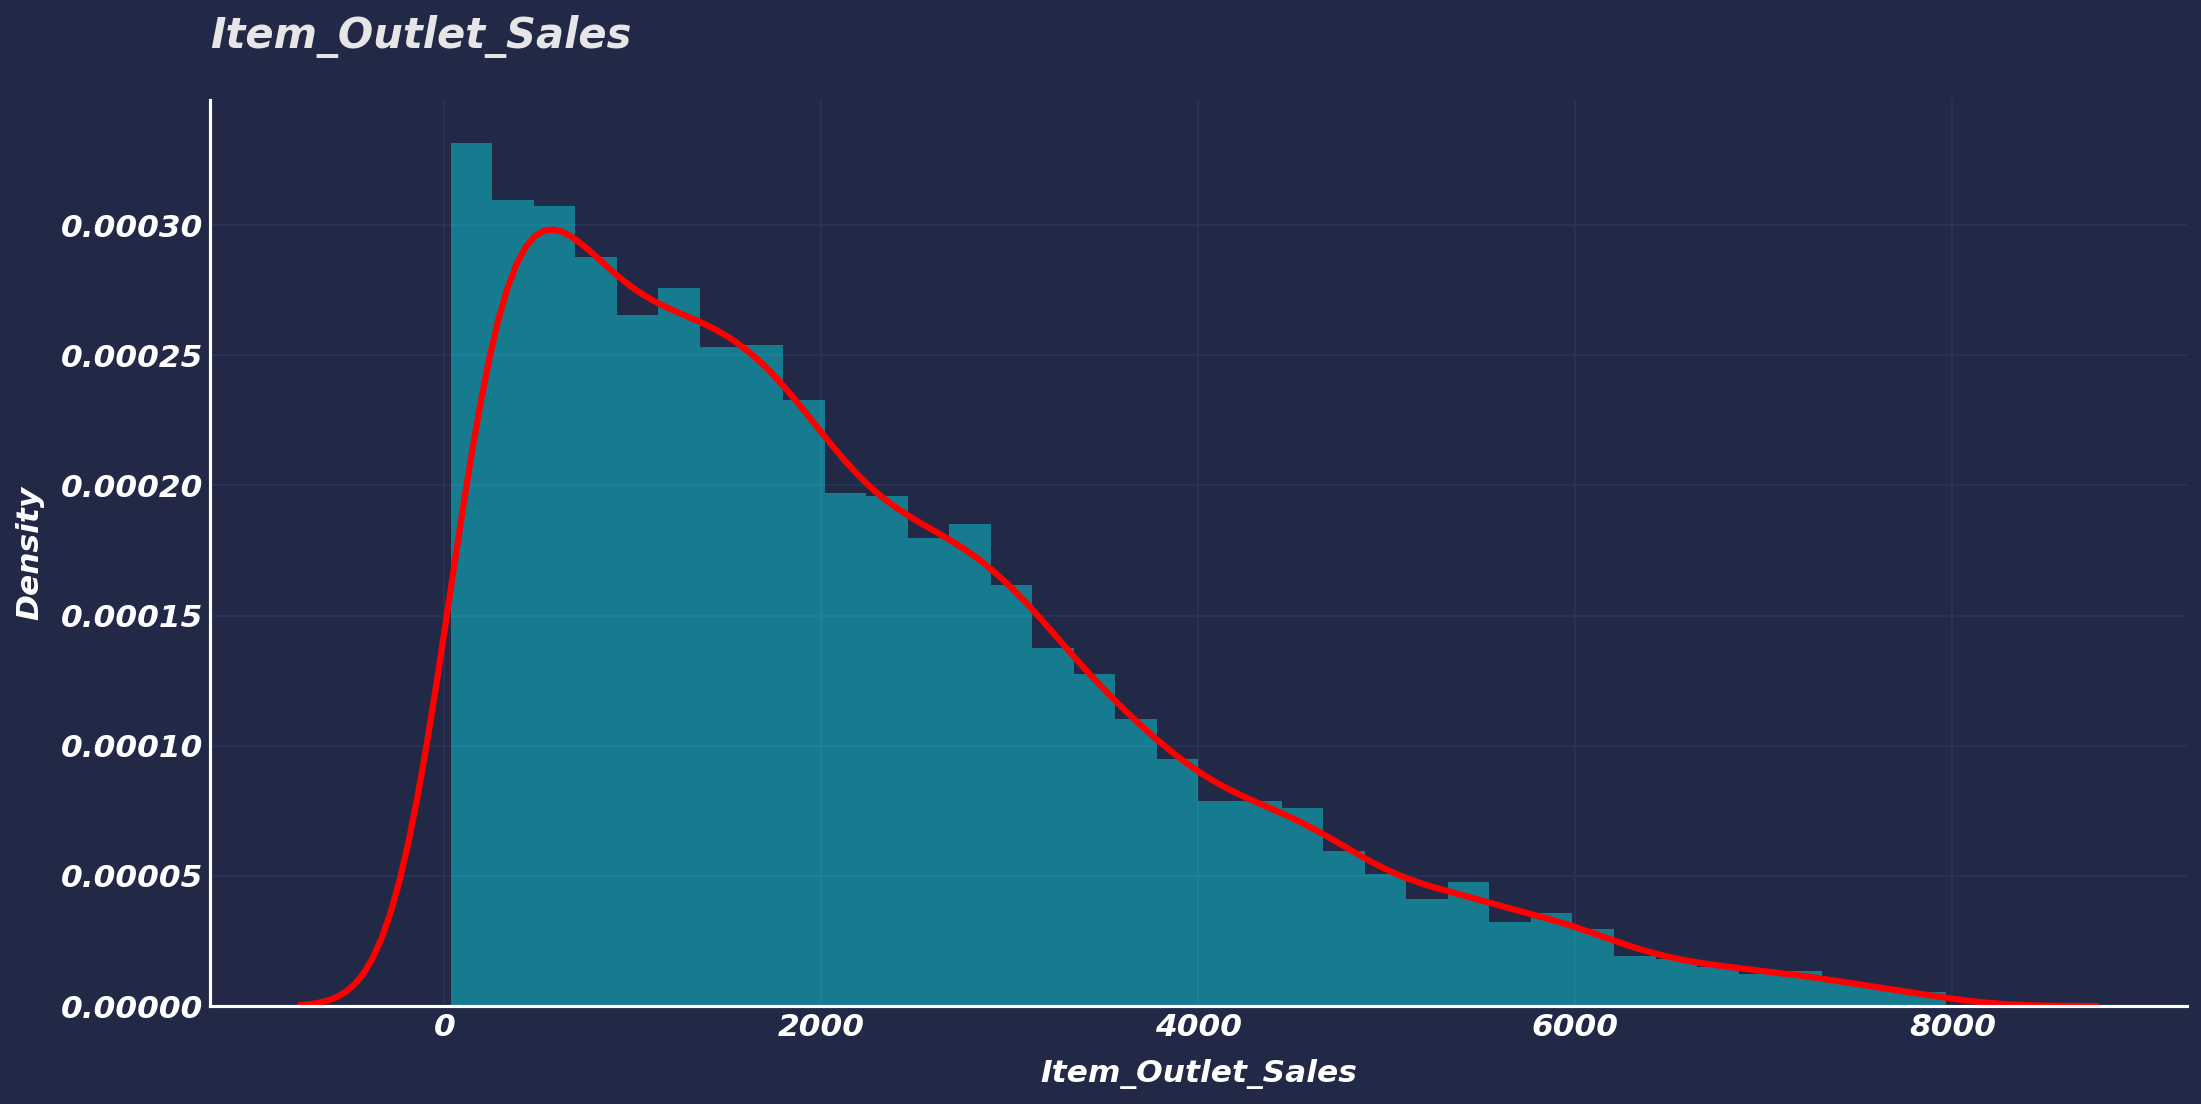

In [9]:
# setelah menghilangkan outlier

plt.figure(figsize=(17,8))

sns.distplot(sale.Item_Outlet_Sales,kde_kws={"linewidth":3,"color":"red"}) 
plt.title("Item_Outlet_Sales") 

print(f"Skew: {sale.Item_Outlet_Sales.skew()}")
print(f"Kurt: {sale.Item_Outlet_Sales.kurt()}") 

Skew: -0.887753343209305
Kurt: 0.55205473336735


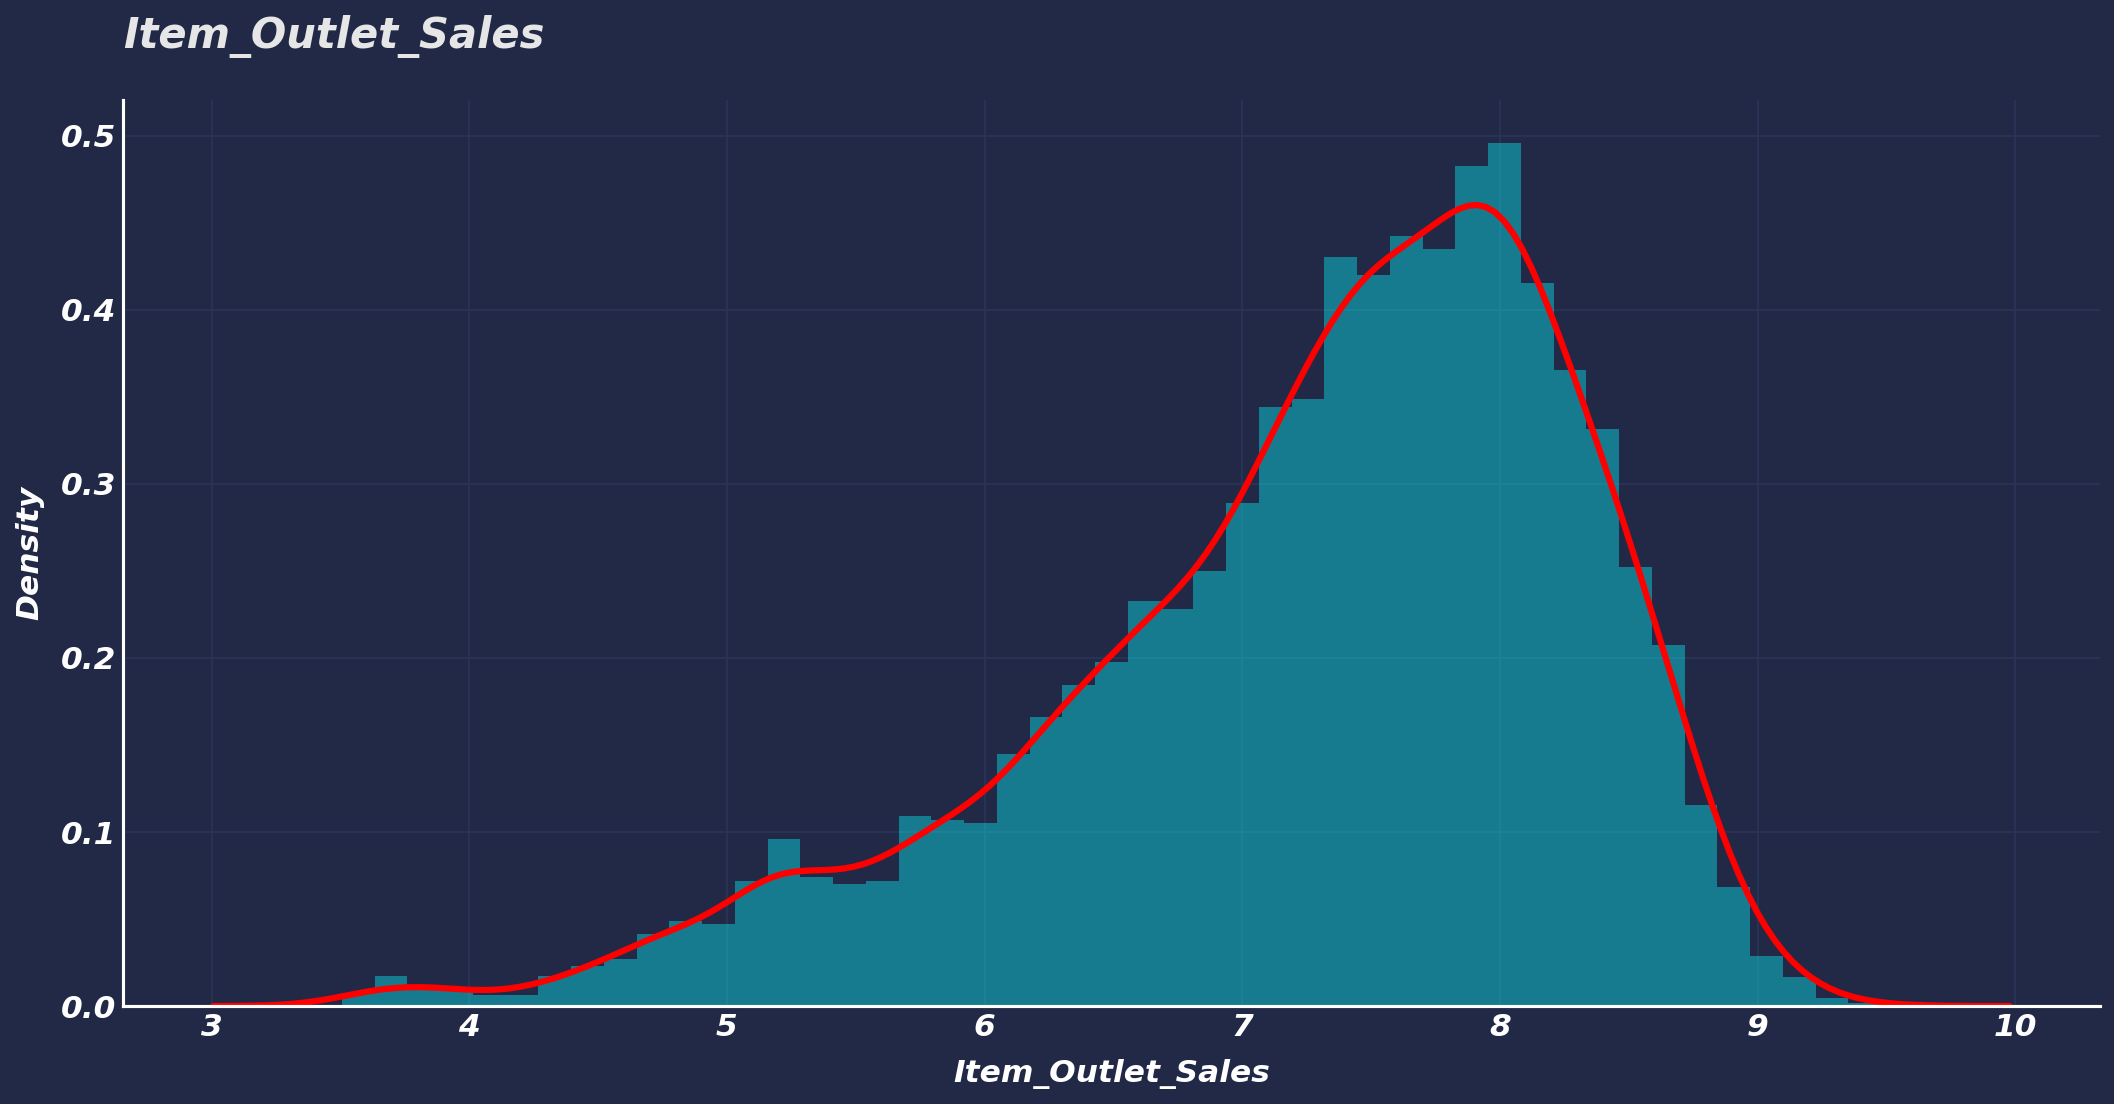

In [11]:
# setelah penormalan mengunakan log

plt.figure(figsize=(17,8))

sns.distplot(np.log(train.Item_Outlet_Sales),kde_kws={"linewidth":3,"color":"red"}) 
plt.title("Item_Outlet_Sales") 

print(f"Skew: {np.log(train.Item_Outlet_Sales).skew()}")
print(f"Kurt: {np.log(train.Item_Outlet_Sales).kurt()}") 

## Univariat & Bivariat Analysis

In [12]:
cater = train.select_dtypes("object").columns
number = train.select_dtypes("number").drop("Item_Outlet_Sales",axis=1).columns

In [ ]:
# categorical feature

In [14]:
train[cater].describe()

Item_Identifier  ...        Outlet_Type
count             8523  ...               8523
unique            1559  ...                  4
top              FDW13  ...  Supermarket Type1
freq                10  ...               5577

[4 rows x 7 columns]

In [ ]:
# item identifiers


In [29]:

train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
DRN47     9
FDW26     9
FDU12     9
         ..
FDY43     1
FDT35     1
FDE52     1
FDQ60     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
# extract id item 
item = train.Item_Identifier.apply(lambda x: str(x)[0:2])
 

Item_Identifier
FD         0.718644
NC         0.187610
DR         0.093746

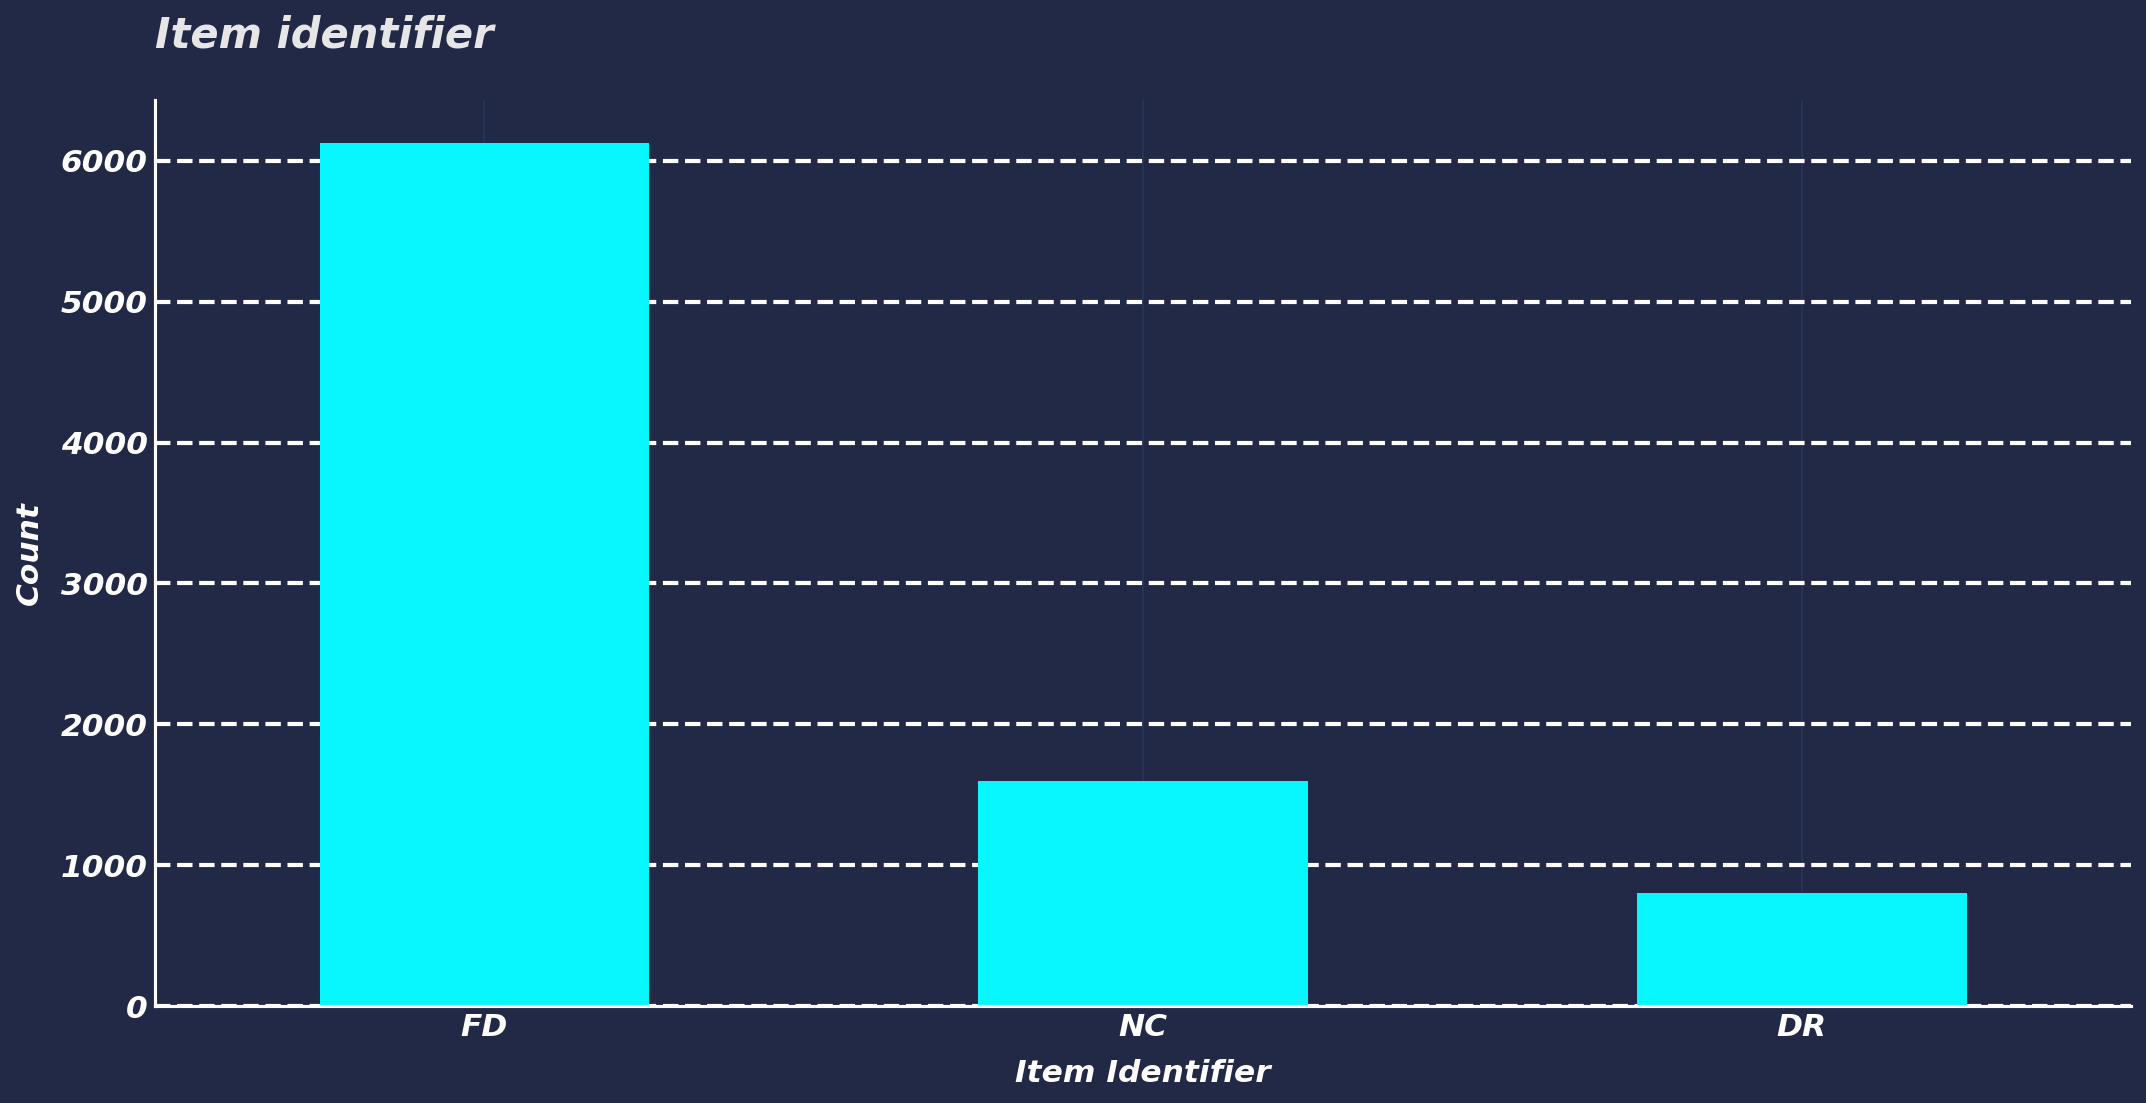

In [57]:
#plot item identifier
item.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Item identifier")
plt.xticks(rotation=0)
plt.xlabel("Item Identifier")
plt.ylabel("Count")

item.value_counts(normalize=True).to_frame()

In [42]:
item.describe()

count     8523
unique       3
top         FD
freq      6125
Name: Item_Identifier, dtype: object

In [52]:
train.groupby(item)["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
Item_Identifier                   
DR                     1997.333337
FD                     2215.354223
NC                     2142.721364

Text(0, 0.5, 'Item_outlet_sales')

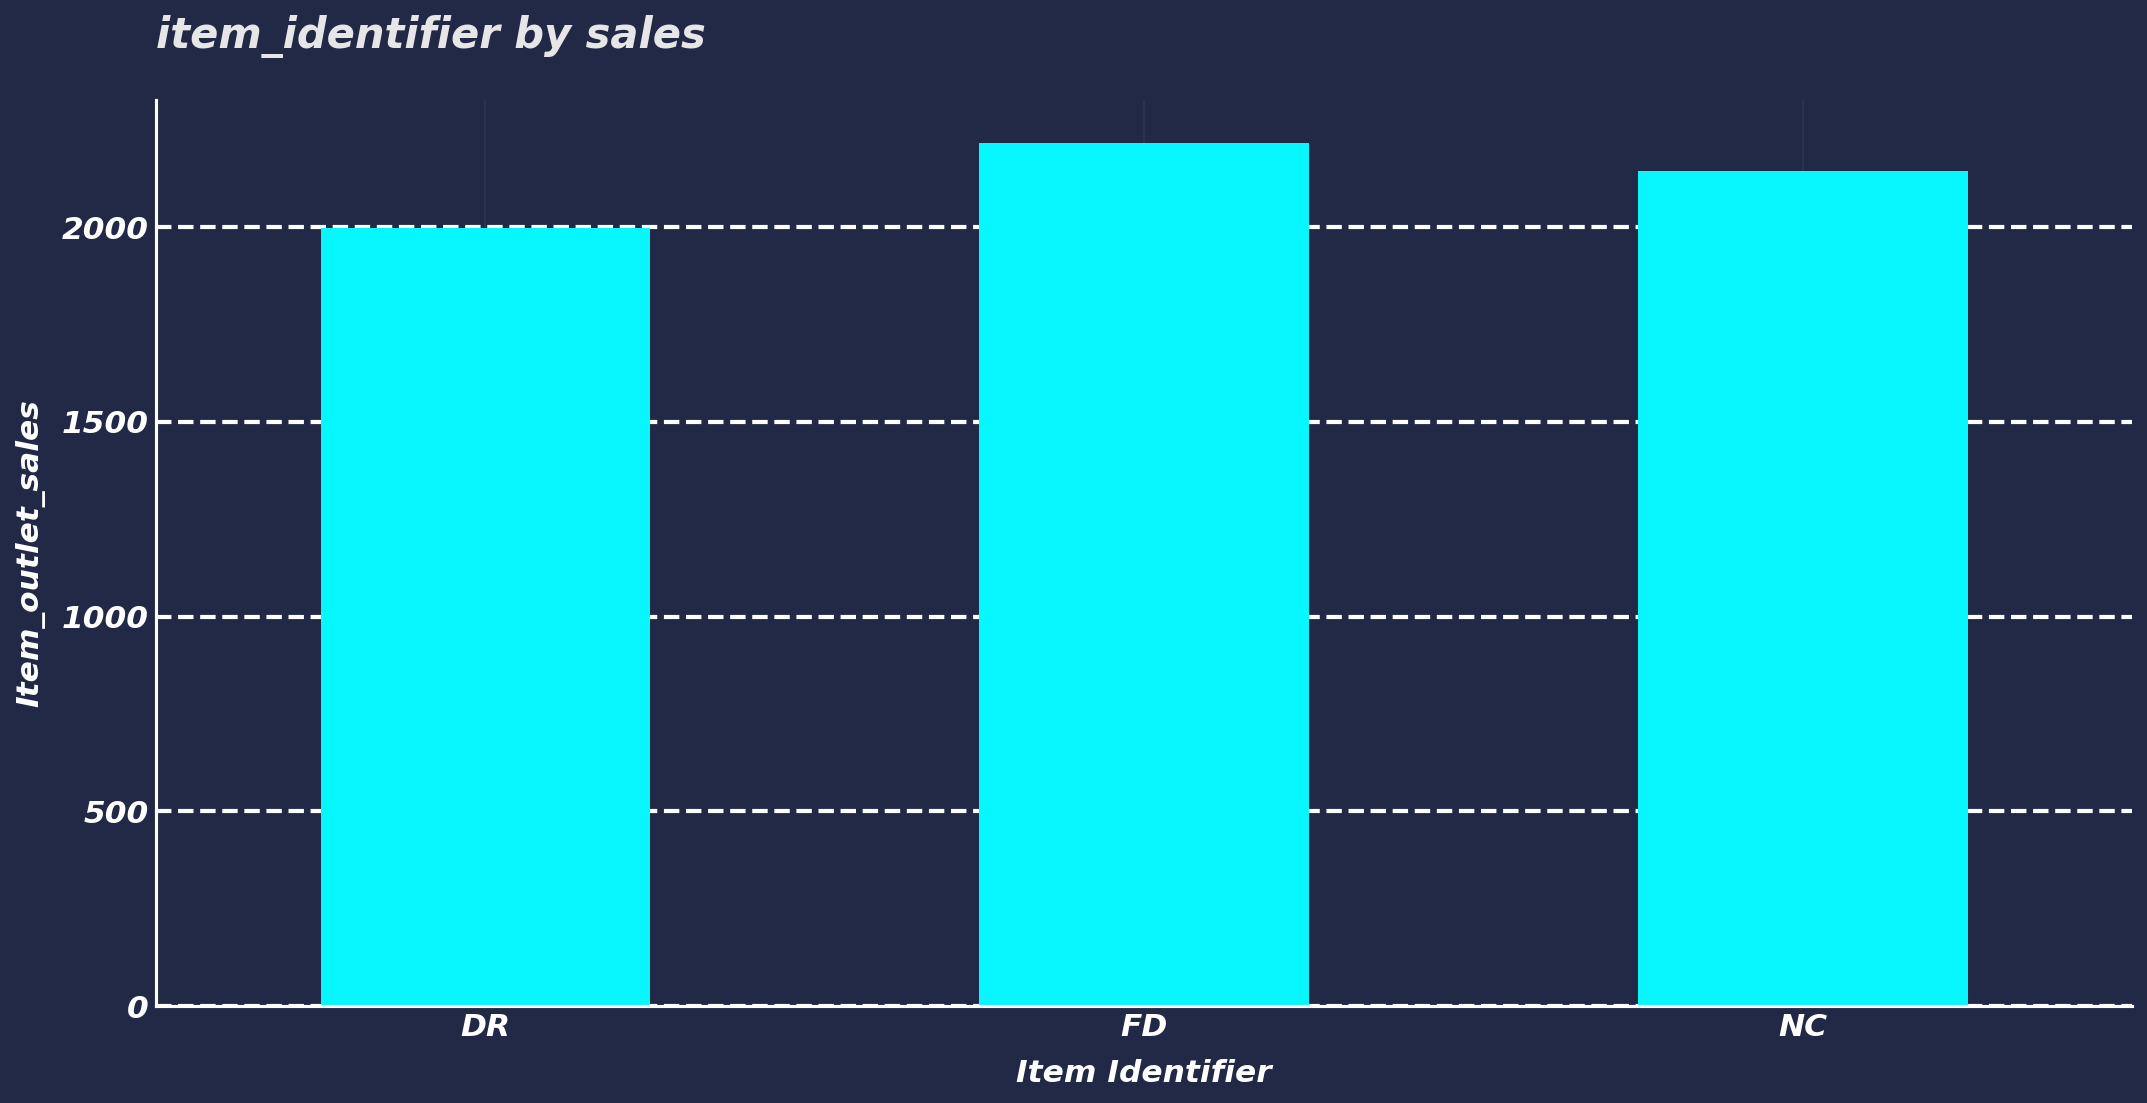

In [55]:
train.groupby(item)["Item_Outlet_Sales"].mean().plot(kind="bar",figsize=(17,8))
plt.grid(axis="y",linewidth=2,linestyle="--",color="white")
plt.title("item_identifier by sales")
plt.xticks(rotation=0)
plt.xlabel("Item Identifier")
plt.ylabel("Item_outlet_sales") 

Text(0.0, 1.0, 'ID by Item_Outlet_Sales')

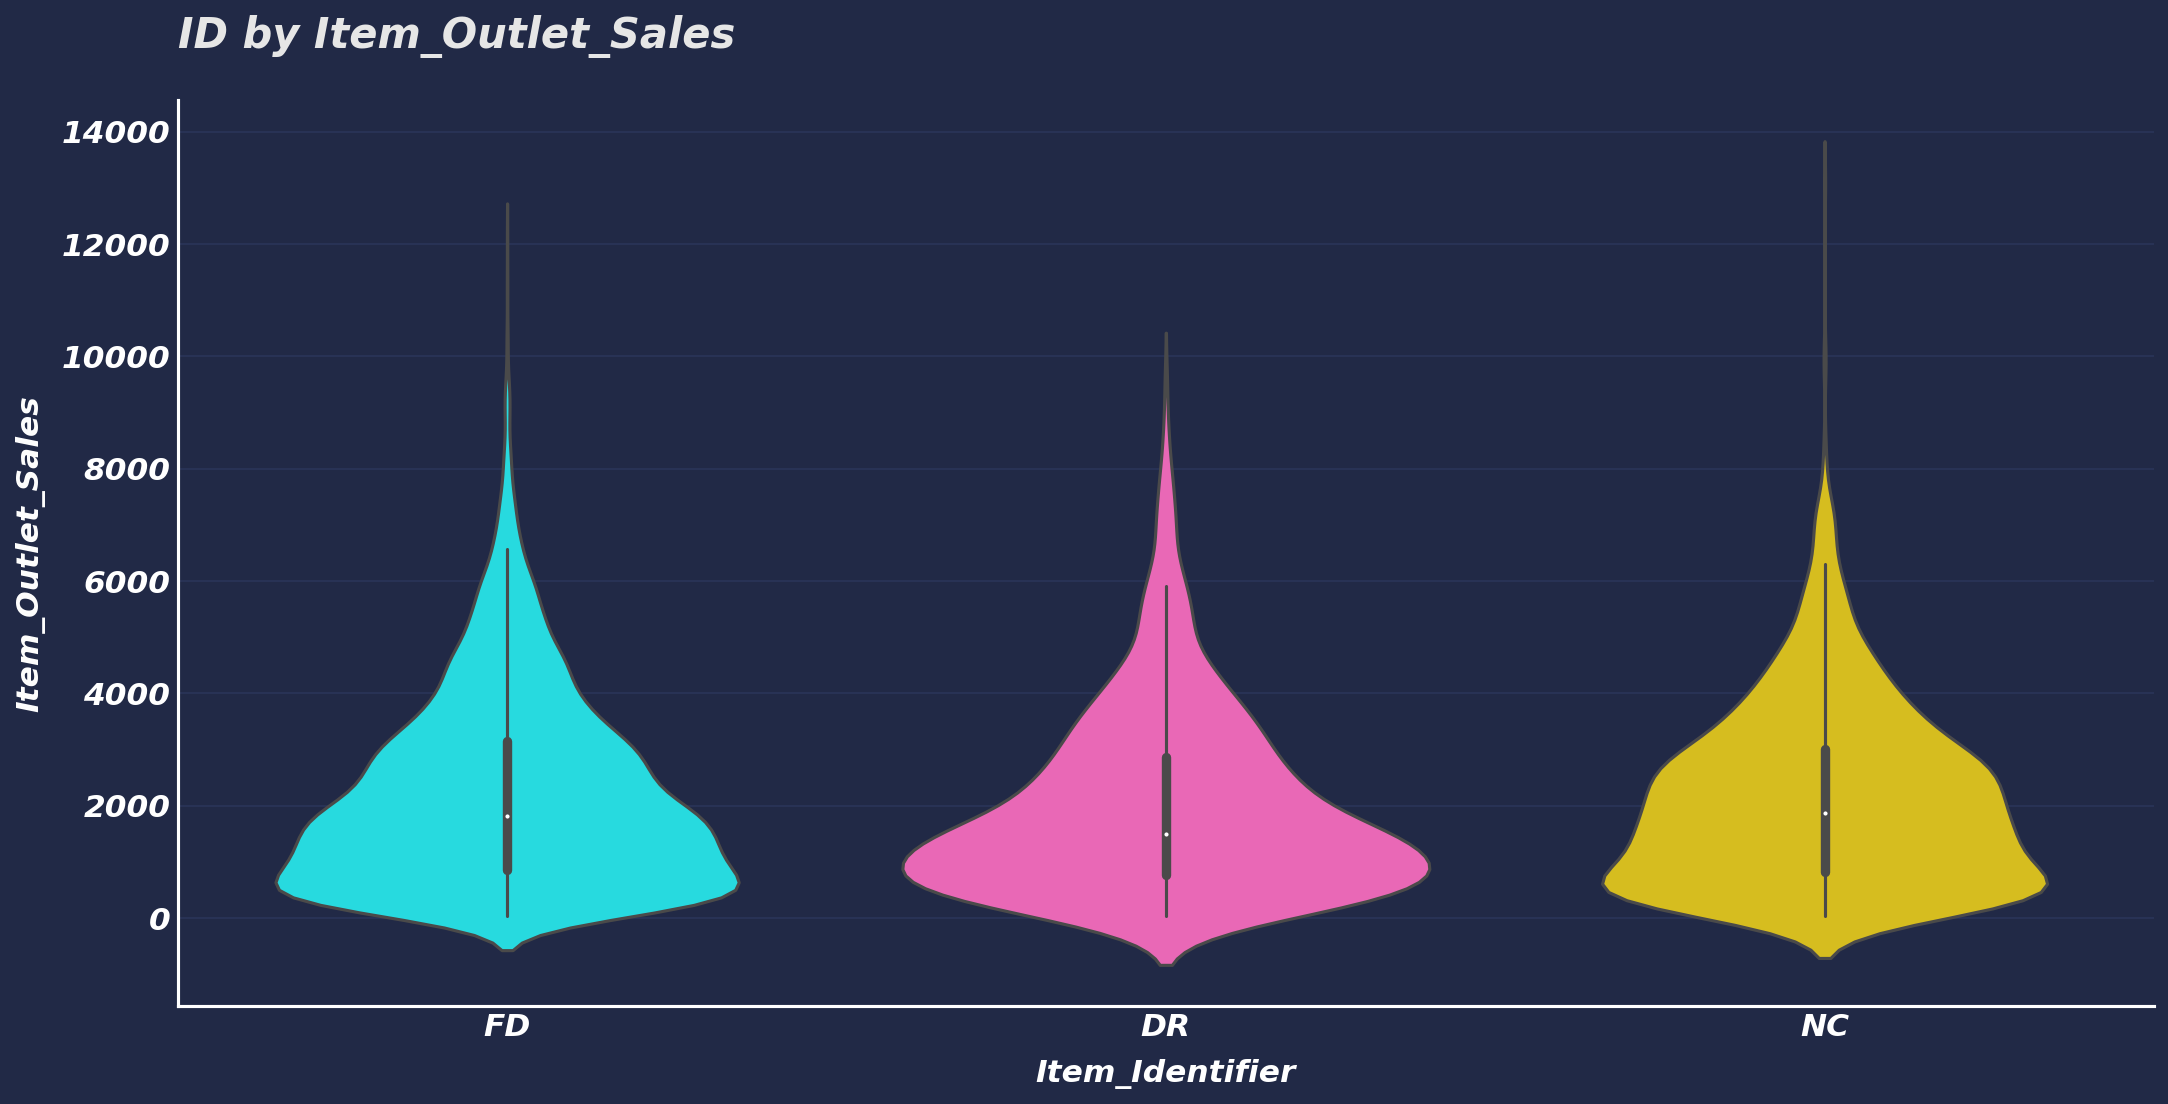

In [22]:
plt.figure(figsize=(17,8))

sns.violinplot(x=item, y=train.Item_Outlet_Sales)
plt.title("ID by Item_Outlet_Sales")

In [13]:
for i in [train,test]:
    i["ID"] = i.Item_Identifier.apply(lambda x: str(x)[0:2]) 

In [ ]:
# item_fat_content


In [9]:

train.Item_Fat_Content.value_counts() 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# ubah nilai ke format yang benar 

fat = {"Low Fat":"Low_Fat",
       "LF": "Low_Fat", 
       "low fat":"Low_Fat", 
       "reg": "Regular"}

for i in [train,test]:
    i["new_Item_Fat_Content"] = i.Item_Fat_Content.replace(fat) 

new_Item_Fat_Content
Low_Fat              0.647307
Regular              0.352693

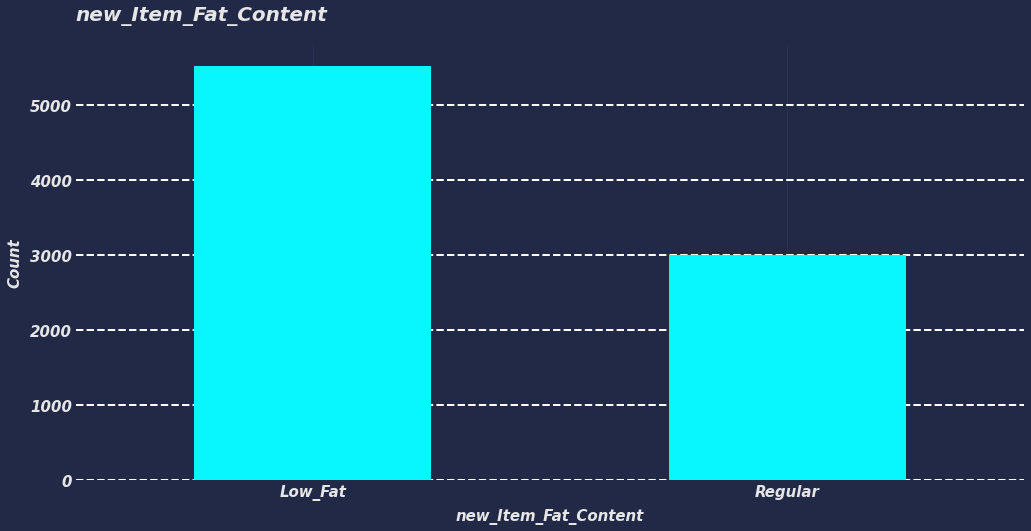

In [88]:
#plot item fat content

train.new_Item_Fat_Content.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("new_Item_Fat_Content")
plt.xticks(rotation=0)
plt.xlabel("new_Item_Fat_Content")
plt.ylabel("Count")

train.new_Item_Fat_Content.value_counts(normalize=True).to_frame()

In [89]:
train.groupby("new_Item_Fat_Content")["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
new_Item_Fat_Content                   
Low_Fat                     2157.711534
Regular                     2224.561170

Text(0.0, 1.0, 'new_Item_Fat_Content by Item_Outlet_Sales')

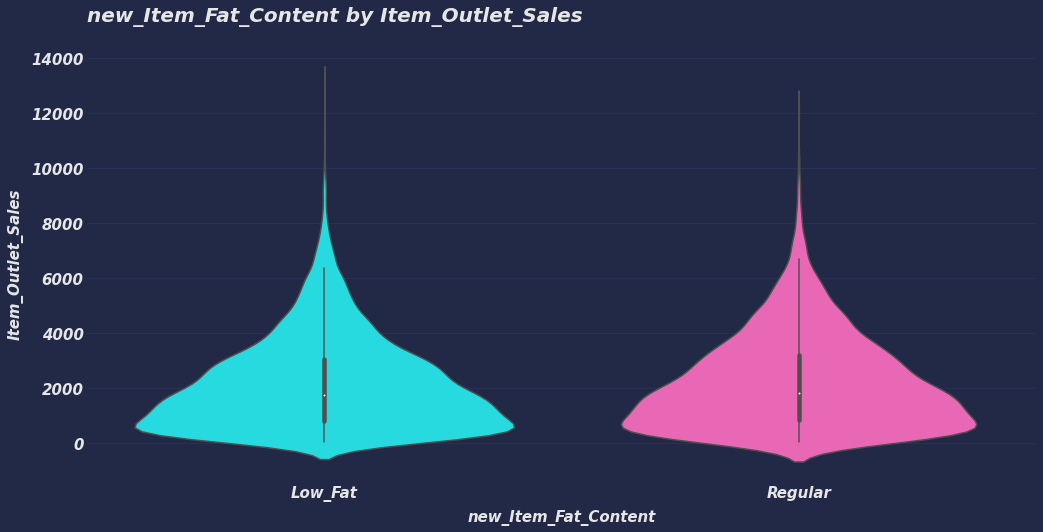

In [90]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.new_Item_Fat_Content, y=train.Item_Outlet_Sales)
plt.title("new_Item_Fat_Content by Item_Outlet_Sales")

In [ ]:
# item type

In [25]:

train.Item_Type.value_counts().to_frame() 

Item_Type
Fruits and Vegetables       1232
Snack Foods                 1200
Household                    910
Frozen Foods                 856
Dairy                        682
Canned                       649
Baking Goods                 648
Health and Hygiene           520
Soft Drinks                  445
Meat                         425
Breads                       251
Hard Drinks                  214
Others                       169
Starchy Foods                148
Breakfast                    110
Seafood                       64

In [15]:
# replace values

item = {"Starchy Foods": "Foods", 
        "Seafood": "Foods", 
        "Breads": "Foods", 
        "Meat": "Foods", 
        "Frozen Foods":"Foods", 
        "Snack Foods": "Foods", 
        "Breakfast": "Foods", 
        "Fruits and Vegetables":"Foods", 
        "Hard Drinks": "Drinks", 
        "Soft Drinks": "Drinks", 
        "Health and Hygiene":"Others", 
        "Baking Goods": "Others", 
        "Canned": "Others",
        "Dairy": "Others", 
        "Household":"Others"}
        #"
it = train.Item_Type.replace(item) 

In [59]:
it.value_counts()

Foods     4286
Others    3578
Drinks     659
Name: Item_Type, dtype: int64

Item_Type
Foods    0.502875
Others   0.419805
Drinks   0.077320

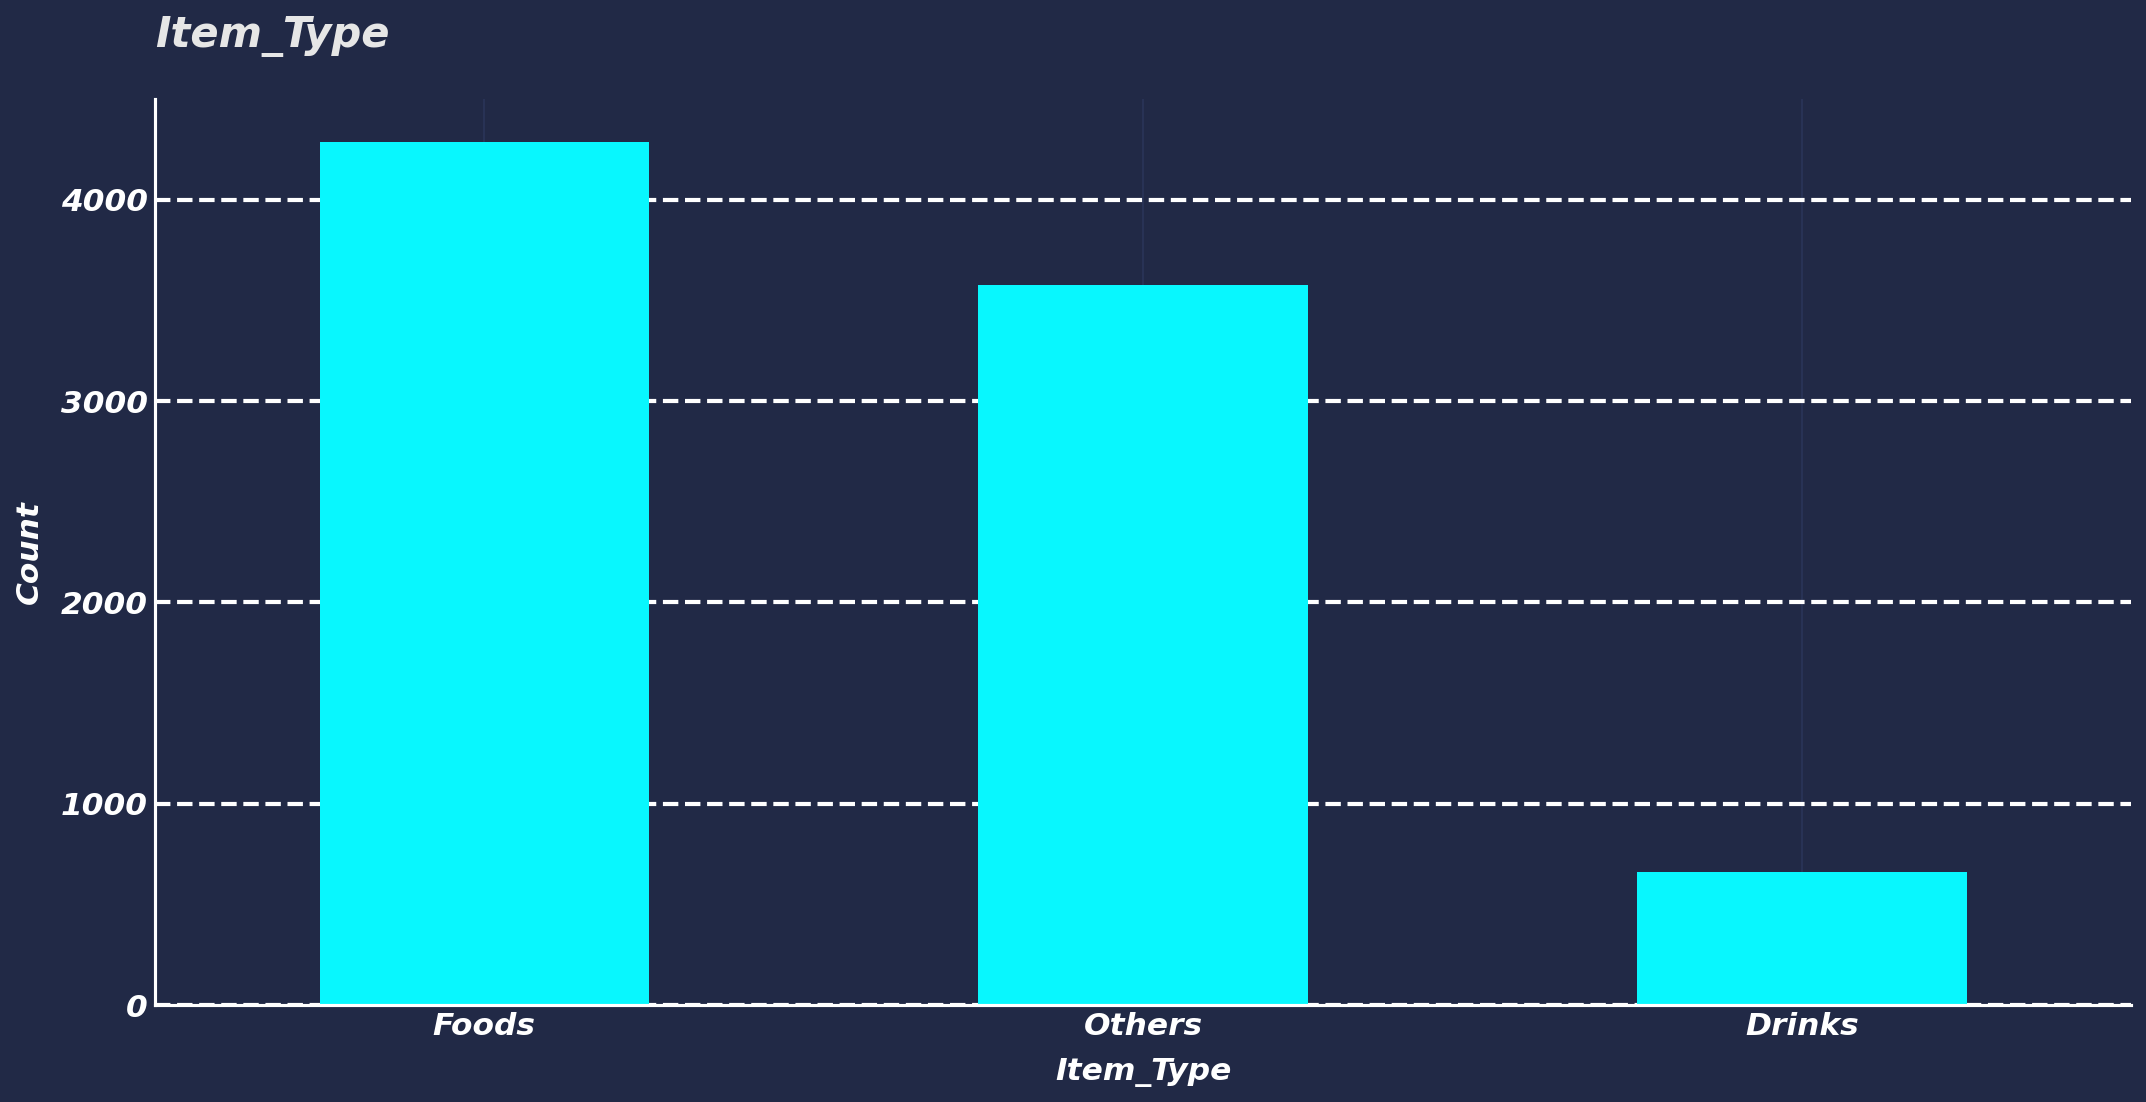

In [63]:
#plot item type
it.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Item_Type")
plt.xticks(rotation=0)
plt.xlabel("Item_Type")
plt.ylabel("Count")

it.value_counts(normalize=True).to_frame()

In [64]:
train.groupby(it)["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
Item_Type                   
Drinks           2049.607207
Foods            2235.639737
Others           2140.436654

Text(0.0, 1.0, 'Item_type by Item_Outlet_Sales')

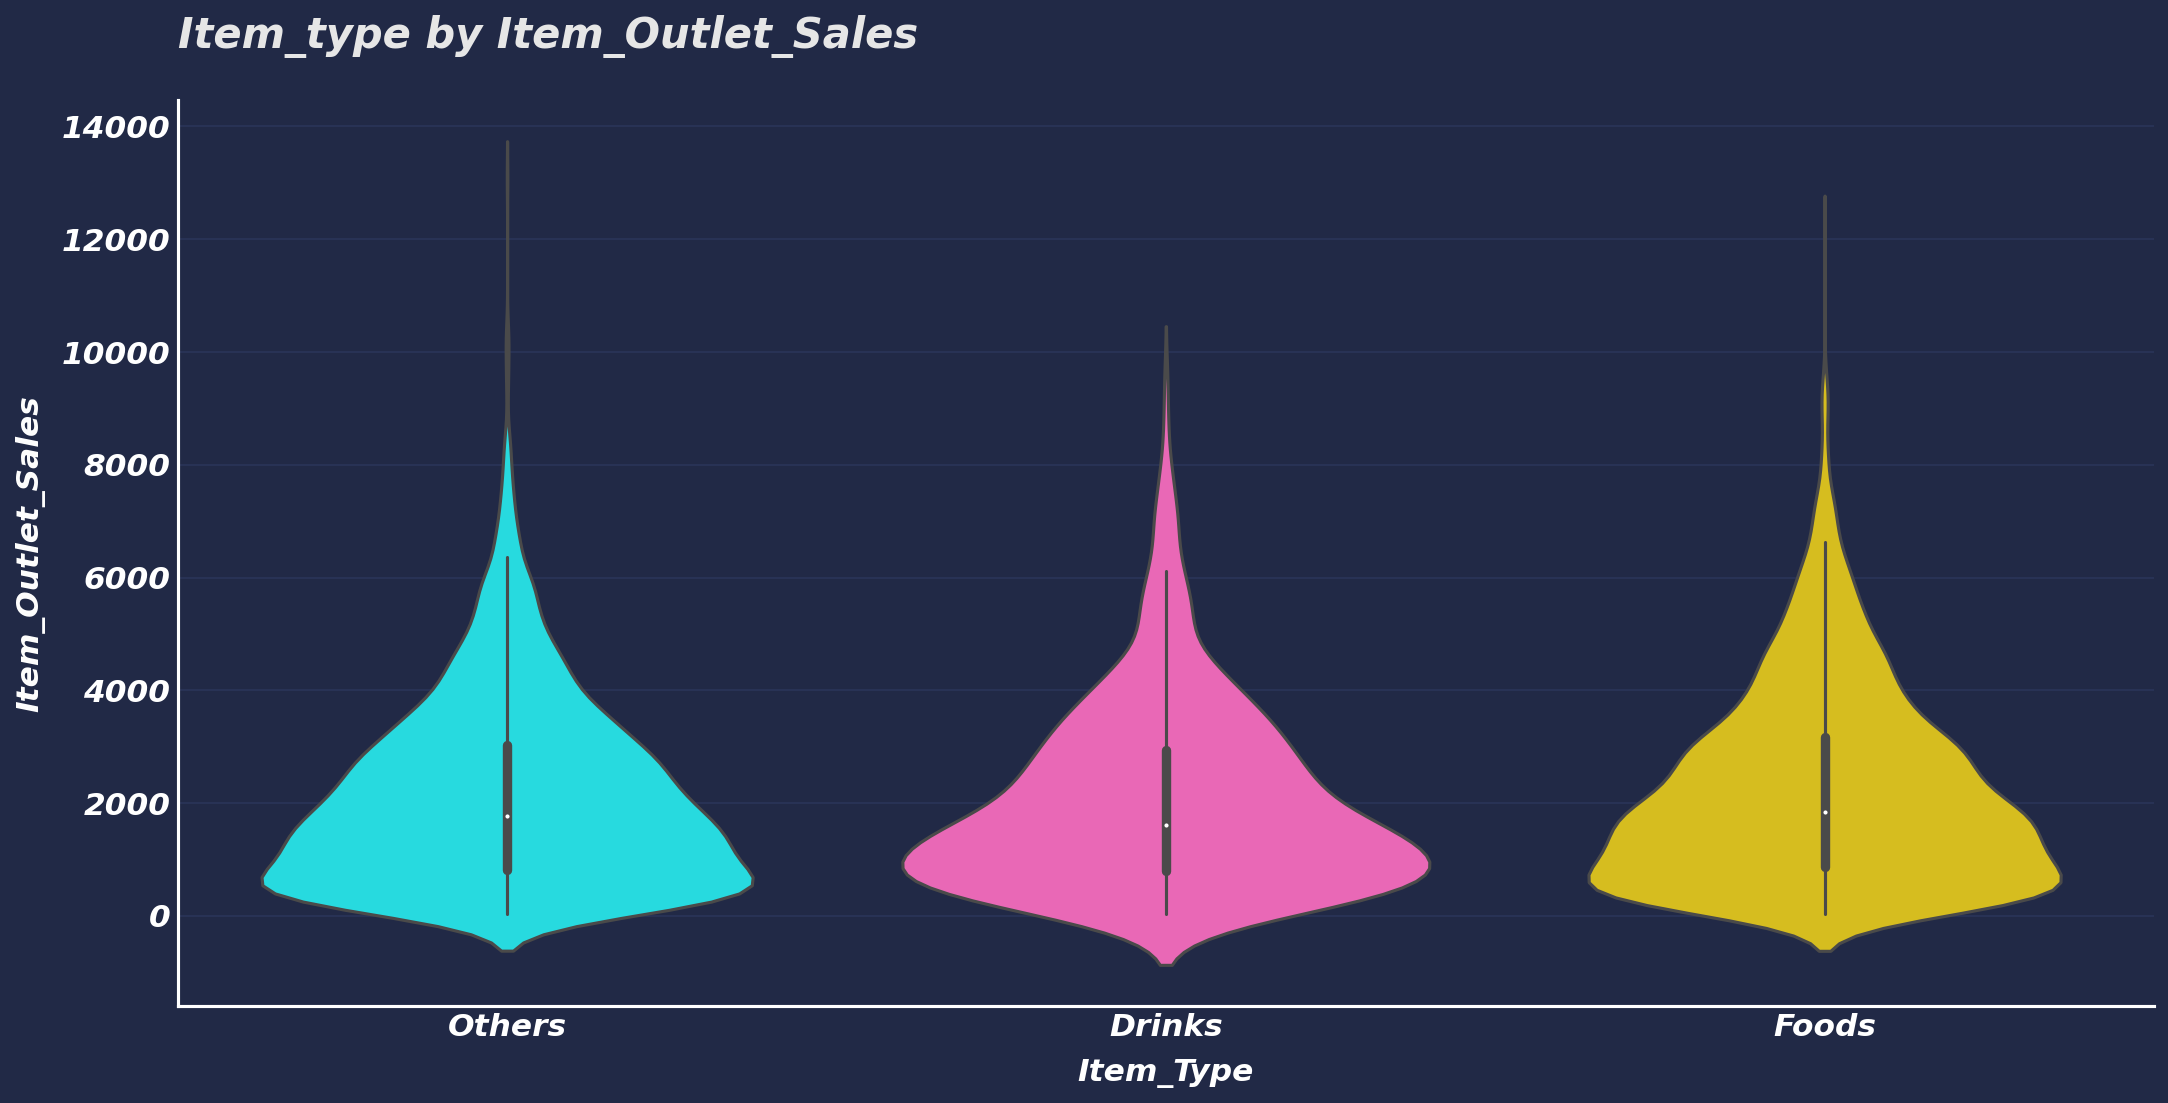

In [66]:
plt.figure(figsize=(17,8))

sns.violinplot(x=it, y=train.Item_Outlet_Sales)
plt.title("Item_type by Item_Outlet_Sales")

In [16]:
for i in [train,test]:
    i["new_Item_Type"] = i.Item_Type.replace(item) 

In [ ]:
# outlet identier 

In [69]:
train.Outlet_Identifier.value_counts() 

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Text(0, 0.5, 'Count')

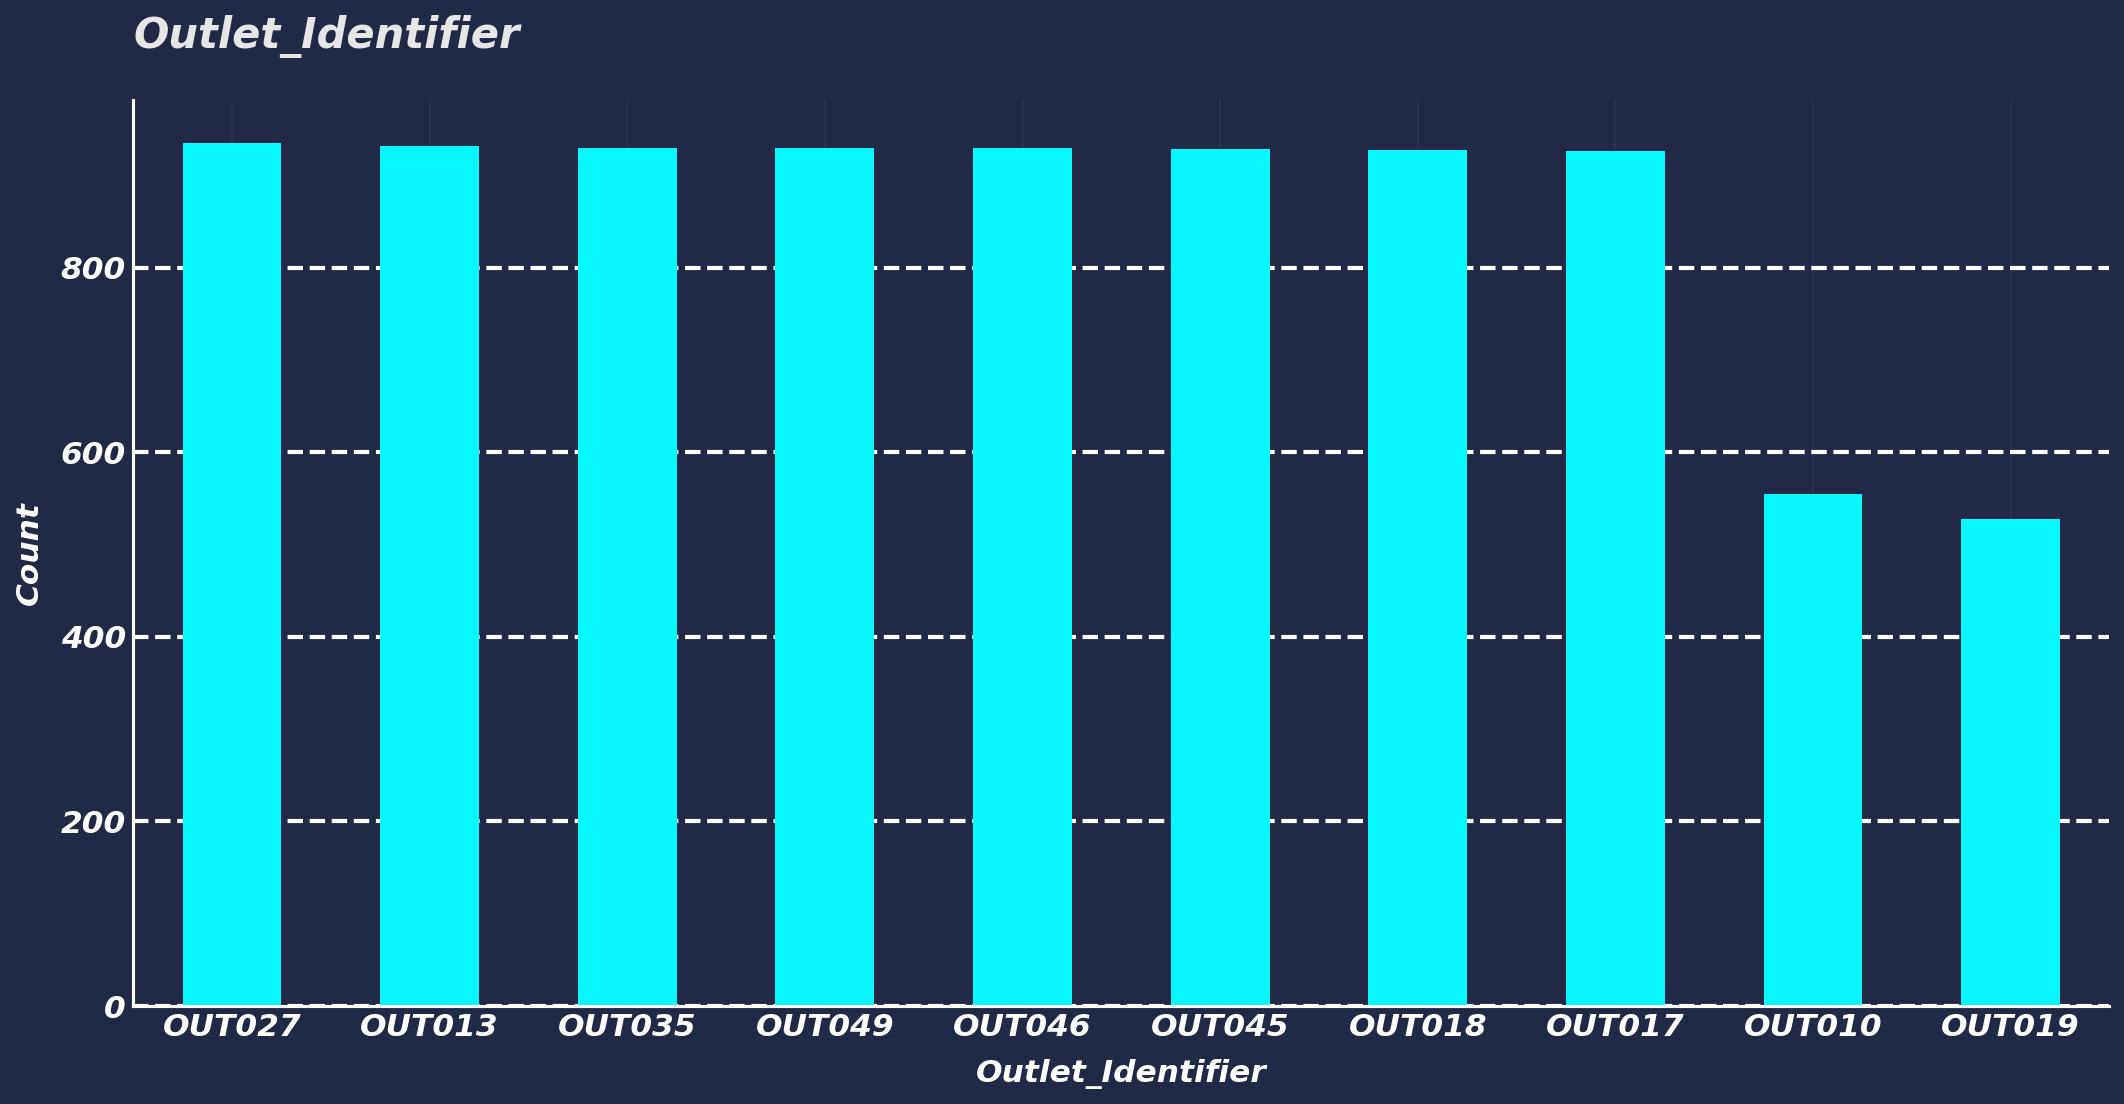

In [70]:
#plot item identifier
train.Outlet_Identifier.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Outlet_Identifier")
plt.xticks(rotation=0)
plt.xlabel("Outlet_Identifier")
plt.ylabel("Count")


In [74]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
Outlet_Identifier                   
OUT010                    339.351662
OUT013                   2298.995256
OUT017                   2340.675263
OUT018                   1995.498739
OUT019                    340.329723
OUT027                   3694.038558
OUT035                   2438.841866
OUT045                   2192.384798
OUT046                   2277.844267
OUT049                   2348.354635

In [82]:
# Outlet_Identifier == OUT019

train.query("Outlet_Identifier == 'OUT019'")["Item_Outlet_Sales"].nlargest(10)

8353    1482.0708
7748    1470.0864
4538    1324.9420
5448    1304.9680
6754    1148.5050
5252    1126.5336
3545    1106.5596
1671    1078.5960
5862    1061.9510
6424    1041.3112
Name: Item_Outlet_Sales, dtype: float64

In [83]:
# outlet_identifiers == OUT027 top 10 
train.query("Outlet_Identifier == 'OUT027'")["Item_Outlet_Sales"].nlargest(10)

7188    13086.9648
5223    12117.5600
1450    11445.1020
4349    10993.6896
6541    10306.5840
1009    10236.6750
7191    10072.8882
7752     9678.0688
5500     9562.2196
6606     9554.2300
Name: Item_Outlet_Sales, dtype: float64

In [76]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_Identifier, y=train.Item_Outlet_Sales)
plt.title("Outlet Identifiers by Item_Outlet_Sales")

Text(0.0, 1.0, 'Outlet Identifiers by Item_Outlet_Sales')

In [ ]:
# outlet size

In [89]:

train.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
# replace nan with ?
for i in [train, test]: 
    i["Outlet_Size"] = i.Outlet_Size.replace(np.nan, "?") 

Text(0, 0.5, 'Count')

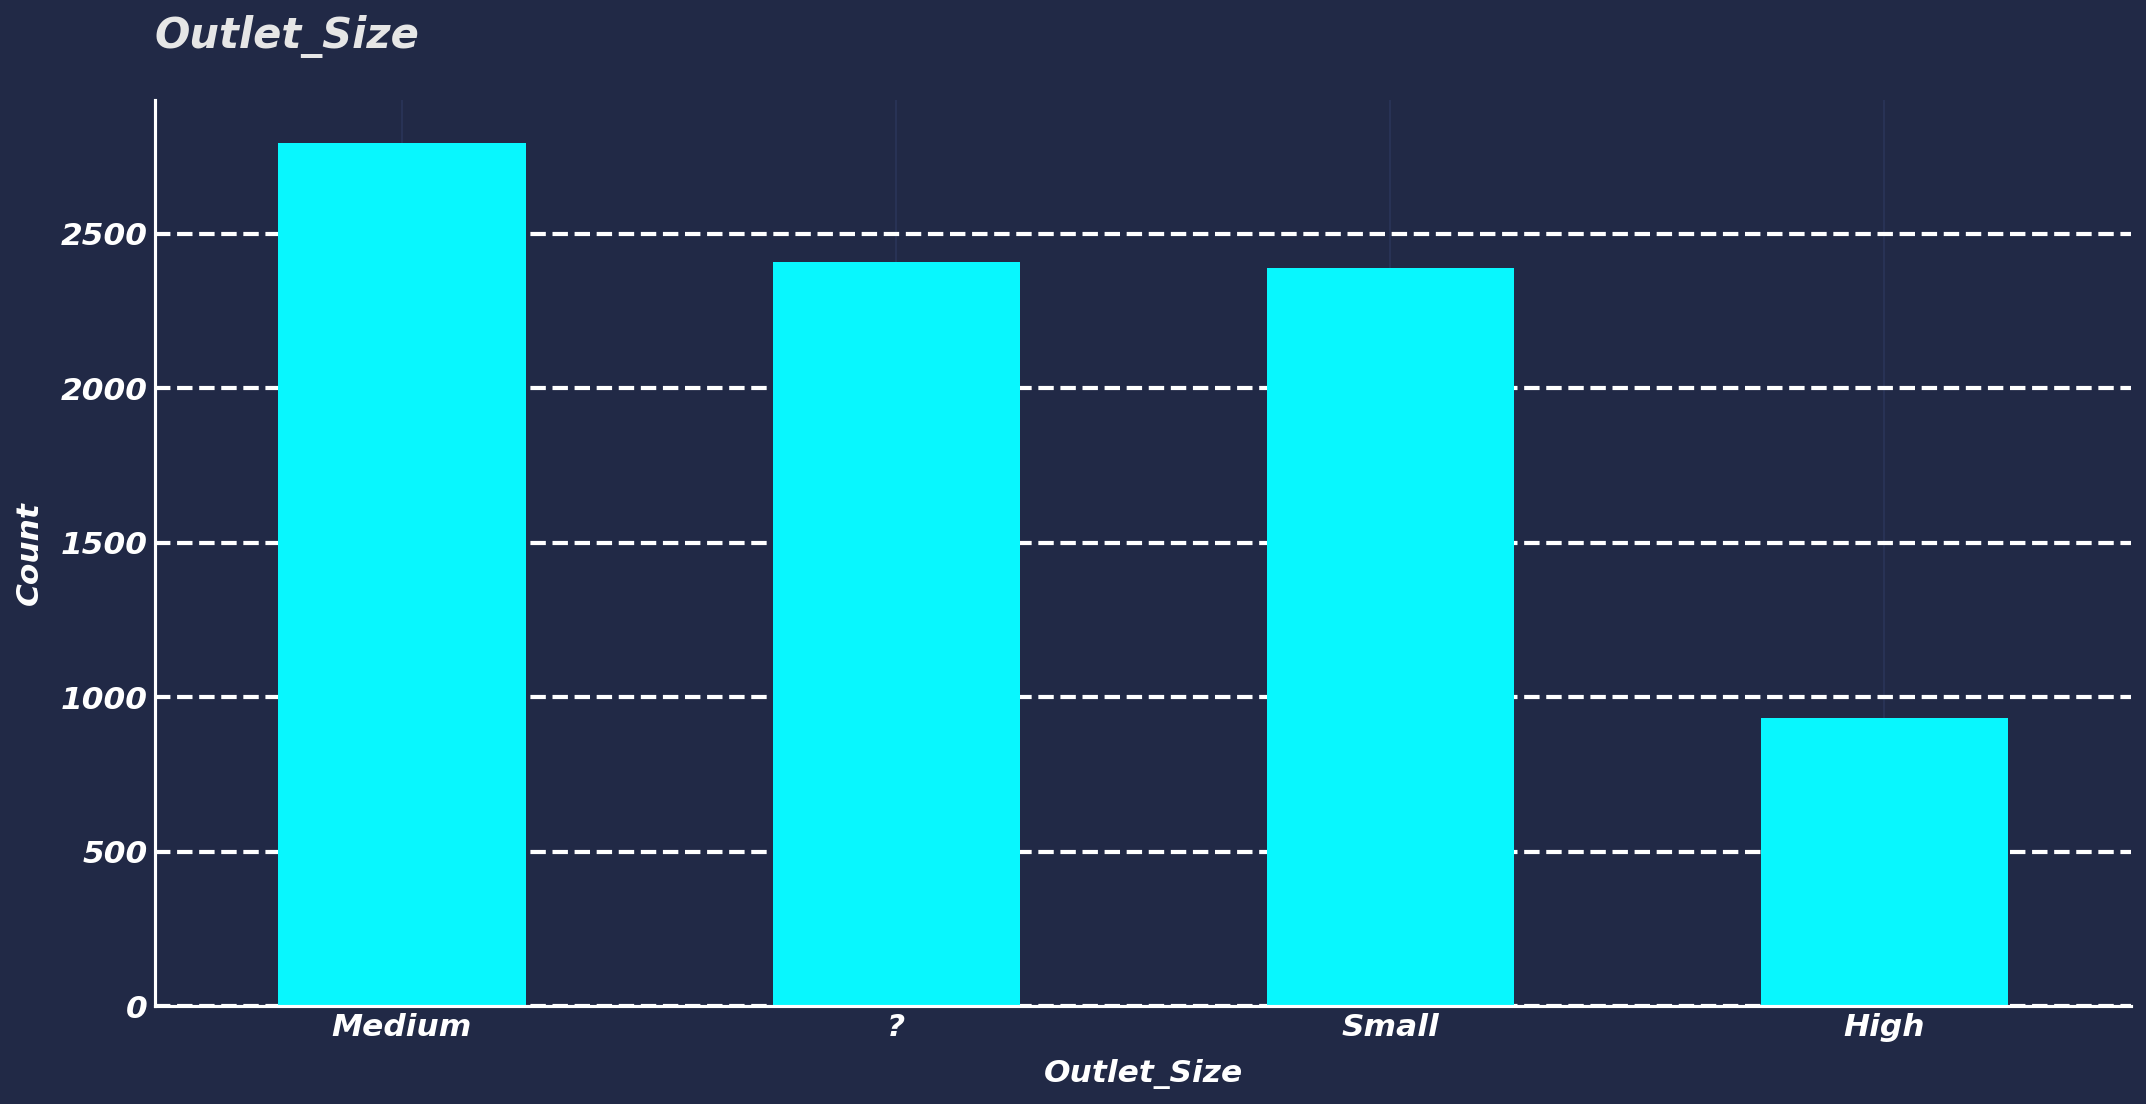

In [52]:
#plot outlet size

train.Outlet_Size.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Outlet_Size")
plt.xticks(rotation=0)
plt.xlabel("Outlet_Size")
plt.ylabel("Count")


In [93]:
# mean target by outlet_size

train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().to_frame()

Item_Outlet_Sales
Outlet_Size                   
?                  1822.626947
High               2298.995256
Medium             2681.603542
Small              1912.149161

In [24]:
# filter ? values

train.query("Outlet_Size == '?'").sample(10) 

Item_Identifier  ...  ID
4167           FDT40  ...  FD
1709           FDU60  ...  FD
6108           NCI06  ...  NC
4133           FDT27  ...  FD
4280           NCZ17  ...  NC
6917           FDK55  ...  FD
3534           FDT11  ...  FD
7007           FDC16  ...  FD
2445           DRE27  ...  DR
5339           FDK55  ...  FD

[10 rows x 13 columns]

In [22]:
# 10 target paling mahal berdasarkan nilai yang hilang dari outlet size
train.query("Outlet_Size == '?'")["Item_Outlet_Sales"].nlargest(10) 

4961    9664.7528
997     9275.9256
8039    8994.9580
2216    8851.1452
2535    8760.5964
2293    8604.7992
7256    8323.8316
7076    8245.2672
6993    7719.2852
304     7696.6480
Name: Item_Outlet_Sales, dtype: float64

In [20]:
# 10 target paling murah berdasarkan nilai yang hilang dari outlet size

train.query("Outlet_Size == '?'")["Item_Outlet_Sales"].nsmallest(10) 

906     33.2900
6950    33.2900
7388    35.2874
4265    36.6190
4280    37.9506
4350    39.9480
5368    41.2796
4297    41.9454
7632    41.9454
5192    44.6086
Name: Item_Outlet_Sales, dtype: float64

In [18]:
# fillna with values of ffill

for i in [train, test]: 
    i["Outlet_Size"] = i.Outlet_Size.replace("?", np.nan) 
    i["Outlet_Size"].fillna(method = "ffill", inplace=True) 
    

In [95]:
# oultet size
train.Outlet_Size.value_counts(dropna=False)

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [96]:
# mean target by outlet_size,after fillna

train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().to_frame()

Item_Outlet_Sales
Outlet_Size                   
High               2183.929805
Medium             2439.236249
Small              1876.411850

In [ ]:
# Outlet_Location_Type


Outlet_Location_Type
Tier 3              0.393054
Tier 2              0.326763
Tier 1              0.280183

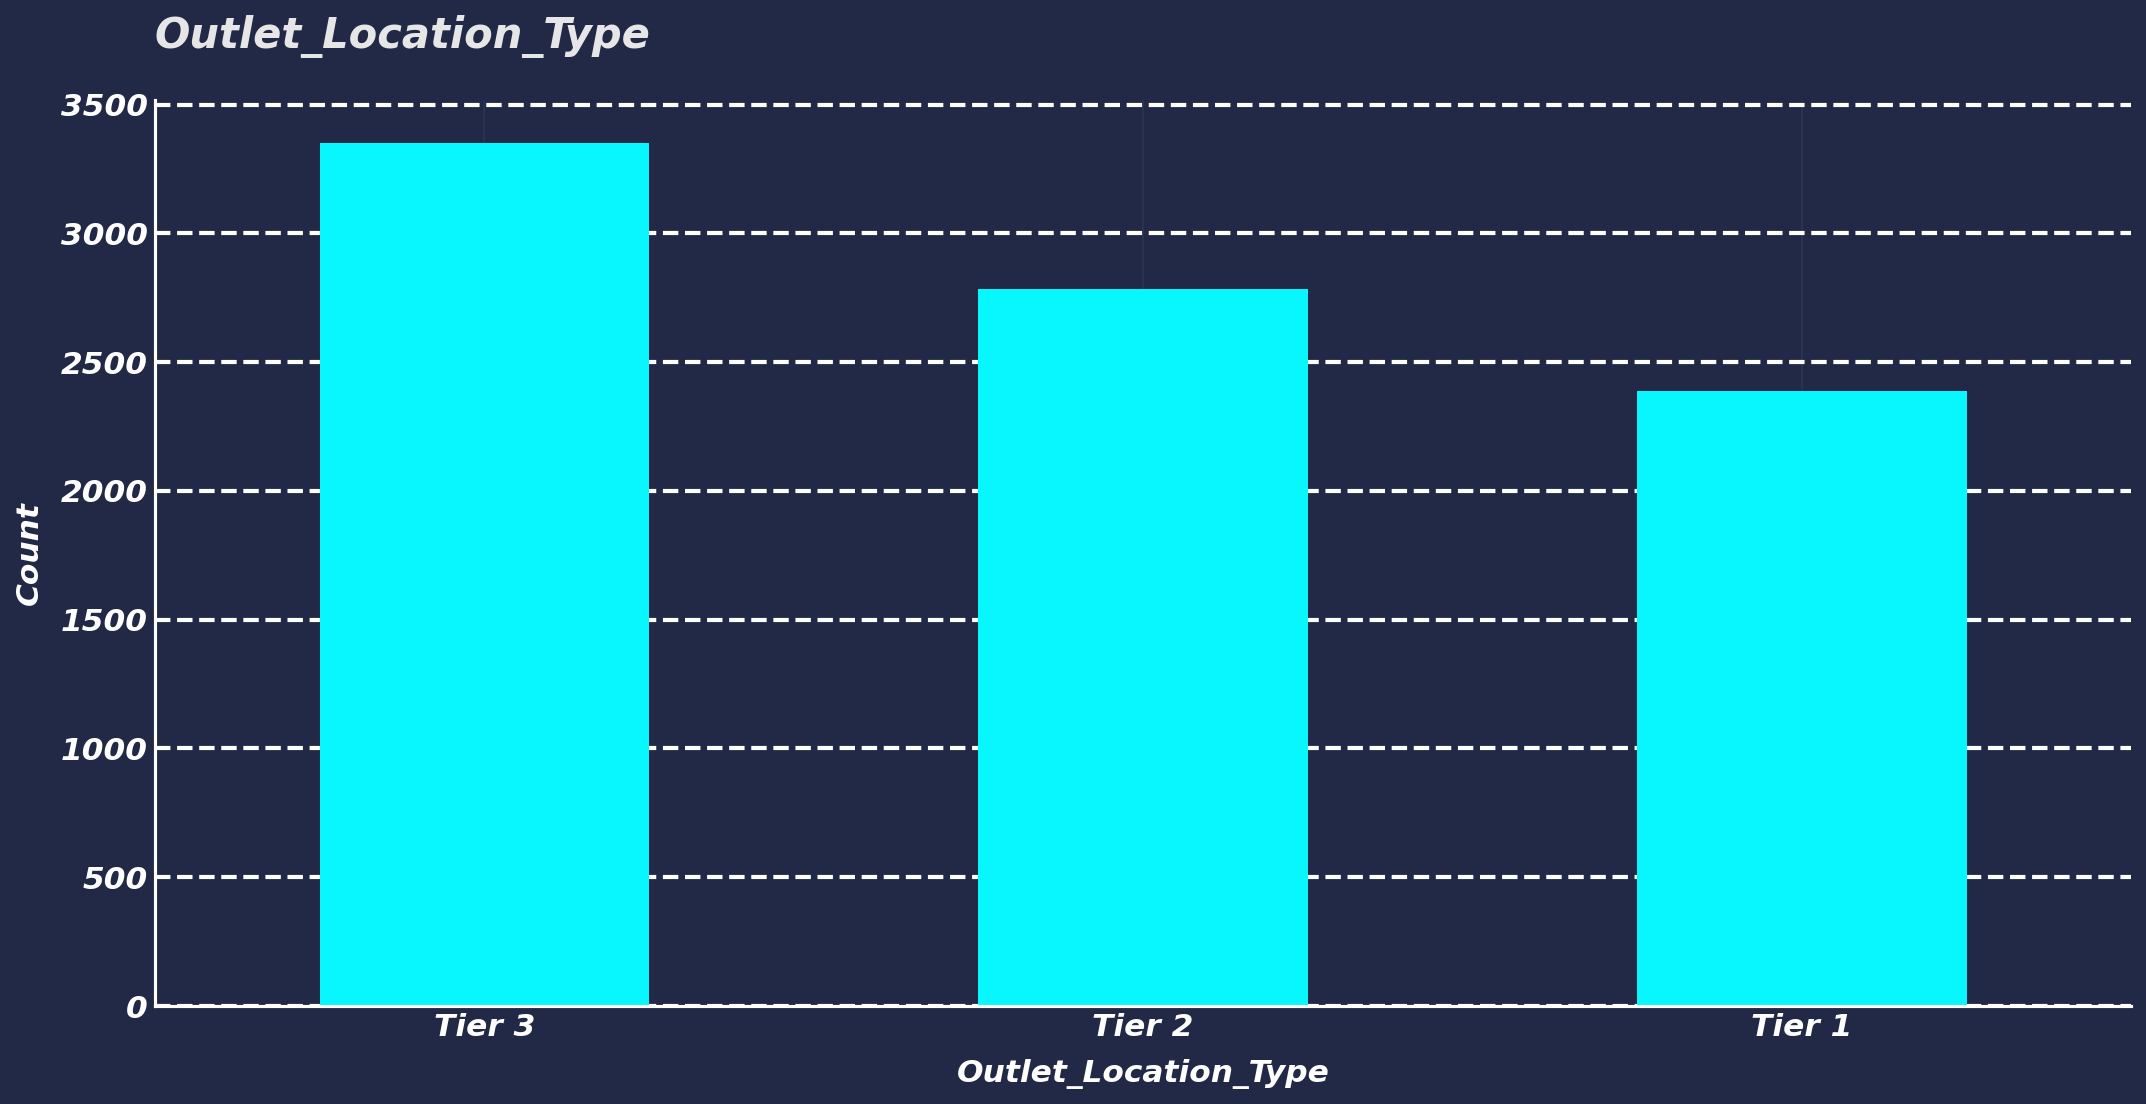

In [63]:

#plot Outlet_Location_Type

train.Outlet_Location_Type.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Outlet_Location_Type")
plt.xticks(rotation=0)
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Count")

train.Outlet_Location_Type.value_counts(normalize=True).to_frame()

In [67]:
train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe() 

count  ...         max
Outlet_Location_Type          ...            
Tier 1                2388.0  ...   9779.9362
Tier 2                2785.0  ...   9664.7528
Tier 3                3350.0  ...  13086.9648

[3 rows x 8 columns]

Text(0.0, 1.0, 'Outlet_Local_Type')

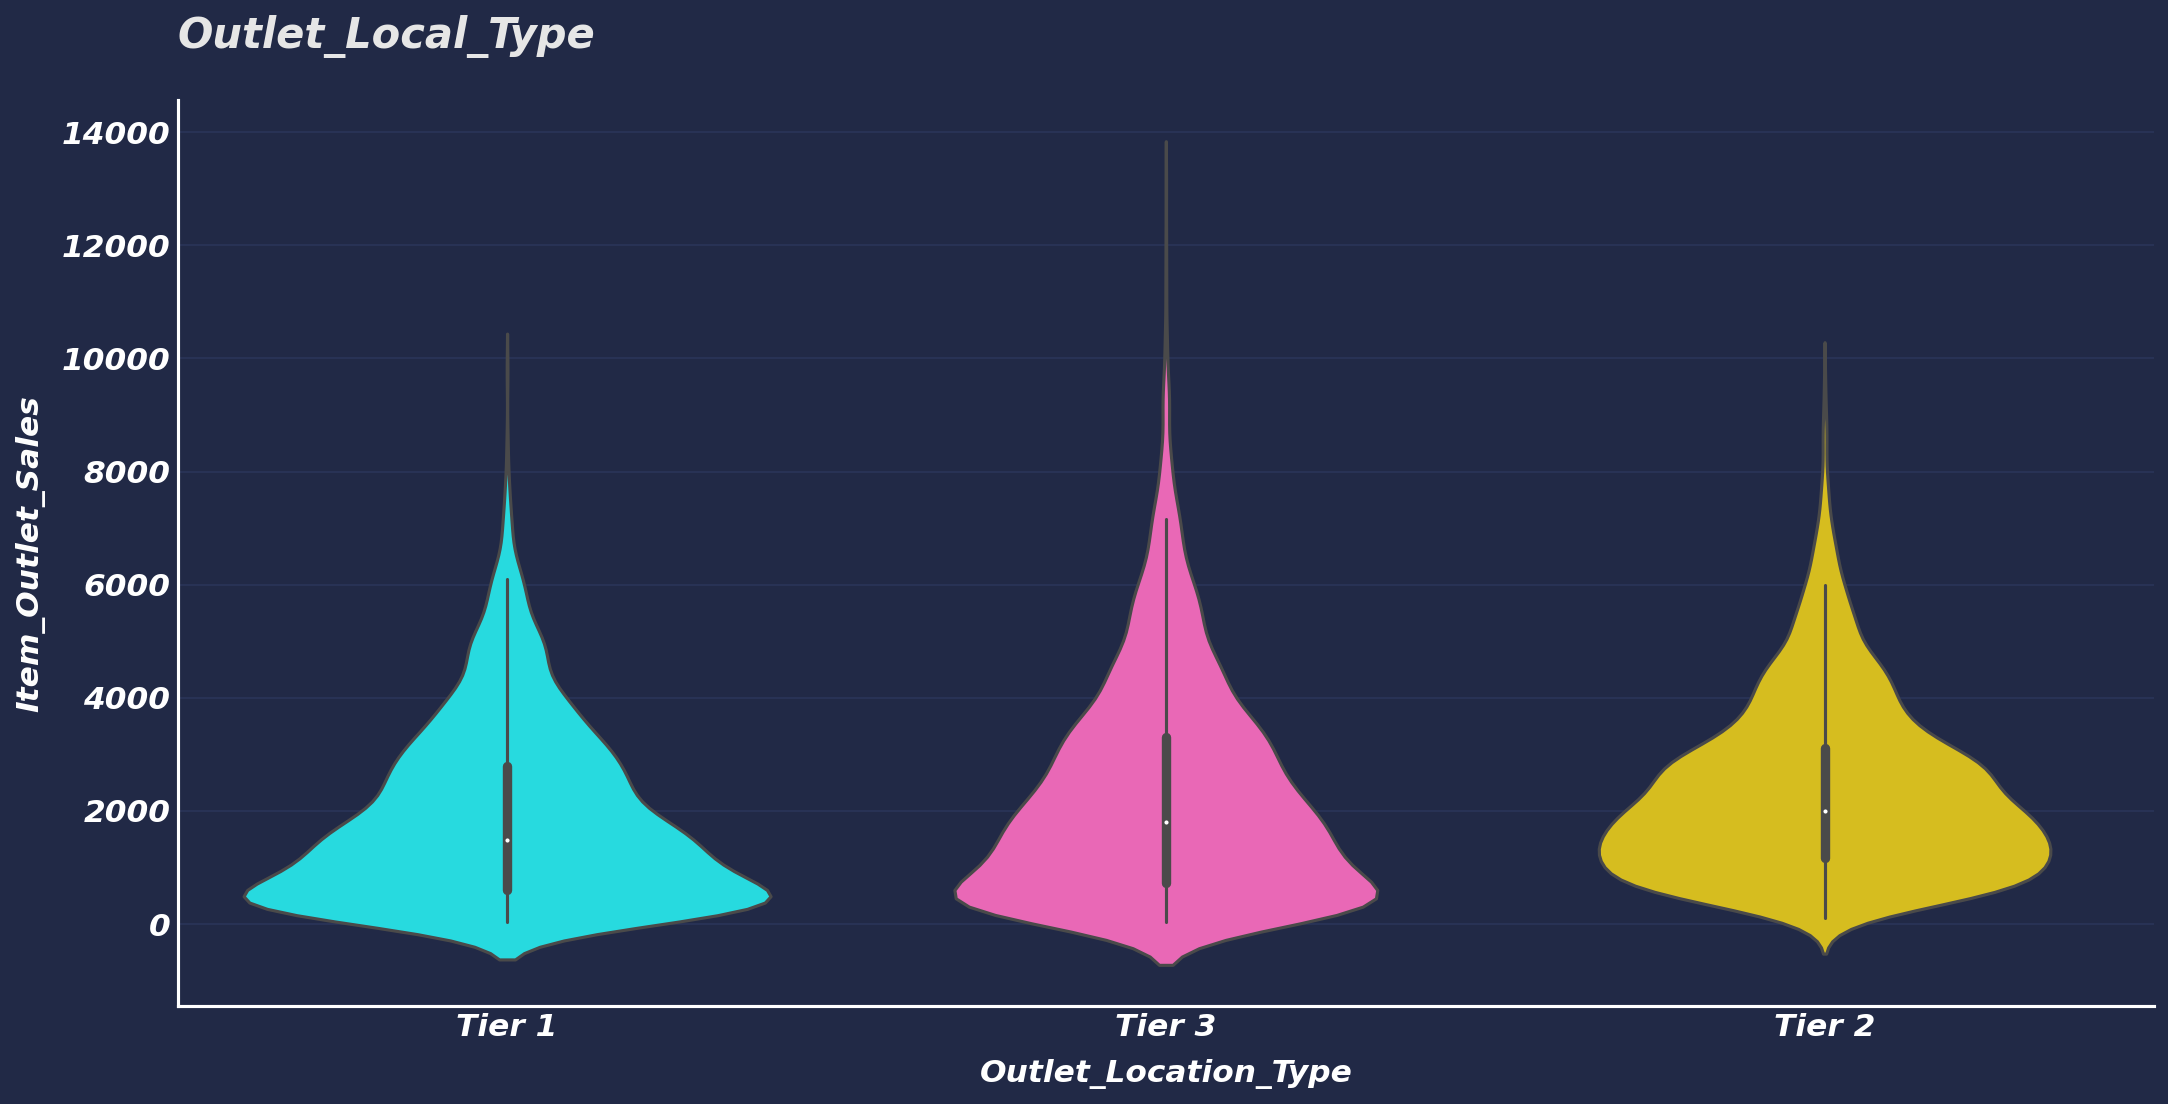

In [65]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_Location_Type, y=train.Item_Outlet_Sales) 
plt.title("Outlet_Local_Type") 

In [ ]:
#Outlet_Type


Outlet_Type
Supermarket Type1     0.654347
Grocery Store         0.127068
Supermarket Type3     0.109703
Supermarket Type2     0.108882

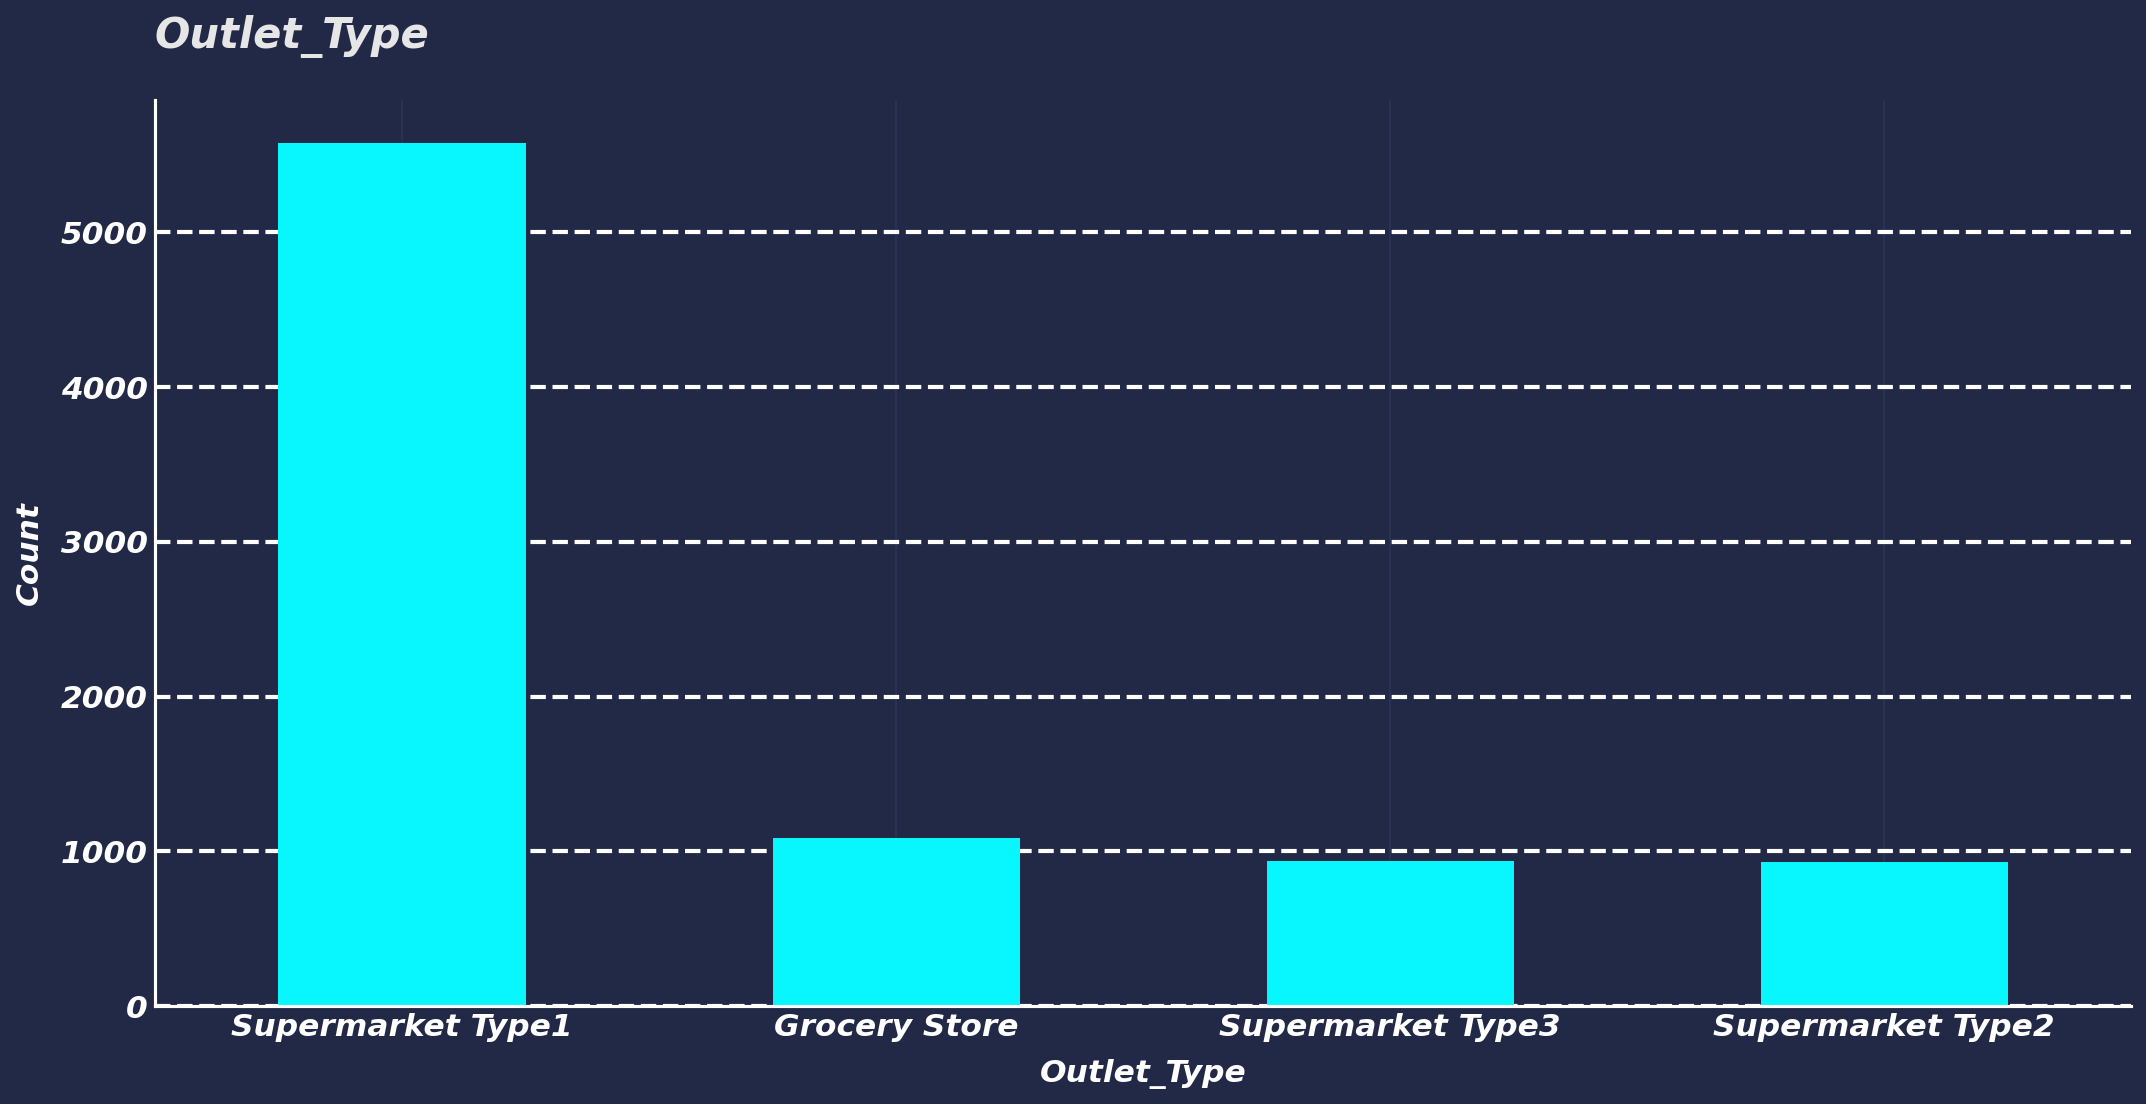

In [68]:

#plot Outlet_Type

train.Outlet_Type.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Outlet_Type")
plt.xticks(rotation=0)
plt.xlabel("Outlet_Type")
plt.ylabel("Count")

train.Outlet_Type.value_counts(normalize=True).to_frame()

In [69]:
train.groupby("Outlet_Type")["Item_Outlet_Sales"].describe() 

count  ...         max
Outlet_Type                ...            
Grocery Store      1083.0  ...   1775.6886
Supermarket Type1  5577.0  ...  10256.6490
Supermarket Type2   928.0  ...   6768.5228
Supermarket Type3   935.0  ...  13086.9648

[4 rows x 8 columns]

Text(0.0, 1.0, 'Outlet_Local_Type')

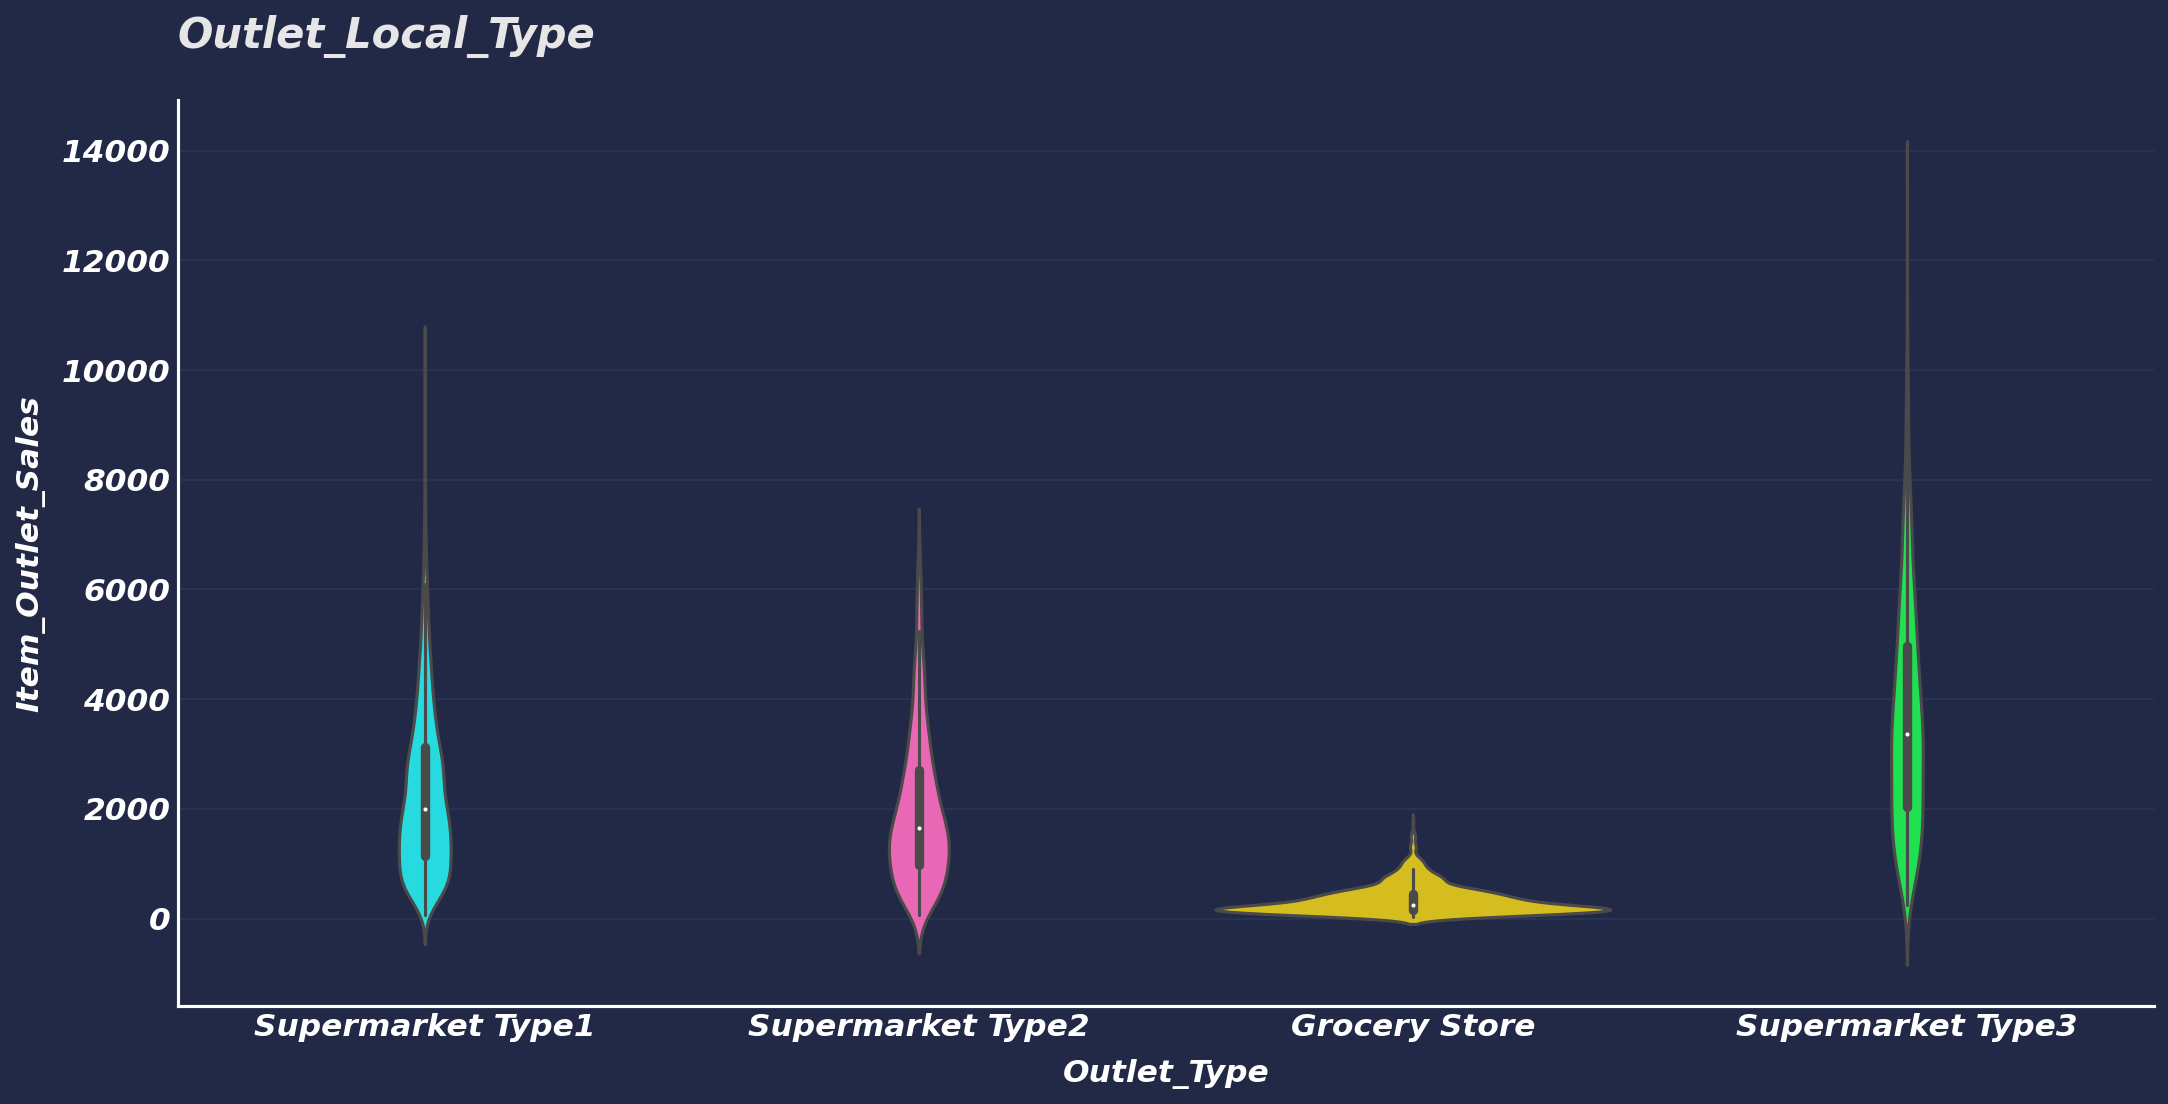

In [70]:
plt.figure(figsize=(17,8))

sns.violinplot(x=train.Outlet_Type, y=train.Item_Outlet_Sales) 
plt.title("Outlet_Local_Type") 

In [ ]:
# numerical features

In [71]:
train[number].describe() 

Item_Weight  ...  Outlet_Establishment_Year
count  7060.000000  ...                8523.000000
mean     12.857645  ...                1997.831867
std       4.643456  ...                   8.371760
min       4.555000  ...                1985.000000
25%       8.773750  ...                1987.000000
50%      12.600000  ...                1999.000000
75%      16.850000  ...                2004.000000
max      21.350000  ...                2009.000000

[8 rows x 4 columns]

In [ ]:
# item weight

In [75]:
#plot pdf 

plt.figure(figsize=(17, 8)) 

sns.distplot(train.Item_Weight, kde_kws={"color": "red","linewidth":3}) 
plt.title("Item_weight") 

print(f"skew: {train.Item_Weight.skew() }") 
print(f"Kurt: {train.Item_Weight.kurt() }") 

skew: 0.0824262091221237
Kurt: -1.2277664144376634


Text(0.0, 1.0, 'correlation item_weight & target')

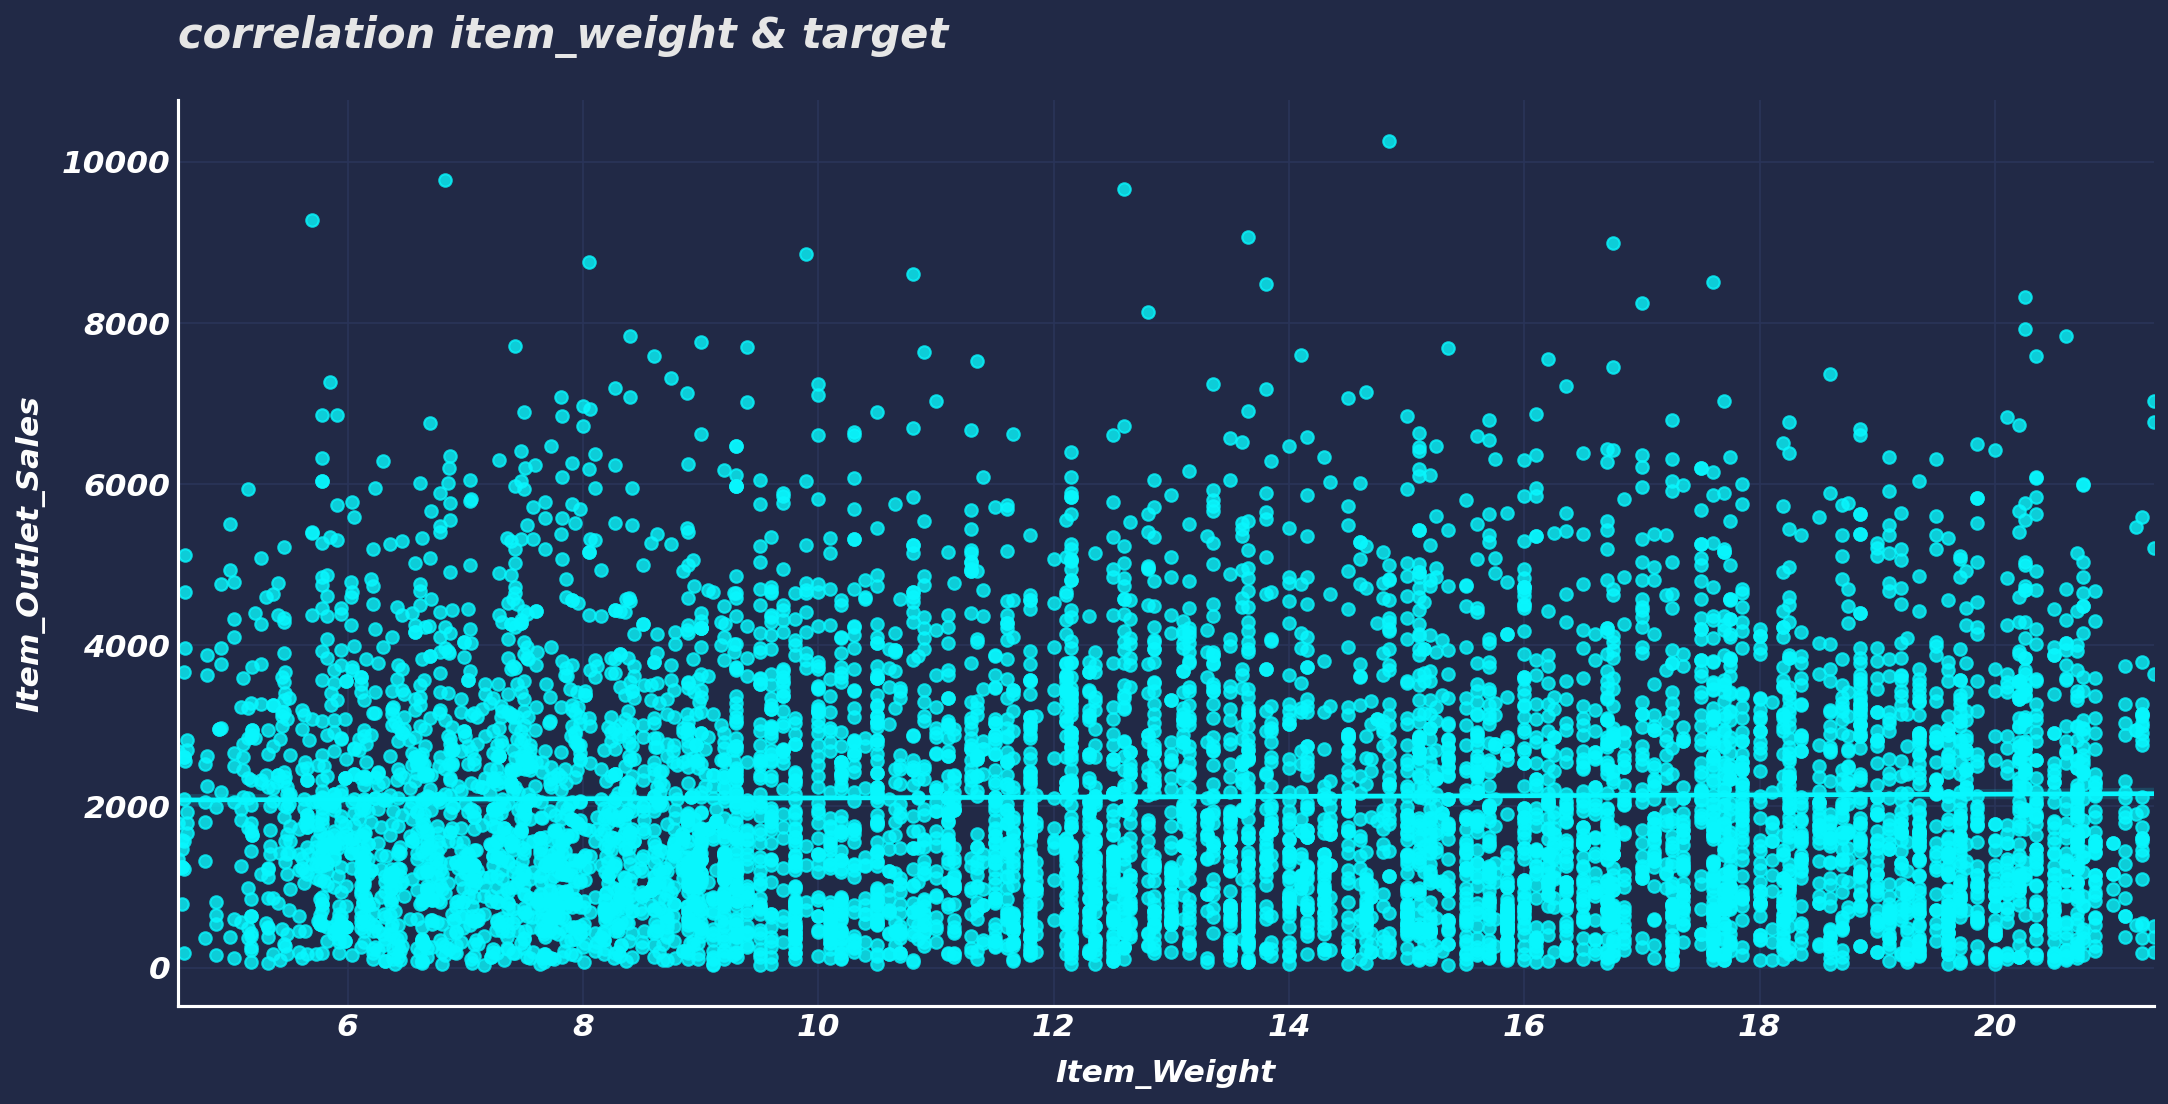

In [77]:
# check correlation 

plt.figure(figsize=(17, 8)) 
sns.regplot(x=train.Item_Weight, y=train.Item_Outlet_Sales) 
plt.title("correlation item_weight & target") 

In [99]:
cek = train.groupby("Item_Identifier")["Item_Outlet_Sales"].describe() 

In [100]:
cek

count  ...        max
Item_Identifier         ...           
DRA12              6.0  ...  3829.0158
DRA24              7.0  ...  4913.6040
DRA59              8.0  ...  7033.5112
DRB01              3.0  ...  2466.7890
DRB13              5.0  ...  3605.3070
...                ...  ...        ...
NCZ30              7.0  ...  3374.2744
NCZ41              5.0  ...  2503.4080
NCZ42              5.0  ...  5451.5704
NCZ53              5.0  ...  5652.6420
NCZ54              7.0  ...  7148.0288

[1559 rows x 8 columns]

In [24]:
# fillna dari rata² item weight berdasarkan  item_identifiers and median

for i in [train, test]: 
    i["Item_Weight"].fillna(train.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)
    i["Item_Weight"].fillna(train.Item_Weight.median(), inplace=True) 

skew: 0.07040015886369196
Kurt: -1.2298354290556115


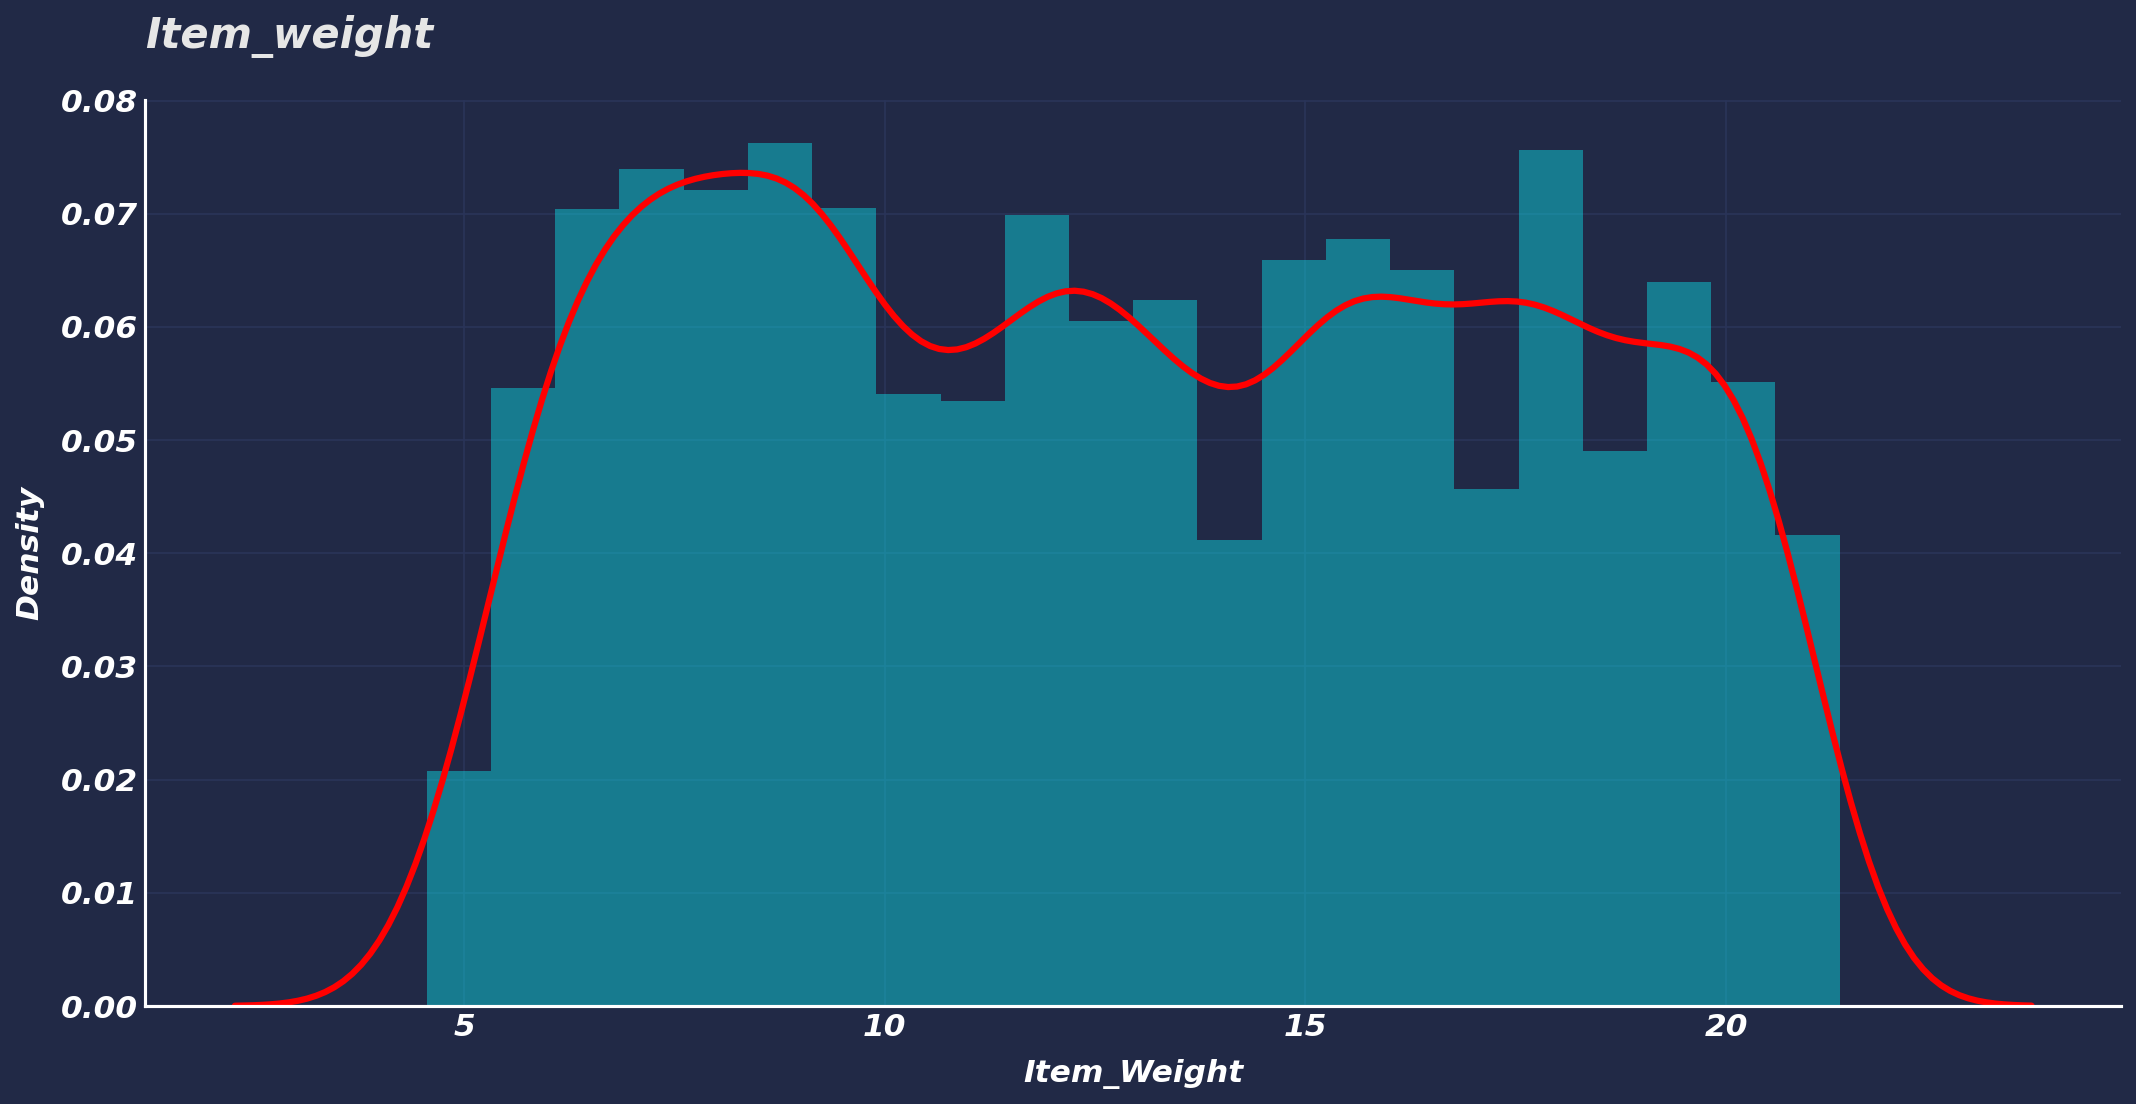

In [27]:
#plot pdf, after fillna 

plt.figure(figsize=(17, 8)) 

sns.distplot(train.Item_Weight, kde_kws={"color": "red","linewidth":3}) 
plt.title("Item_weight") 

print(f"skew: {train.Item_Weight.skew() }") 
print(f"Kurt: {train.Item_Weight.kurt() }") 

In [ ]:
# item visibility

skew: 1.1670905496918407
Kurt: 1.6794454826024245


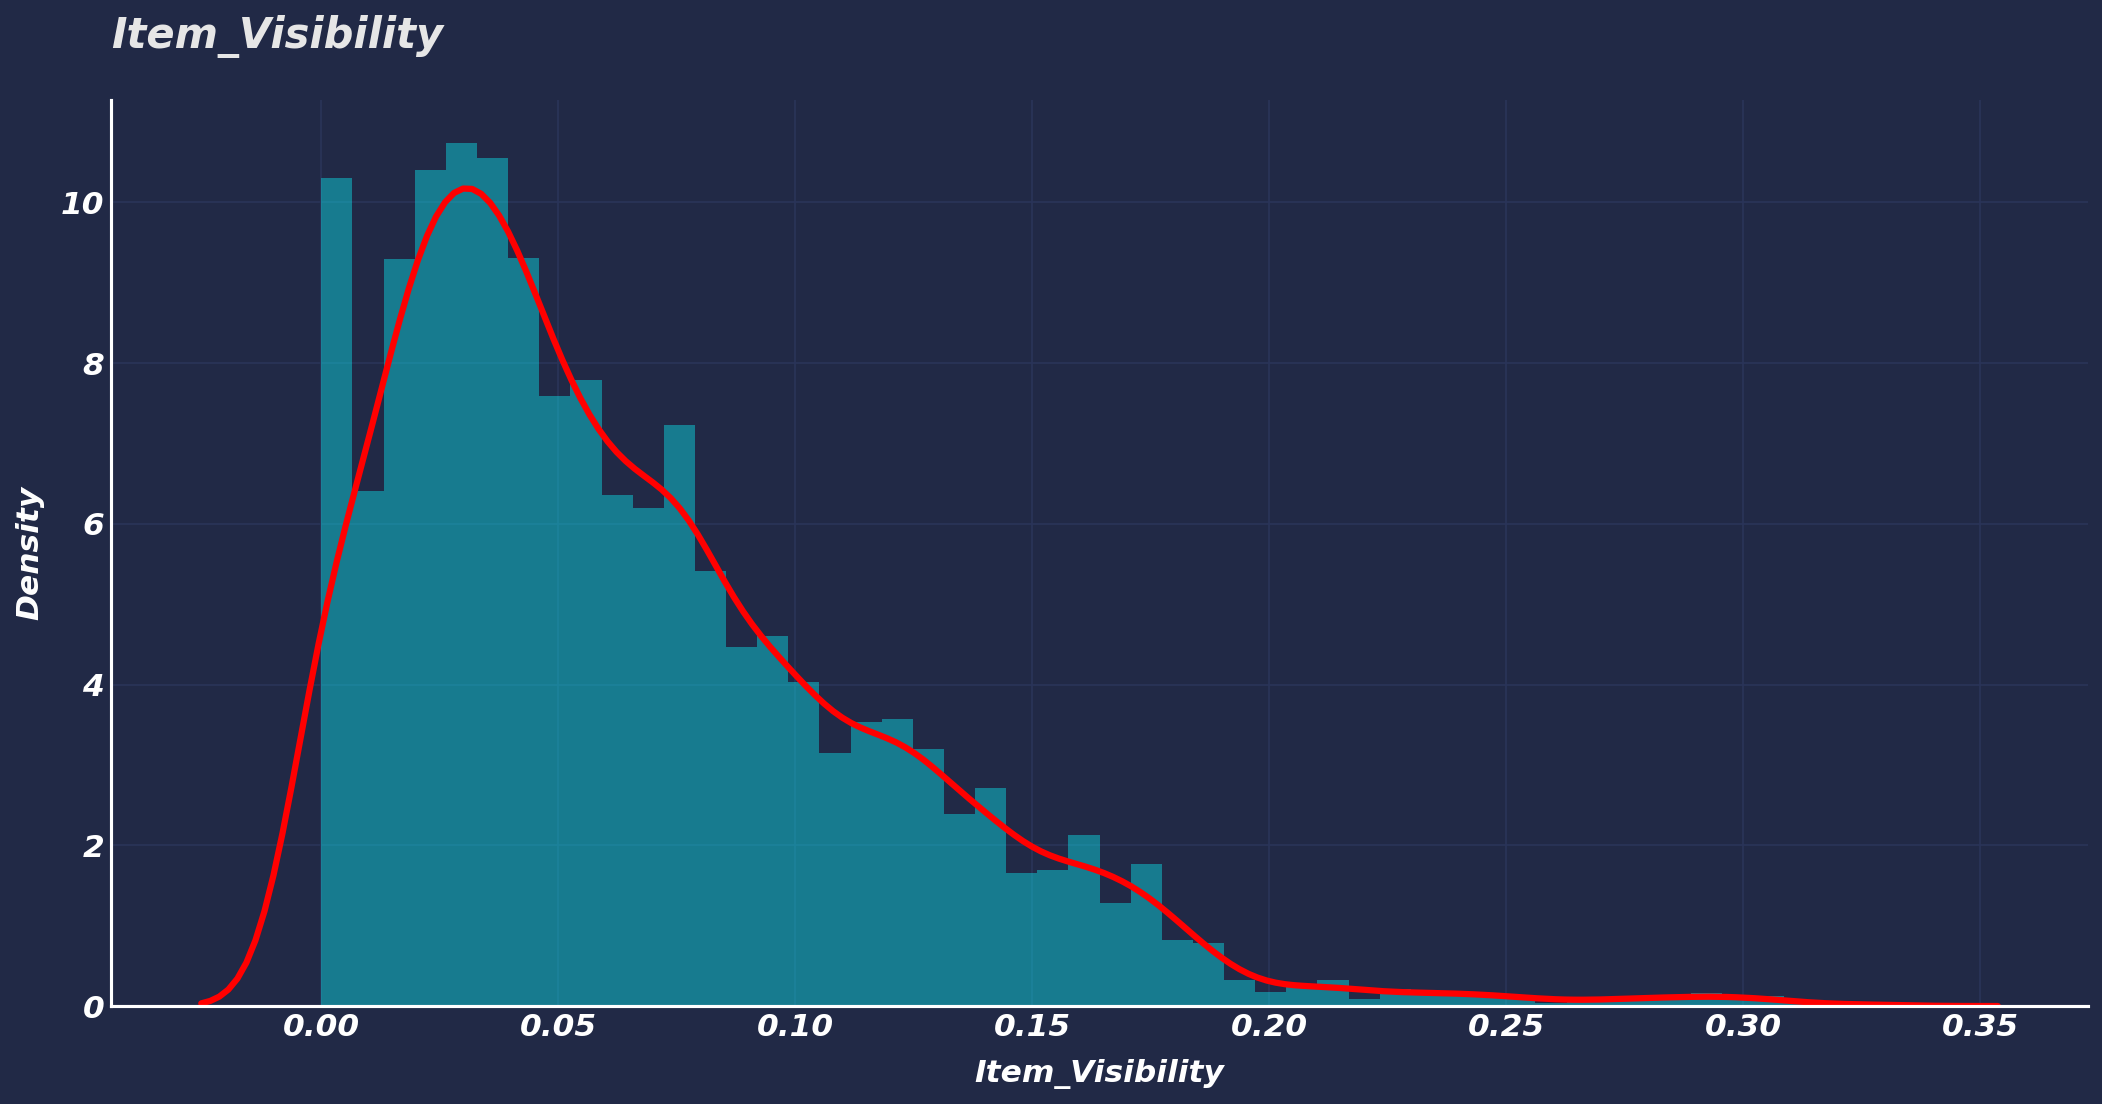

In [29]:
#plot pdf

plt.figure(figsize=(17, 8)) 

sns.distplot(train.Item_Visibility, kde_kws={"color": "red","linewidth":3}) 
plt.title("Item_Visibility") 

print(f"skew: {train.Item_Visibility.skew() }") 
print(f"Kurt: {train.Item_Visibility.kurt() }") 

In [33]:
train.query("Item_Visibility > 0.20").shape

(134, 15)

In [34]:
train.query("Item_Visibility > 0.20").sample(10) 

Item_Identifier  ...  new_Item_Type
7278           FDY32  ...          Foods
6833           NCF30  ...         Others
3993           FDI15  ...         Others
6179           DRA59  ...         Drinks
334            FDC41  ...          Foods
49             FDS02  ...         Others
4006           FDS44  ...          Foods
7603           DRF01  ...         Drinks
3001           FDO25  ...         Others
5891           FDE11  ...          Foods

[10 rows x 15 columns]

Text(0.0, 1.0, 'correlation item_Visibility & target')

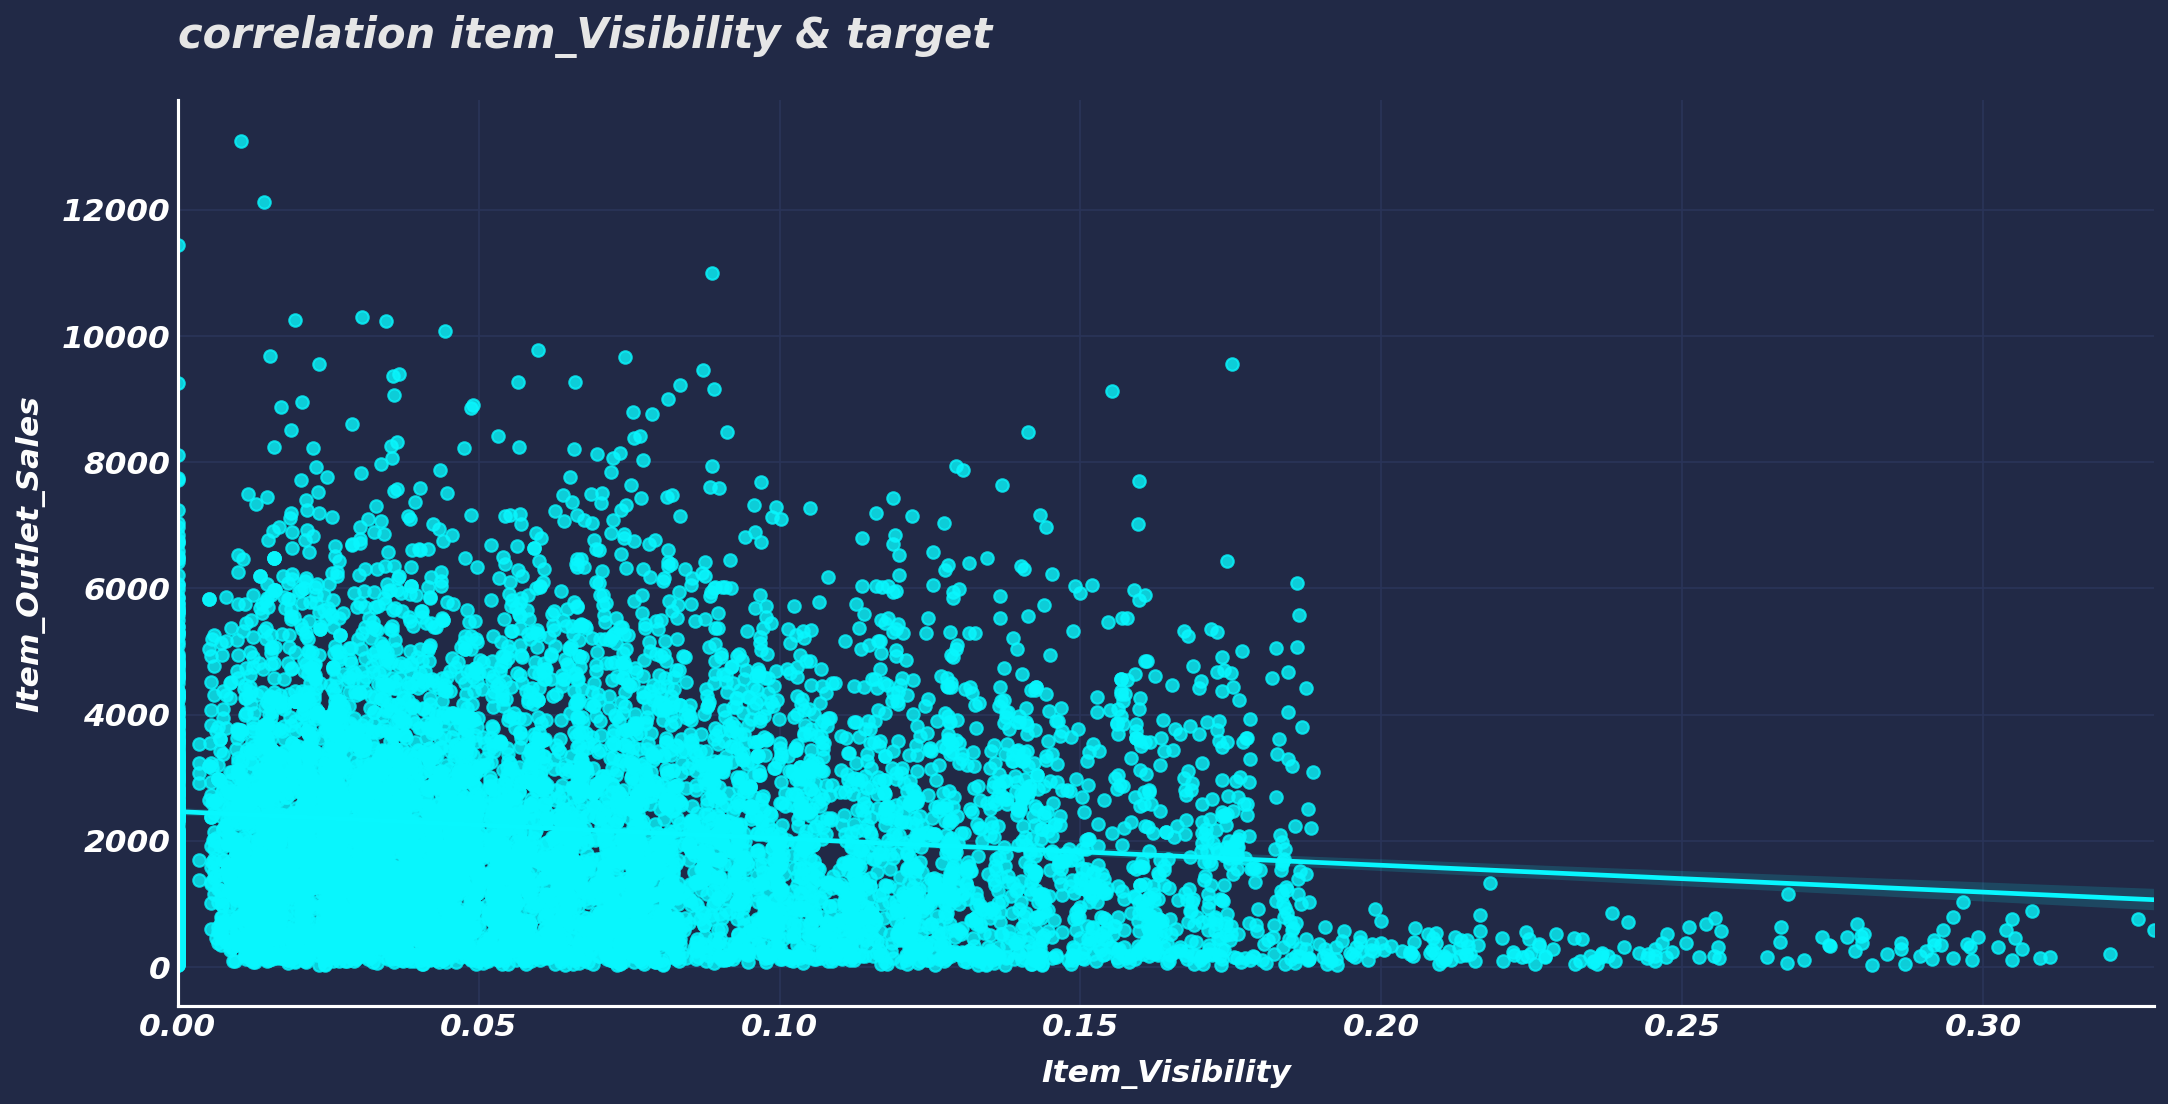

In [30]:
# check correlation 

plt.figure(figsize=(17, 8)) 
sns.regplot(x=train.Item_Visibility, y=train.Item_Outlet_Sales) 
plt.title("correlation item_Visibility & target") 

In [ ]:
# item mrp


skew: 0.1272022683110526
Kurt: -0.8897690936963571


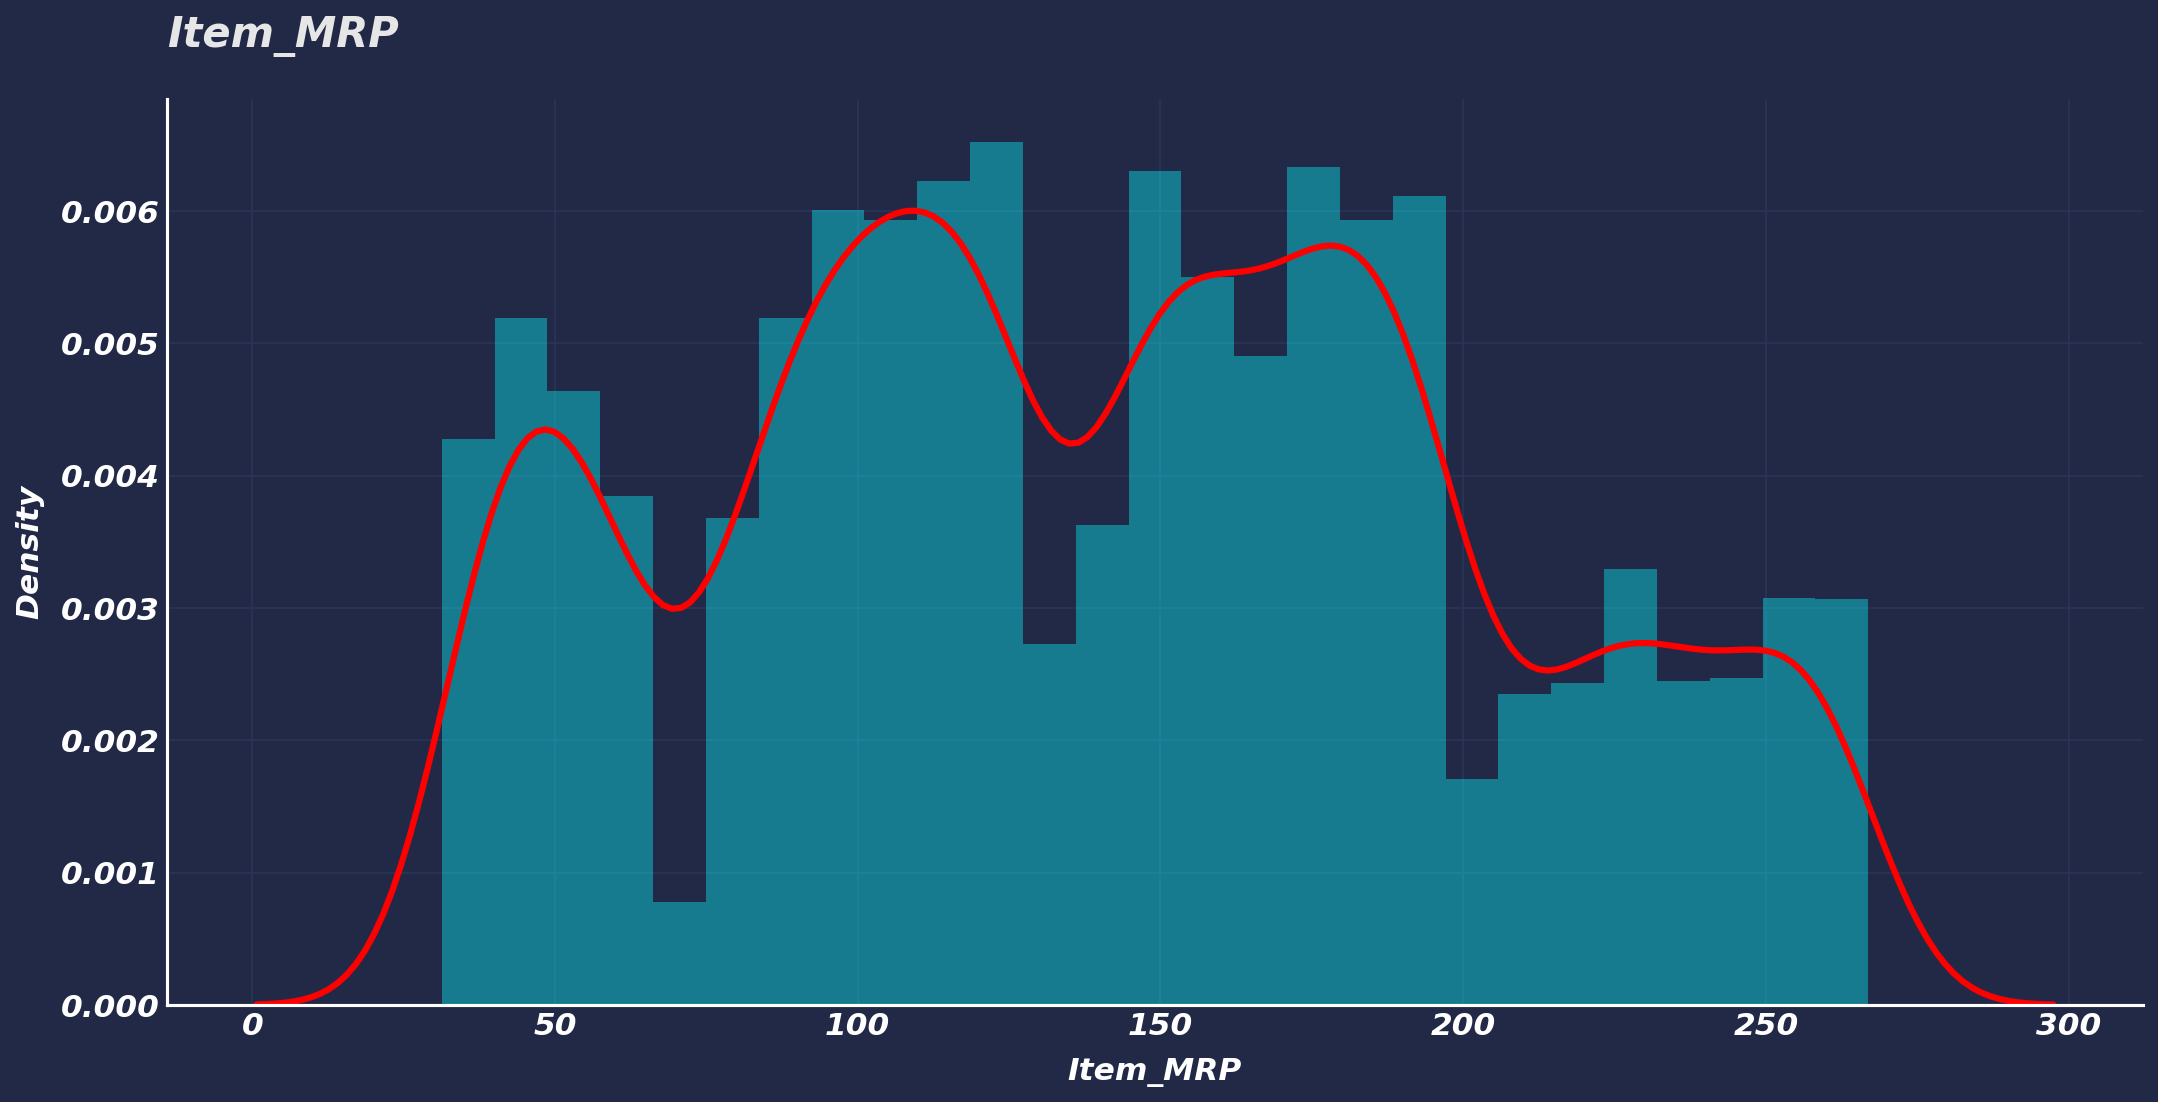

In [35]:
#plot pdf

plt.figure(figsize=(17, 8)) 

sns.distplot(train.Item_MRP, kde_kws={"color": "red","linewidth":3}) 
plt.title("Item_MRP") 

print(f"skew: {train.Item_MRP.skew() }") 
print(f"Kurt: {train.Item_MRP.kurt() }") 

Text(0.0, 1.0, 'correlation item_MRP & target')

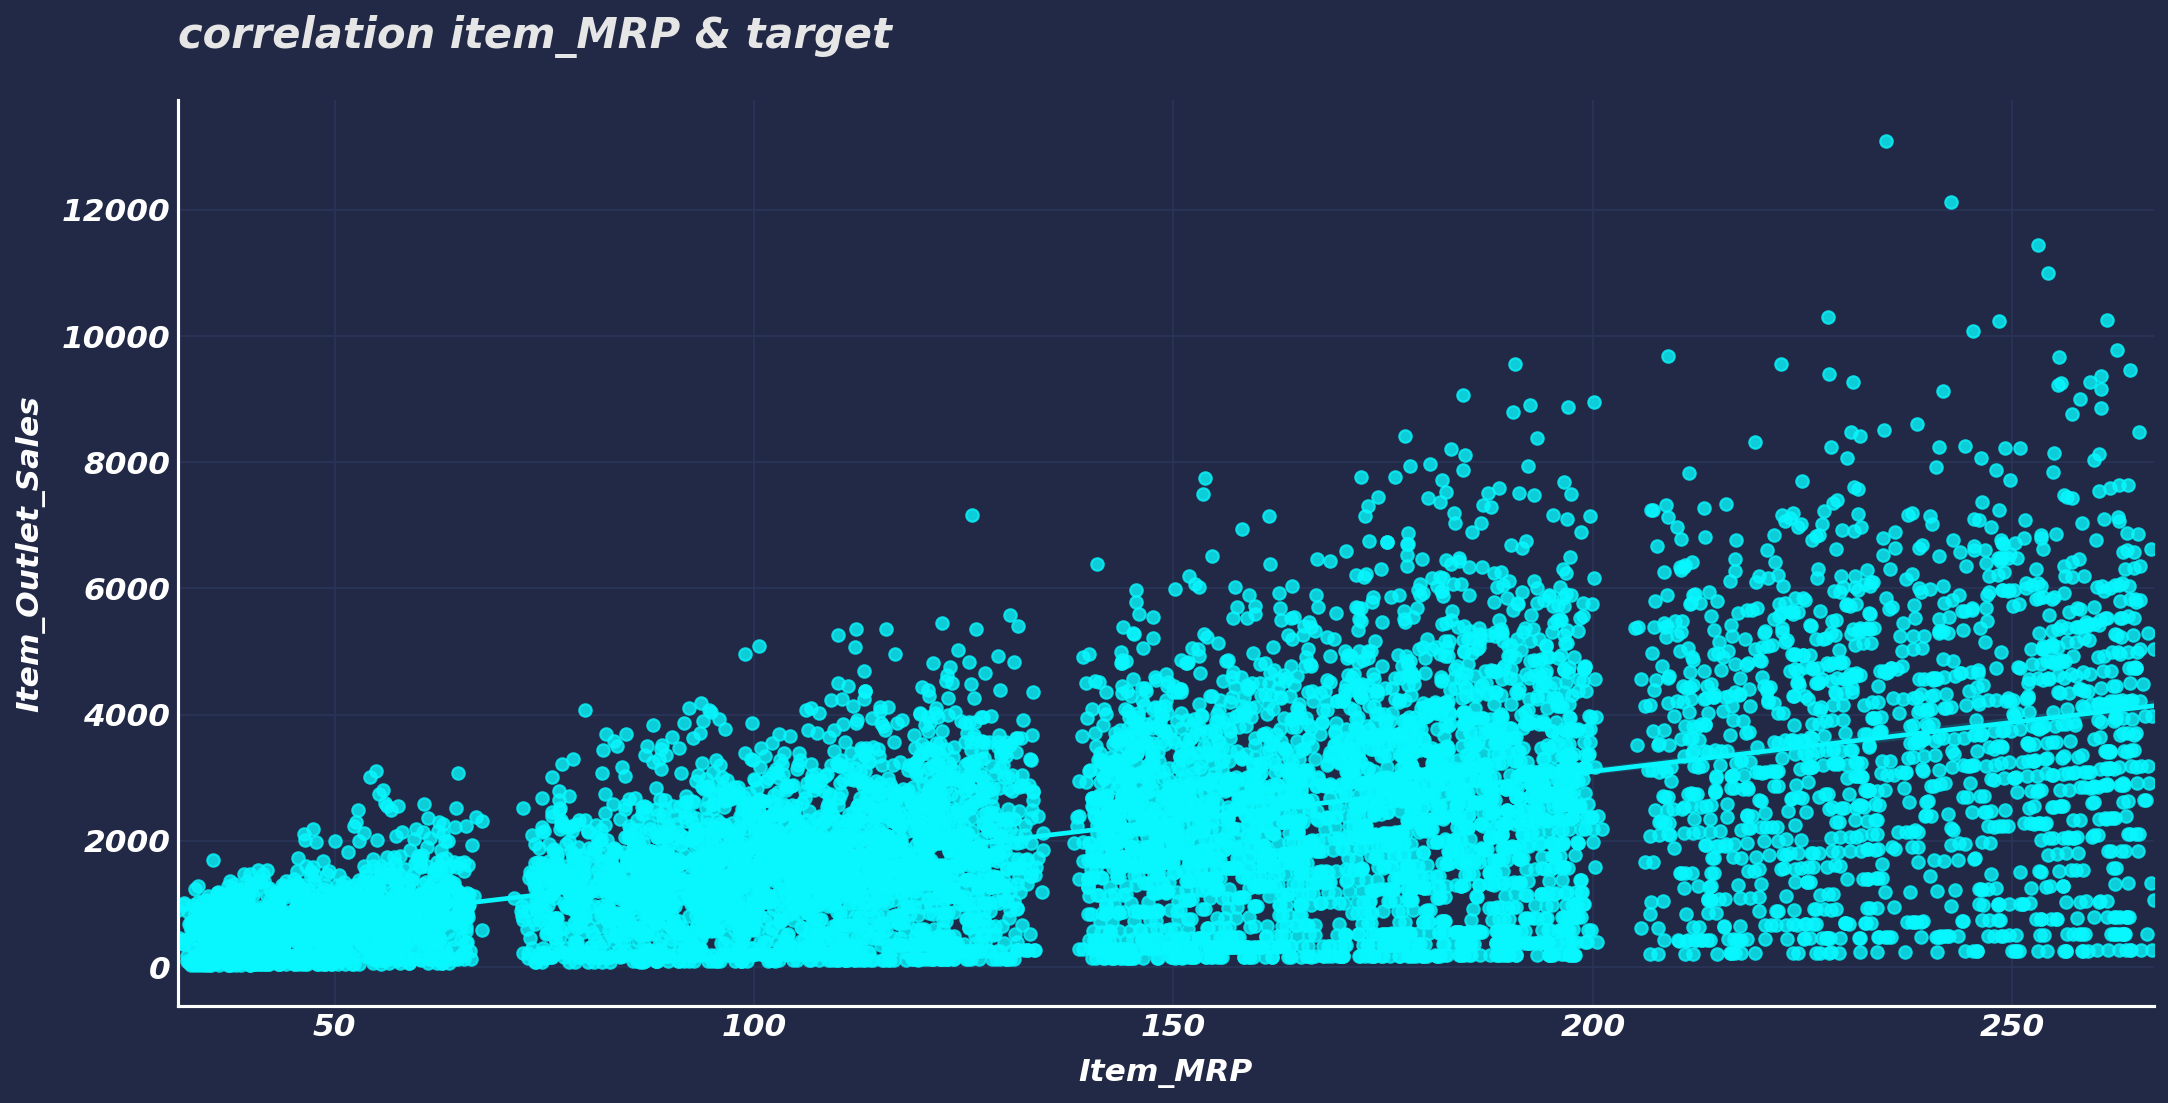

In [36]:
# check correlation 

plt.figure(figsize=(17, 8)) 
sns.regplot(x=train.Item_MRP, y=train.Item_Outlet_Sales) 
plt.title("correlation item_MRP & target") 

In [ ]:
#Outlet_Establishment_Year

In [37]:
train.Outlet_Establishment_Year.value_counts() 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Text(0, 0.5, 'Count')

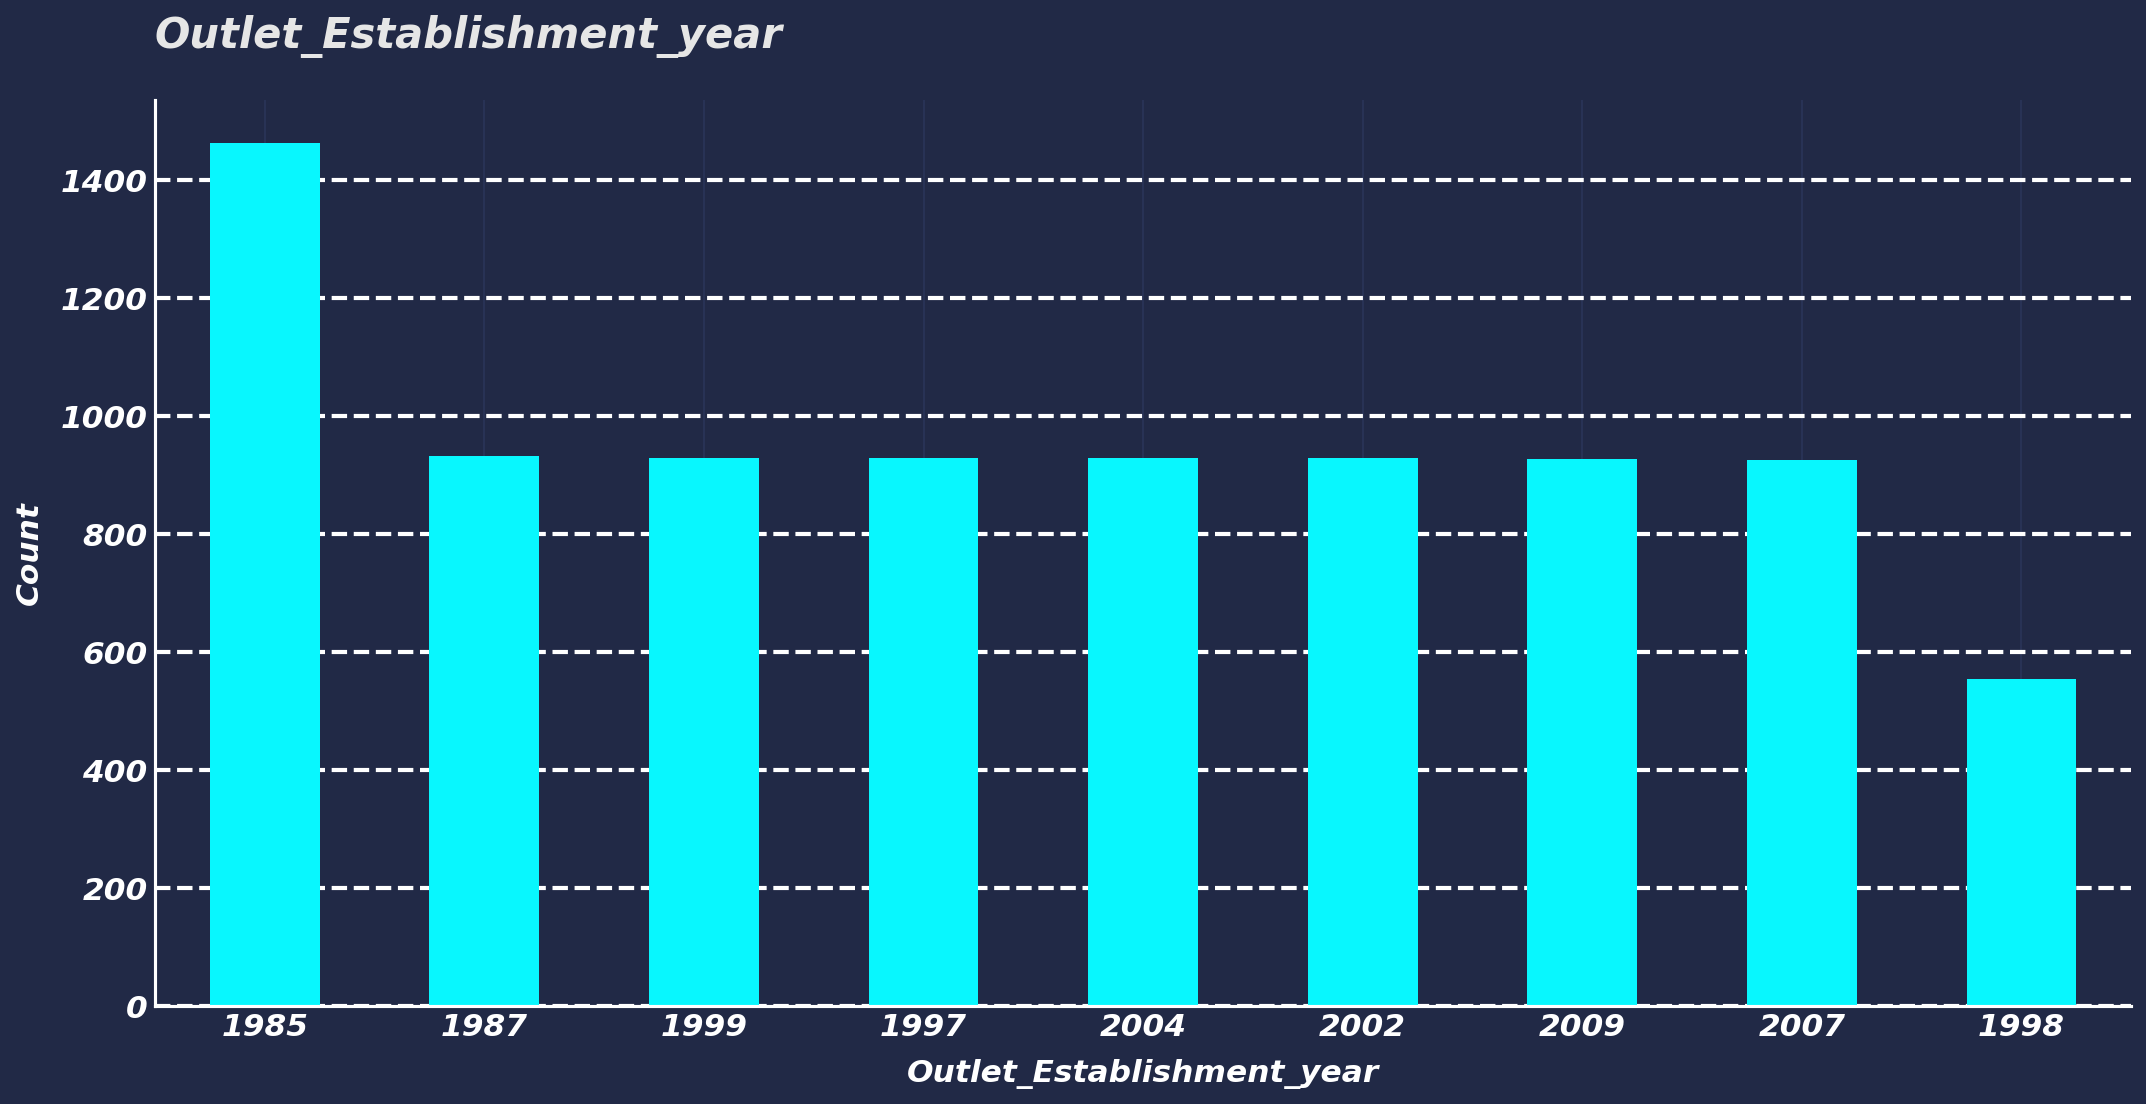

In [47]:
train.Outlet_Establishment_Year.value_counts().plot(kind="bar",figsize=(17, 8))
plt.grid(axis="y", linewidth=2, linestyle="--", color="white")
plt.title("Outlet_Establishment_year")
plt.xticks(rotation=0)
plt.xlabel("Outlet_Establishment_year")
plt.ylabel("Count")


In [38]:
train.Outlet_Establishment_Year.astype("object").describe() 

count     8523
unique       9
top       1985
freq      1463
Name: Outlet_Establishment_Year, dtype: int64

Text(0.0, 1.0, 'Year')

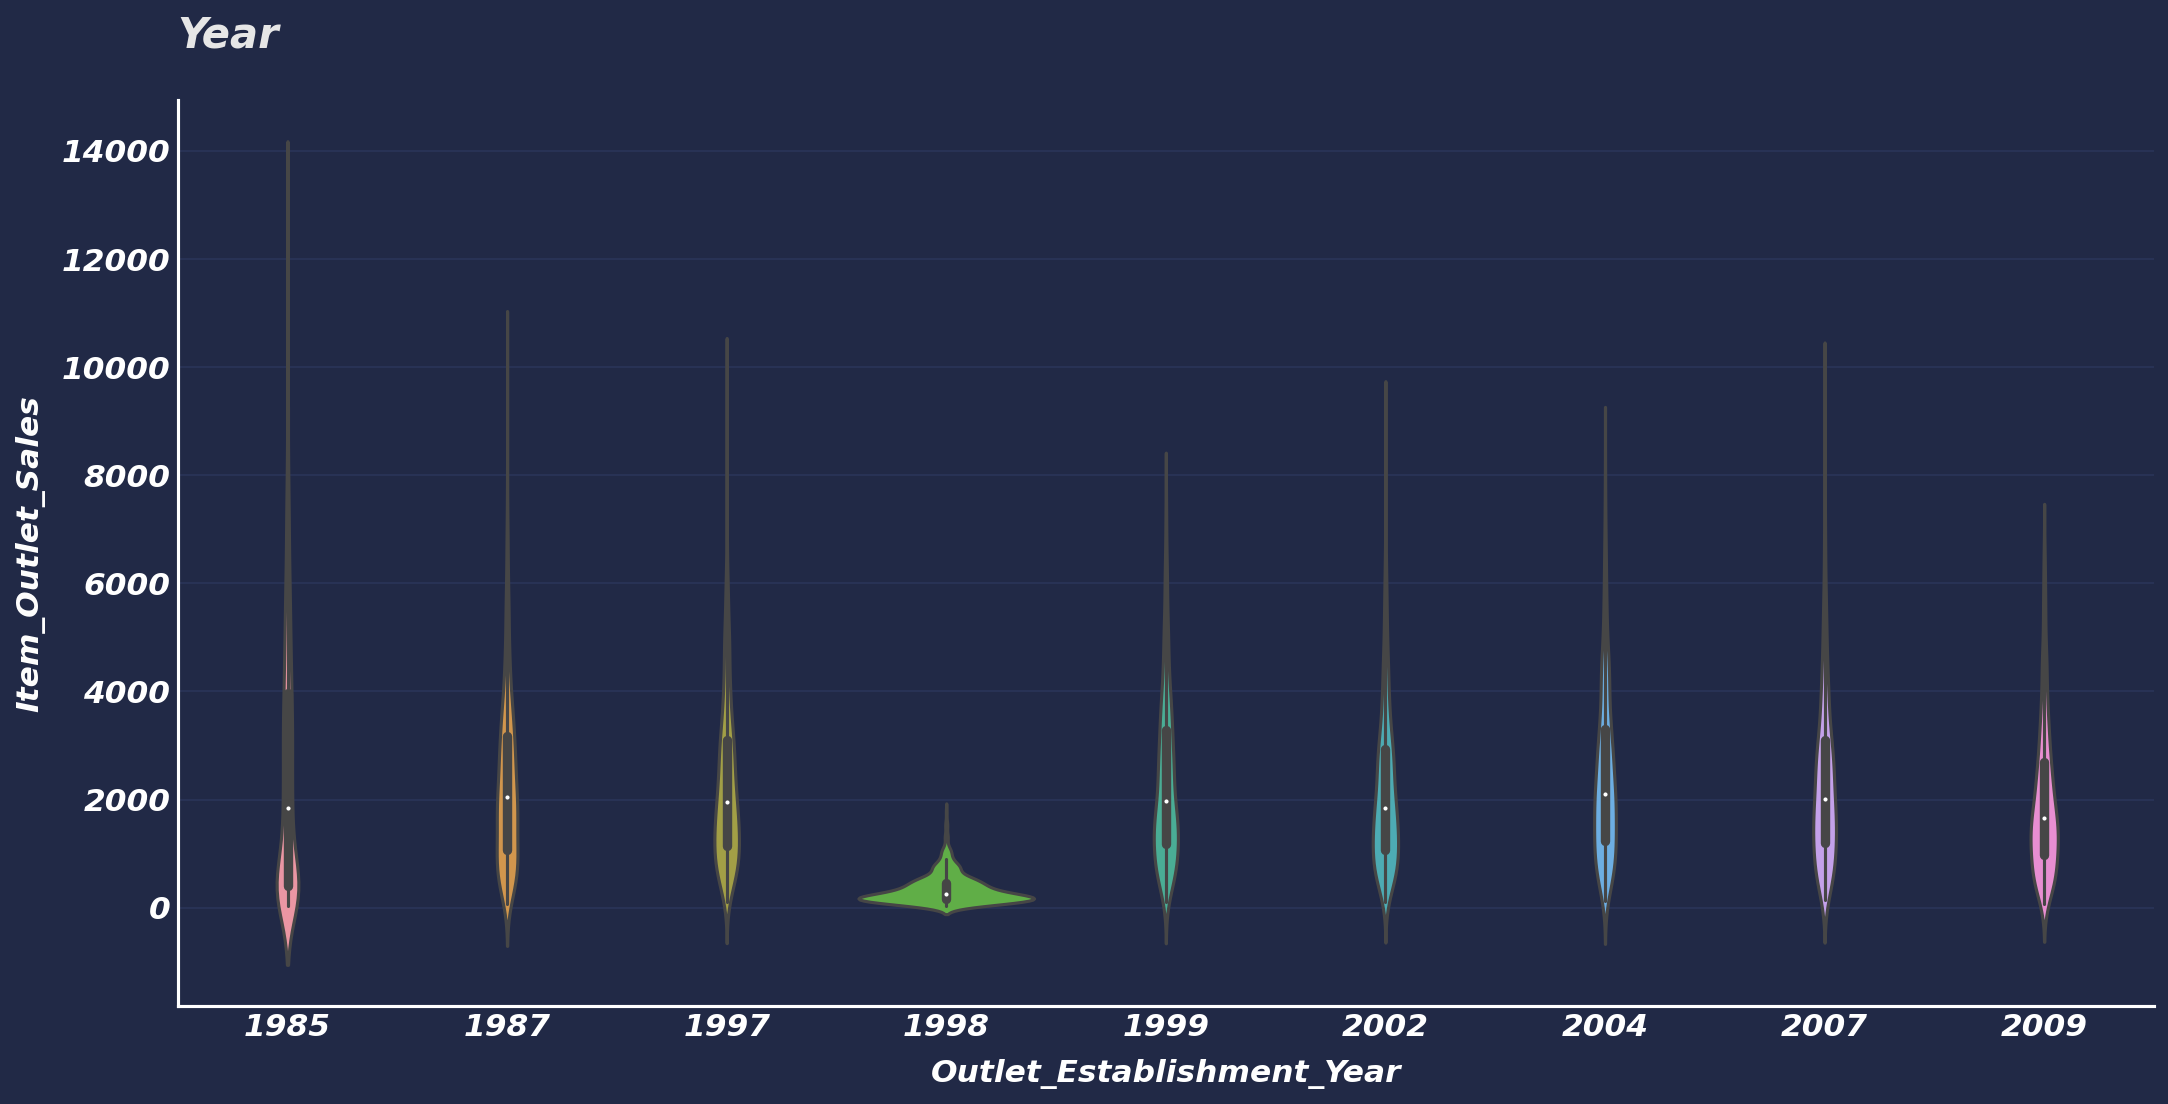

In [49]:
plt.figure(figsize=(17,8))

sns.violinplot(x = train.Outlet_Establishment_Year, y=train.Item_Outlet_Sales) 
plt.title("Year") 

In [39]:
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                             2483.677474
1987                             2298.995256
1997                             2277.844267
1998                              339.351662
1999                             2348.354635
2002                             2192.384798
2004                             2438.841866
2007                             2340.675263
2009                             1995.498739

In [40]:
train.query("Outlet_Establishment_Year == 1998") 

Item_Identifier  ...  new_Item_Type
3              FDX07  ...          Foods
28             FDE51  ...         Others
30             FDV38  ...         Others
45             FDM39  ...         Others
65             FDC46  ...          Foods
...              ...  ...            ...
8400           NCE07  ...         Others
8432           FDI16  ...          Foods
8473           DRI47  ...         Drinks
8486           FDR20  ...          Foods
8509           FDG45  ...          Foods

[555 rows x 15 columns]

In [41]:
year = train.Outlet_Establishment_Year.apply(lambda x: ">2000" if x >= 2002 else "<2000") 

In [42]:
year.describe()

count      8523
unique        2
top       <2000
freq       4810
Name: Outlet_Establishment_Year, dtype: object

In [43]:
train.groupby(year)["Item_Outlet_Sales"].mean().to_frame()

Item_Outlet_Sales
Outlet_Establishment_Year                   
<2000                            2134.509121
>2000                            2241.889722

Text(0.0, 1.0, 'Year')

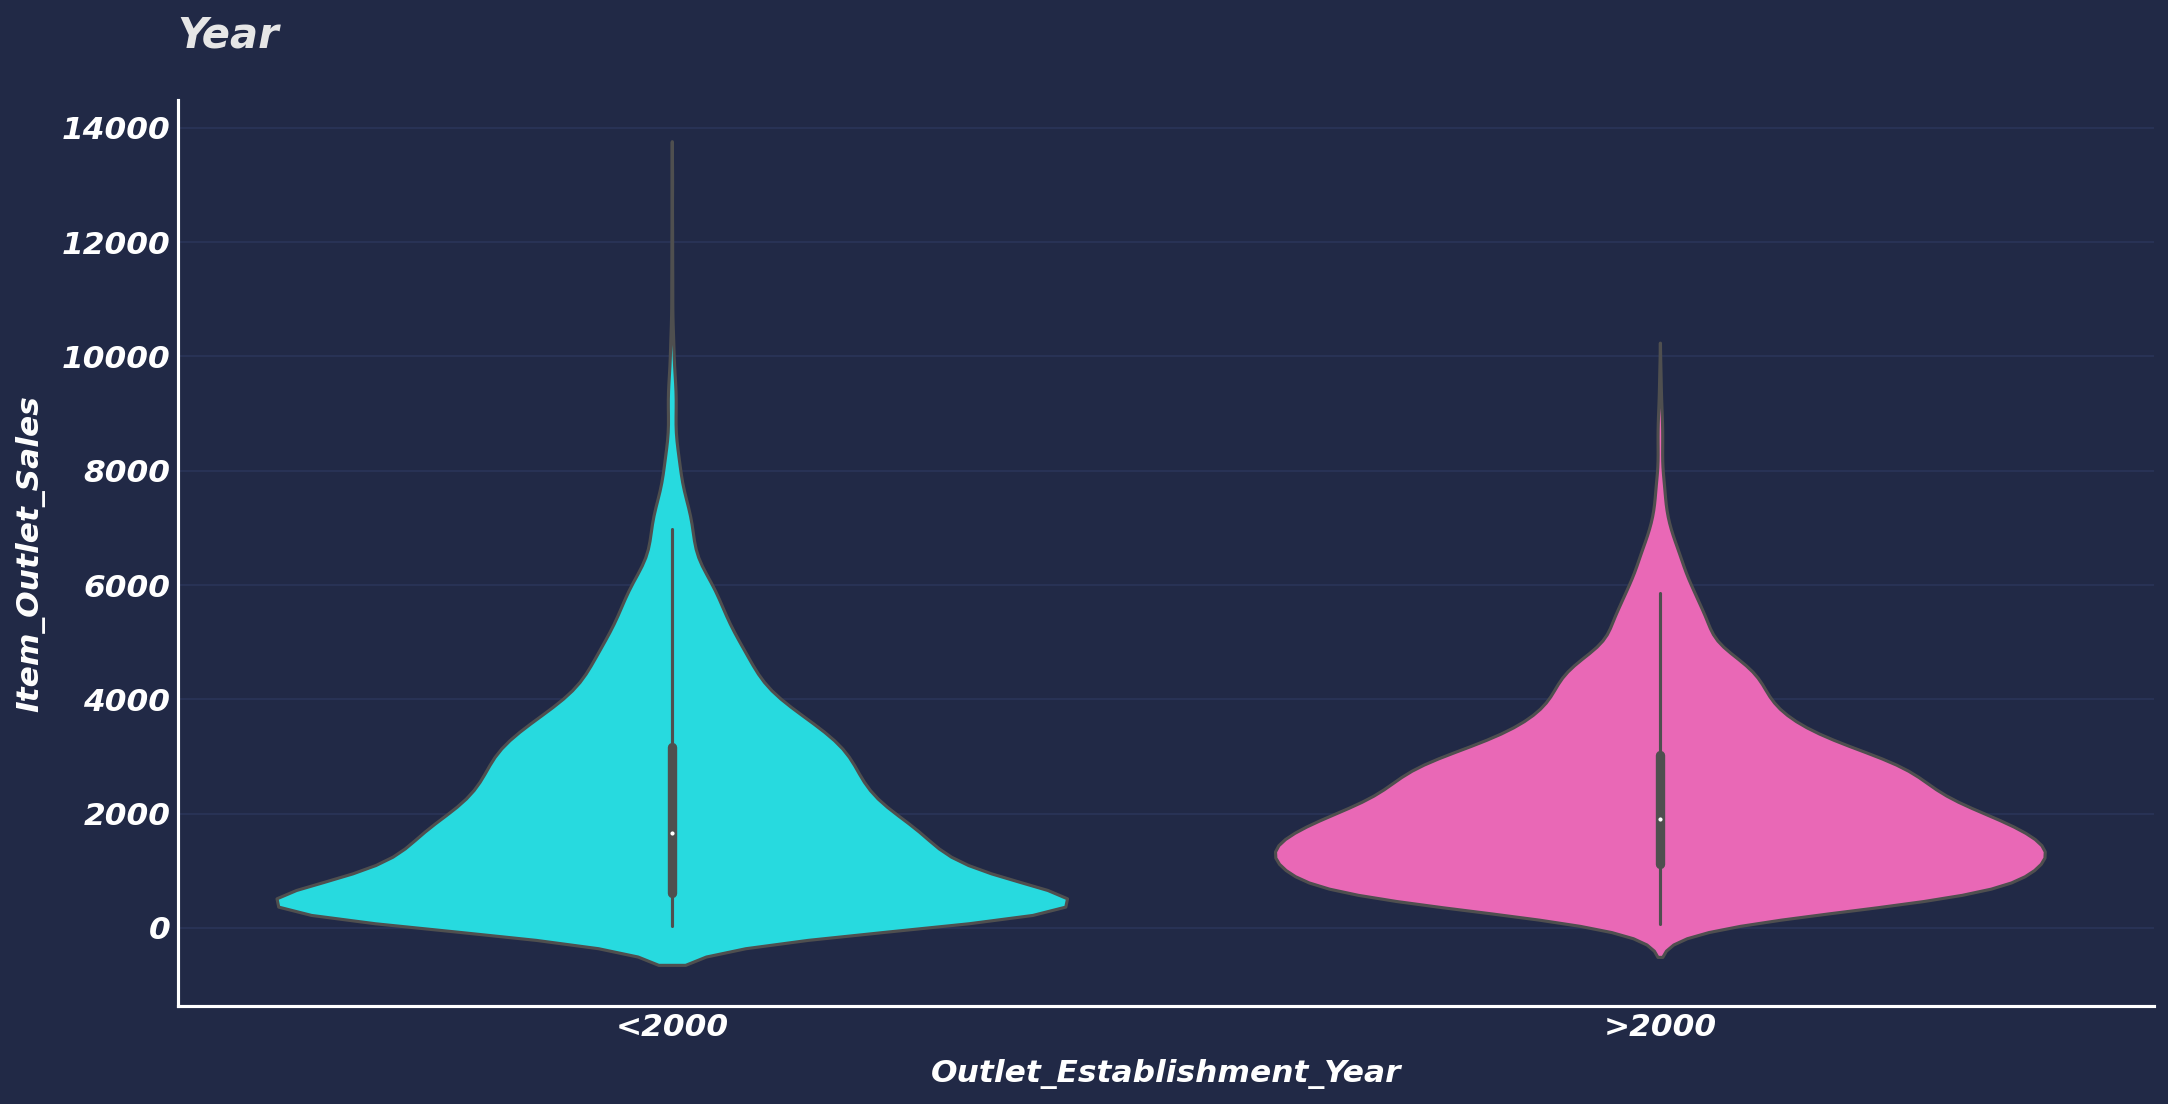

In [48]:
plt.figure(figsize=(17,8))

sns.violinplot(year, y=train.Item_Outlet_Sales) 
plt.title("Year") 

## Multivariat analysis & Feature Engineering

In [50]:
train.head()

Item_Identifier  ...  new_Item_Type
0           FDA15  ...         Others
1           DRC01  ...         Drinks
2           FDN15  ...          Foods
3           FDX07  ...          Foods
4           NCD19  ...         Others

[5 rows x 15 columns]

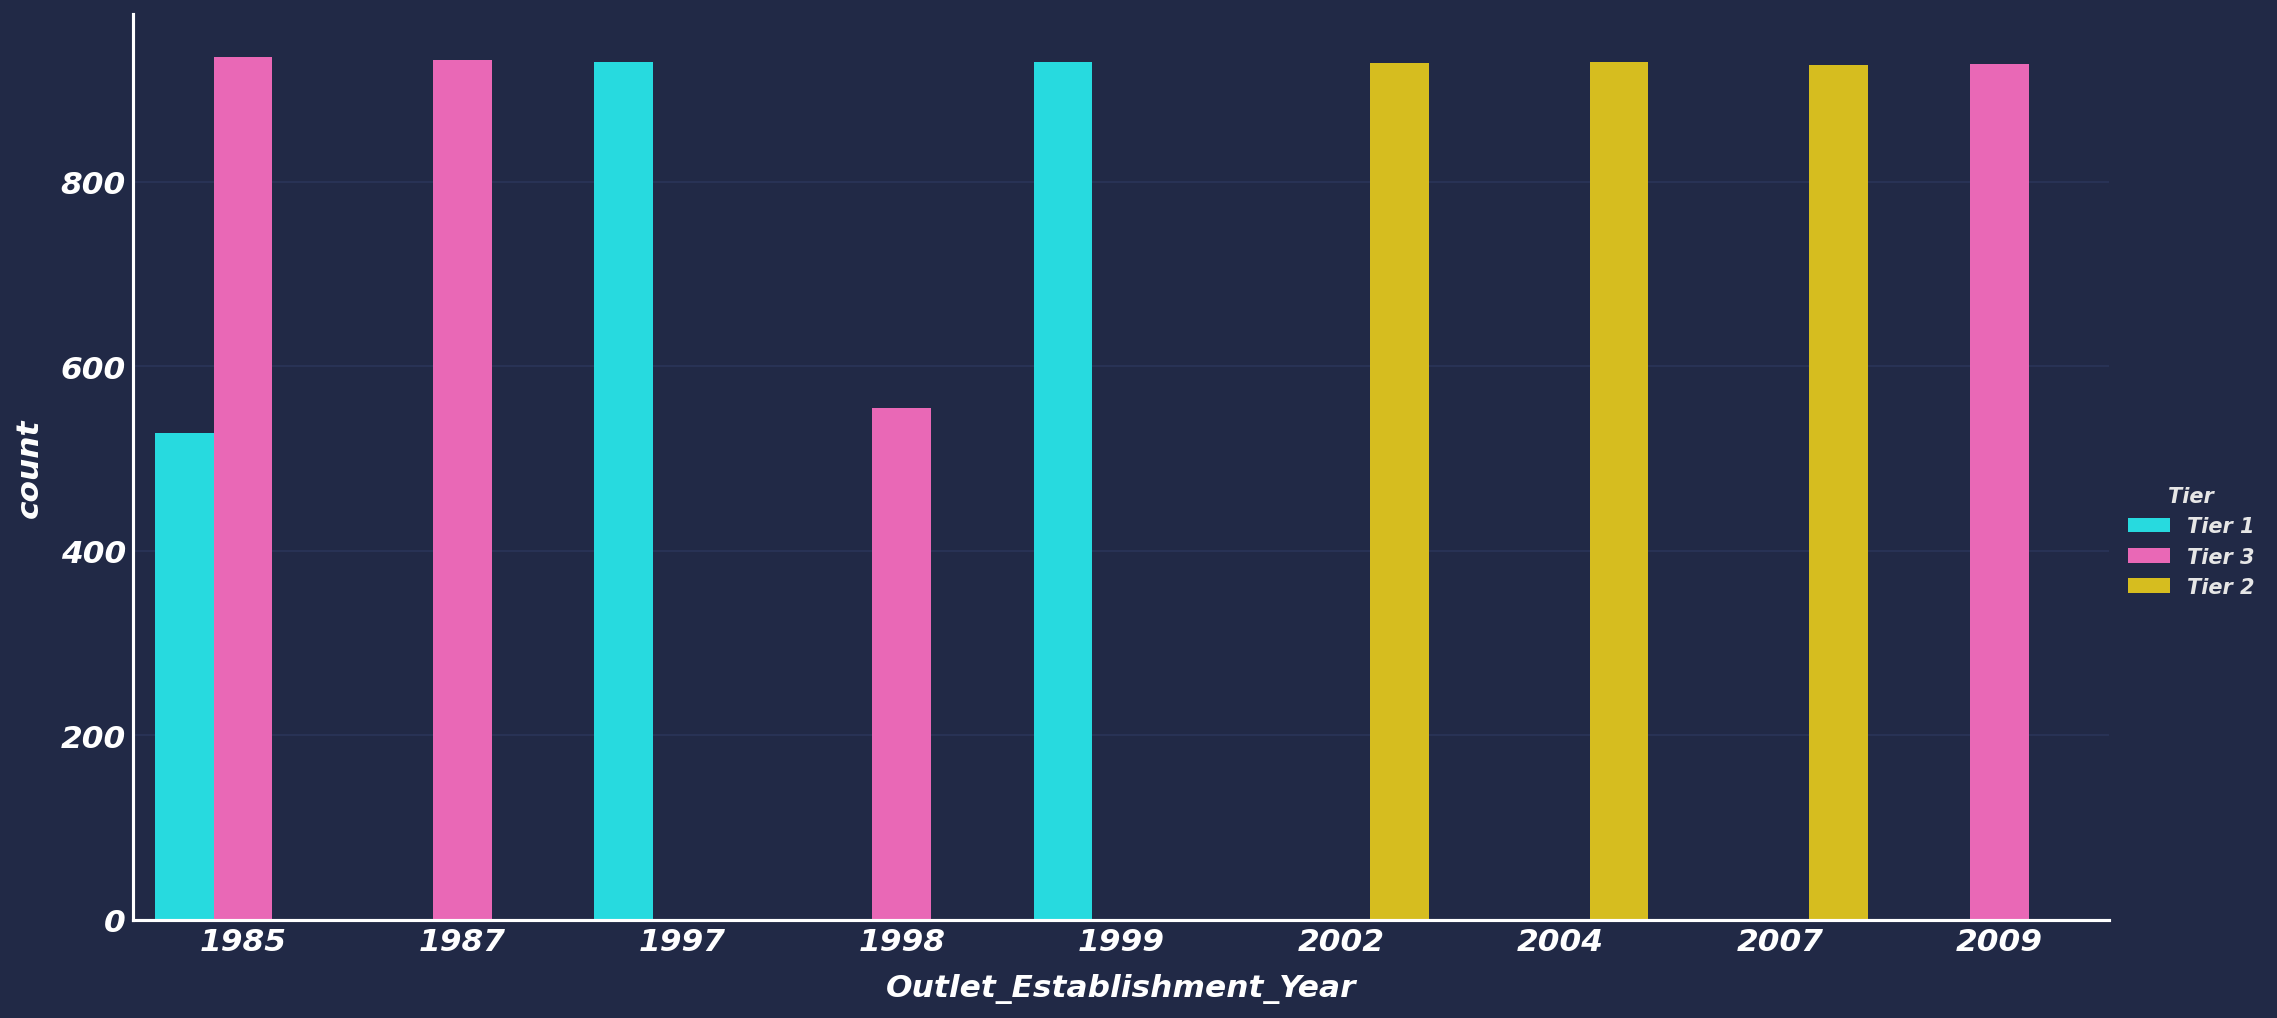

In [60]:
plt.figure(figsize=(17,8))

sns.countplot(x = train.Outlet_Establishment_Year,hue=train.Outlet_Location_Type)
plt.legend(title="Tier", bbox_to_anchor=(1.0,0.5)) 

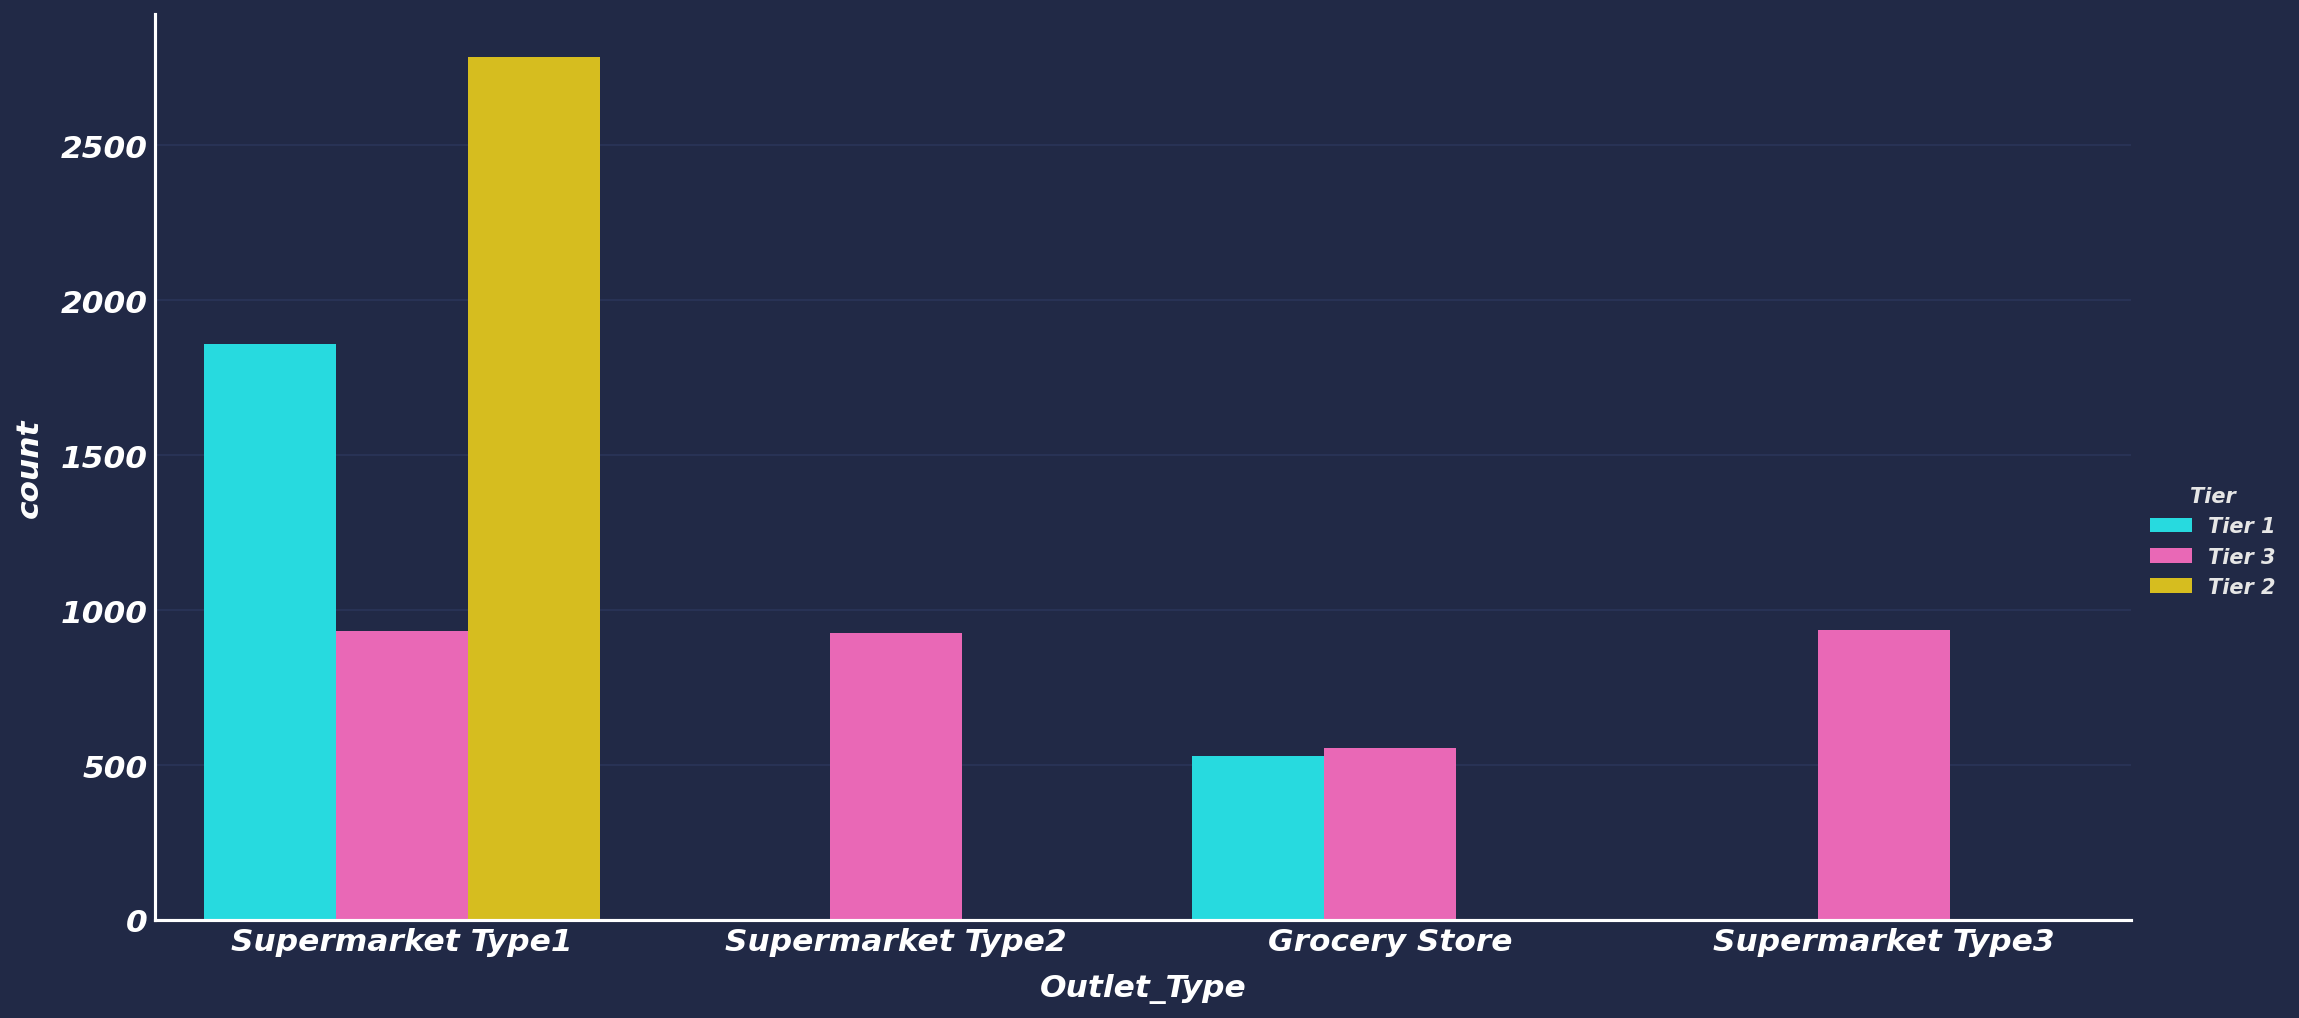

In [61]:
plt.figure(figsize=(17,8))

sns.countplot(x = train.Outlet_Type,hue=train.Outlet_Location_Type)
plt.legend(title="Tier", bbox_to_anchor=(1.0,0.5)) 

In [53]:
train.groupby(["new_Item_Fat_Content","Item_Type"])["Item_Outlet_Sales"].mean().to_frame() 

Item_Outlet_Sales
new_Item_Fat_Content Item_Type                               
Low_Fat              Baking Goods                 1764.509636
                     Breads                       2183.434031
                     Breakfast                    2425.411966
                     Canned                       2208.714377
                     Dairy                        2145.174151
                     Frozen Foods                 2117.535472
                     Fruits and Vegetables        2182.405740
                     Hard Drinks                  2139.221622
                     Health and Hygiene           2010.000265
                     Household                    2258.784300
                     Meat                         2035.616920
                     Others                       1926.139702
                     Seafood                      1907.786919
                     Snack Foods                  2411.978843
                     Soft Drinks                  2035.452072
                     Starchy Foods                2558.425815
Regular              Baking Goods                 2147.340665
                     Breads                       2230.238058
                     Breakfast                    1925.464652
                     Canned                       2243.441202
                     Dairy                        2370.875970
                     Frozen Foods                 2149.861640
                     Fruits and Vegetables        2400.571761
                     Meat                         2241.218571
                     Seafood                      2899.263089
                     Snack Foods                  2093.891196
                     Soft Drinks                  1854.065451
                     Starchy Foods                2145.611115

In [55]:
train.groupby(["new_Item_Fat_Content","Item_Type"])["Item_Weight"].mean().to_frame() 

Item_Weight
new_Item_Fat_Content Item_Type                         
Low_Fat              Baking Goods             12.538283
                     Breads                   12.342679
                     Breakfast                11.988902
                     Canned                   11.948754
                     Dairy                    13.438828
                     Frozen Foods             12.454422
                     Fruits and Vegetables    12.784556
                     Hard Drinks              11.456238
                     Health and Hygiene       13.052327
                     Household                13.524780
                     Meat                     13.493235
                     Others                   13.979438
                     Seafood                  13.749054
                     Snack Foods              13.790773
                     Soft Drinks              11.942473
                     Starchy Foods            13.703049
Regular              Baking Goods             12.025564
                     Breads                    9.979685
                     Breakfast                13.249638
                     Canned                   12.906591
                     Dairy                    13.283845
                     Frozen Foods             13.145603
                     Fruits and Vegetables    13.709900
                     Meat                     12.289863
                     Seafood                  10.840370
                     Snack Foods              11.995827
                     Soft Drinks              11.549507
                     Starchy Foods            14.013258

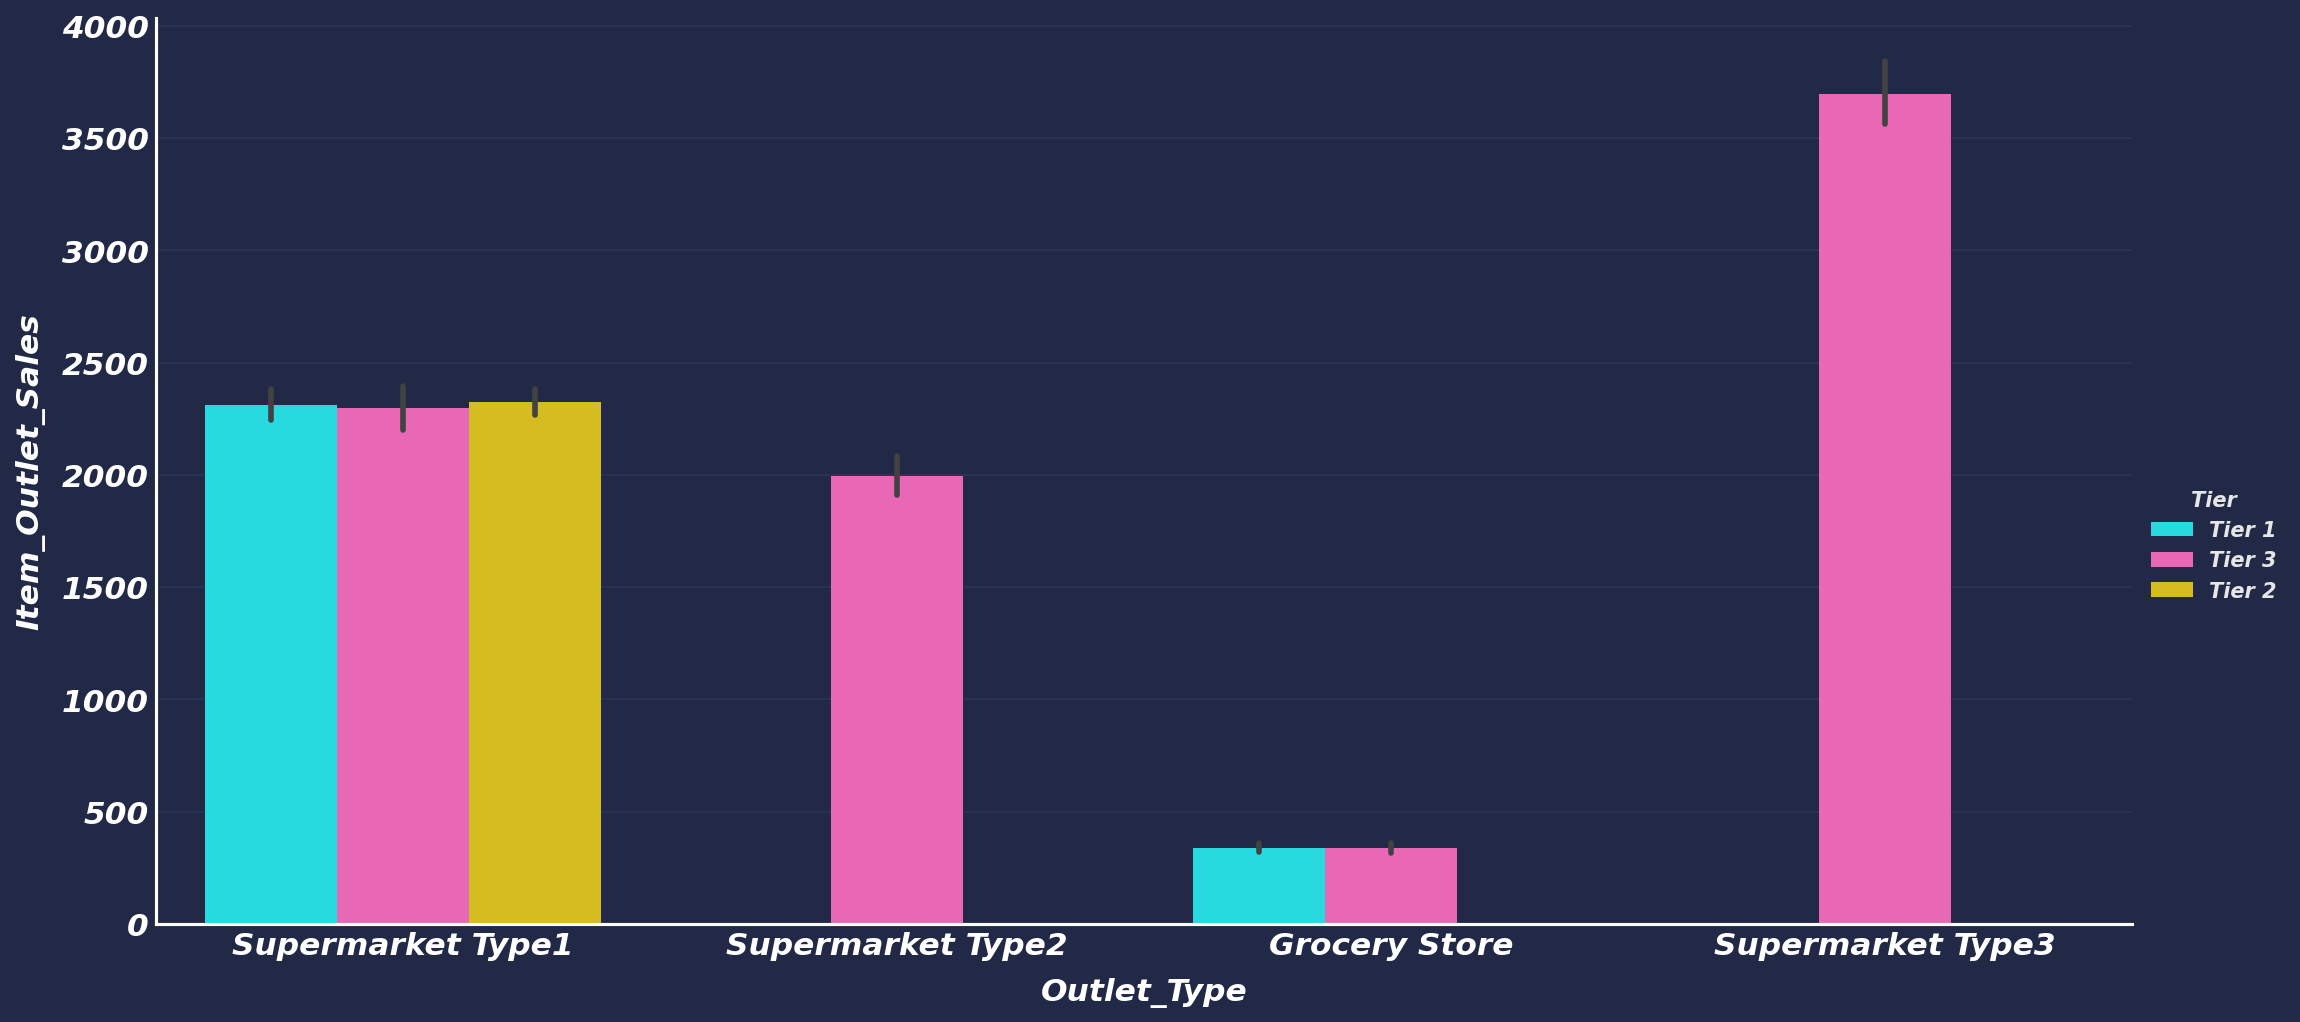

In [63]:
plt.figure(figsize=(17,8))

sns.barplot(x = train.Outlet_Type,y=train.Item_Outlet_Sales,hue=train.Outlet_Location_Type)
plt.legend(title="Tier", bbox_to_anchor=(1.0,0.5)) 

In [71]:
# buat feature baru 

for i in [train,test]:
    i["new1"] = i.groupby(["Outlet_Identifier","Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])["Item_Visibility"].transform("max")
    i["new2"] = i.groupby(["Outlet_Identifier","Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])["Item_MRP"].transform("mean")
    i["new3"] = i.groupby(["new_Item_Fat_Content", "Item_Type"])["Item_Weight"].transform("max") 

In [73]:
# drop usele columns

for i in [train, test]: 
    i.drop(["Item_Identifier", "Item_Fat_Content", "Item_Type"], axis=1, inplace=True) 

In [75]:
for i in [train,test]:
    i["Outlet_Establishment_Year"] = i["Outlet_Establishment_Year"].astype("object") 

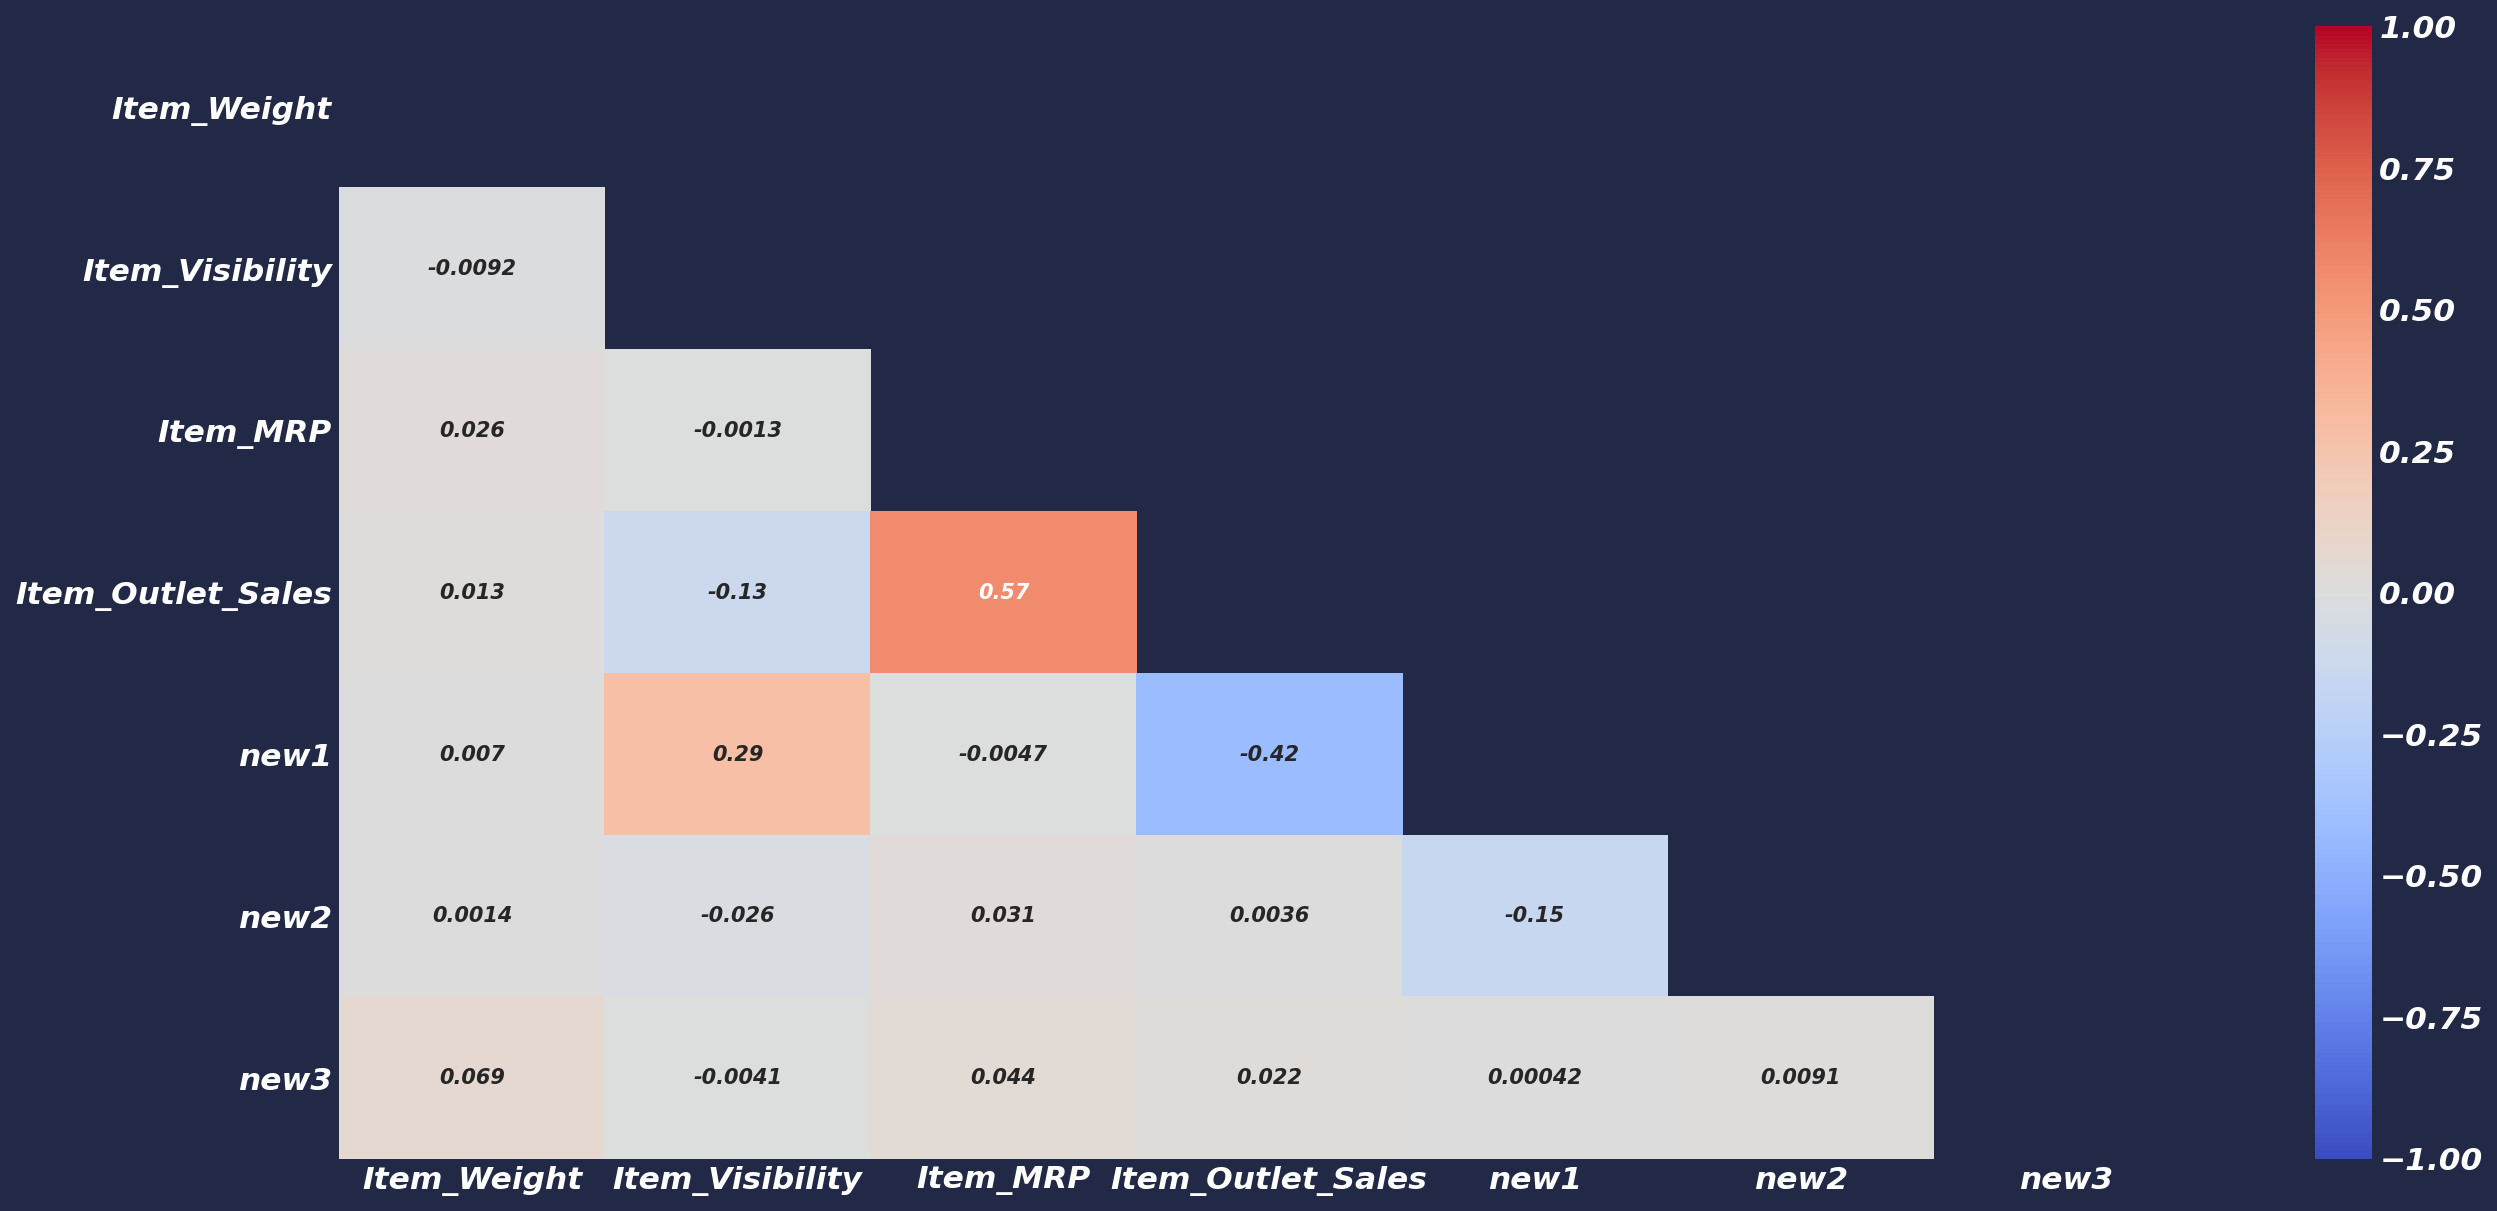

In [77]:
# check all correlation

msk = np.triu(train.corr())

plt.figure(figsize=(20, 10)) 
sns.heatmap(train.corr(), mask=msk, vmin=-1, vmax=1, annot=True, cmap="coolwarm") 

In [76]:
train.head()

Item_Weight  Item_Visibility  ...        new2   new3
0         9.30         0.016047  ...  140.297699  20.70
1         5.92         0.019278  ...  141.678634  19.50
2        17.50         0.016760  ...  140.297699  21.25
3        19.20         0.000000  ...  140.264072  21.10
4         8.93         0.000000  ...  141.425982  21.25

[5 rows x 15 columns]

In [78]:
print(train.shape)
print(test.shape)
print("")
print(train.duplicated().any().sum())
print("")
print(train.isnull().any().sum())
print(test.isnull().any().sum())

(8523, 15)
(5681, 14)

0

0
0


In [79]:
train.to_csv("train_bigmart(clean).csv",index=False)
test.to_csv("test_bigmart(clean).csv",index=False)